**Проект: Мастерская 1**

Ссылка на проект в GitHub: <br>
<a href=https://github.com/Da1ek0/project_11_m1_heart_attack.git>https://github.com/Da1ek0/project_11_m1_heart_attack.git</a>

**Постановка задачи**

**О проекте**
Разработана ML-модель для прогнозирования риска возникновения сердечного приступа на основе медицинских данных пациентов. Входные параметры включают возраст, образ жизни, показатели здоровья и результаты анализов крови. Реализовано веб-приложение на FastAPI, которое предоставляет прогнозы в ответ на пользовательские запросы.

Ключевые компоненты:

* Использован открытый датасет для обучения и валидации модели.

* Построен и оптимизирован алгоритм машинного обучения.

* Создан программный интерфейс (API) для тестирования модели и интеграции в медицинские системы.

**Цель:**
* Автоматизация оценки рисков сердечно-сосудистых заболеваний для поддержки врачей в принятии клинических решений.

**Задачи**
* Исследование и анализ предоставленного датасета для формирования гипотез.
* Предобработка данных: удаление нерелевантных и дублирующих признаков, исключение утечек данных.
* Сравнительное обучение и тонкая настройка моделей для выбора наилучшего решения.
* Генерация предсказаний для тестовой выборки и оформление результата в соответствии с требованиями.
* Разработка и развертывание API-сервиса на FastAPI для инференса модели.
* Подготовка исчерпывающей документации.

**Описание исходных данных и признаков**

Набор данных для прогнозирования сердечно-сосудистого риска включает в себя четыре ключевые группы признаков:

1. Демографические и социально-экономические данные:

* Age — возраст пациента в полных годах.
* Gender — половая принадлежность (мужской/женский).
* Income — уровень дохода как показатель финансового благосостояния.
* id — уникальный идентификатор записи.

2. Антропометрические показатели и данные об образе жизни:

* BMI — индекс массы тела, расчетный показатель соотношения веса и роста.
* Obesity — бинарный показатель наличия или отсутствия ожирения.
* Sedentary Hours Per Day — среднее количество часов, проводимых сидя.
* Sleep Hours Per Day — средняя продолжительность сна.
* Smoking и Alcohol Consumption — факторы риска, связанные с вредными привычками.
* Exercise Hours Per Week и Physical Activity Days Per Week — показатели физической активности.
* Diet — качественная оценка типа питания.
* Stress Level — субъективная оценка уровня стресса.

3. Физиологические и клинические показатели:

* Cholesterol, Triglycerides, Blood sugar — ключевые биохимические маркеры крови.
* Systolic blood pressure, Diastolic blood pressure — показатели артериального давления.
* Heart rate — частота сердечных сокращений (пульс).
* CK-MB, Troponin — специфические кардиомаркеры, указывающие на повреждение миокарда.

4. Медицинский анамнез:

* Diabetes — наличие диагностированного диабета.
* Family History — отягощенная наследственность по сердечно-сосудистым заболеваниям.
* Previous Heart Problems — наличие сердечных заболеваний в анамнезе пациента.
* Medication Use — факт приема лекарственных препаратов.
* Heart Attack Risk (Binary) — целевая переменная: бинарный индикатор риска инфаркта.

Взаимосвязи признаков:
Анализ набора данных выявил ожидаемые корреляции между признаками, такие как связь между показателями образа жизни (Diet, Exercise) и клиническими параметрами (Cholesterol, Blood Pressure), что важно для дальнейшего отбора признаков и анализа.



**Используемая метрика оценки качества и сравнения моделей**
В ходе анализа выбрана метрика оценки качества модели, проведено сравнение моделей и выбрана лучшая

**Стек:**

- Python
- Pandas
- numpy
- Scikitlearn
- CatBoost
- FastAPI
- HTML

<a name="0.0"></a>
# Содержание: 
* [Загрузка данных:](#1.0)
     - [Данные датафрейма `heart_train.csv`:](#1.1)
     - [Данные датафрейма `heart_test.csv`:](#1.2)
* [Предобработка данных:](#2.0)
* [Исследовательский анализ данных:](#3.0)
* [Корреляционный анализ:](#4.0)
* [Обучение и проверка моделей:](#5.0)
  
* [Итоговый вывод:](#6.0)<br/><br/><br/>

In [10]:
# Установка пакетов 
!pip install -q -U scikit-learn==1.5.2
!pip install -q shap
!pip install -q optuna
!pip install -q optuna-integration
!pip install -q phik
!pip install -q imbalanced-learn
!pip install -q catboost
!pip install -q xgboost

In [11]:
# Установка библиотек
import os
import gc
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import shap
import multiprocessing
import phik
import xgboost as xgb
import json
import joblib

In [12]:
# Установка инструментов
from joblib import Parallel, delayed
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import (OneHotEncoder, OrdinalEncoder, 
    StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder)
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import (roc_auc_score, accuracy_score, make_scorer,
    classification_report, confusion_matrix, ConfusionMatrixDisplay)
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC
from phik import phik_matrix
from phik.report import plot_correlation_matrix
from phik import report
from optuna import distributions
from optuna.integration import OptunaSearchCV
from optuna import visualization
from catboost import CatBoostClassifier, Pool
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline as ImbPipeline
from datetime import datetime
from scipy import stats
from scipy.stats import skew
from sklearn.base import BaseEstimator, TransformerMixin

In [13]:
# Применим настройку формата чисел с разделителем
pd.options.display.float_format = '{:_.4f}'.format
# установим размер графиков по умолчанию
plt.rcParams["figure.figsize"] = (20, 15) 
# Установка опции для отображения максимальной ширины столбца
pd.set_option('display.max_colwidth', None)
# Установка опции для отображения всех столбцов
pd.set_option('display.max_columns', None)

In [14]:
# константы
RANDOM_STATE = 42
TEST_SIZE = 0.25

<a name="1.0"></a>
<font size="4"><b>Загрузка данных</b></font><br/>
<font size="2">([к содержанию](#0.0))</font>
### Загружаем данные из файлов:
`heart_train.csv`
`heart_test.csv`

In [16]:
# Создаем переменные с датафреймами датафрей проверяем три источника данных
try:
    if os.path.exists('/datasets/heart_train.csv'):
        df_heart_train = pd.read_csv('/datasets/heart_train.csv')
        df_heart_test = pd.read_csv('/datasets/heart_test.csv')
    elif os.path.exists('datasets/heart_train.csv'):
        df_heart_train = pd.read_csv('http://localhost:8888/lab/tree/Project11/heart_train.csv')
        df_heart_test = pd.read_csv('http://localhost:8888/lab/tree/Project11/heart_test.csv')
    else:
        df_heart_train = pd.read_csv('heart_train.csv')
        df_heart_test = pd.read_csv('heart_test.csv')
        
except FileNotFoundError:
    print("Ошибка: один или оба файла не найдены!")

### Обзор данных файлов:
`heart_train.csv`
`heart_test.csv`

In [18]:
def analyze_dataframe(df, sample_rows=10, duplicates_threshold=0.5):

    output = []
    output.append("="*50)
    output.append(f"ОСНОВНАЯ ИНФОРМАЦИЯ (shape: {df.shape})")
    output.append("="*50)

    buffer = pd.io.common.StringIO()
    df.info(buf=buffer)
    output.append(buffer.getvalue())

    output.append("\n" + "="*50)
    output.append(f"ПРИМЕР ДАННЫХ ({sample_rows} строк)")
    output.append("="*50)
    output.append(df.head(sample_rows))

    output.append("\n" + "="*50)
    output.append("СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ")
    output.append("="*50)
    output.append(df.describe(include='all'))

    missing = df.isna().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Пропущено': missing,
        '% от общего': missing_pct.round(2)
    })
    
    output.append("\n" + "="*50)
    output.append("ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ")
    output.append("="*50)
    output.append(missing_df[missing_df['Пропущено'] > 0].to_string())

    dupes = df.duplicated().sum()
    dupes_pct = (dupes / len(df)) * 100
    
    output.append("\n" + "="*50)
    output.append(f"ДУБЛИКАТЫ (всего: {dupes} / {dupes_pct:.2f}%)")
    output.append("="*50)
    
    if dupes > 0 and dupes_pct >= duplicates_threshold:
        output.append(f"Внимание! Много дубликатов (> {duplicates_threshold}%)")
        output.append("Первые 5 дубликатов:")
        output.append(df[df.duplicated(keep=False)].sort_values(df.columns.tolist()).head().to_string())
    elif dupes > 0:
        output.append("Несколько дубликатов найдено")
    else:
        output.append("Дубликаты не обнаружены")

    dtypes = df.dtypes.to_frame('Тип данных')
    dtypes['Уникальные'] = df.nunique()
    
    output.append("\n" + "="*50)
    output.append("ТИПЫ ДАННЫХ И УНИКАЛЬНЫЕ ЗНАЧЕНИЯ")
    output.append("="*50)
    output.append(dtypes)
   
    for item in output:
        if isinstance(item, (pd.DataFrame, pd.Series)):
            display(item)  
        else:
            print(item)    
    
    return {
        'shape': df.shape,
        'missing': missing_df,
        'duplicates': dupes,
        'dtypes': dtypes
    }

<a name="1.1"></a>
<font size="3"><b>Данные датафрейма `heart_train.csv`</b></font><br/>
<font size="2">([к содержанию](#0.0))</font>

In [20]:
df = pd.DataFrame(df_heart_train)
analyze_dataframe(df)

ОСНОВНАЯ ИНФОРМАЦИЯ (shape: (8685, 28))
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8685 entries, 0 to 8684
Data columns (total 28 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       8685 non-null   int64  
 1   Age                              8685 non-null   float64
 2   Cholesterol                      8685 non-null   float64
 3   Heart rate                       8685 non-null   float64
 4   Diabetes                         8442 non-null   float64
 5   Family History                   8442 non-null   float64
 6   Smoking                          8442 non-null   float64
 7   Obesity                          8442 non-null   float64
 8   Alcohol Consumption              8442 non-null   float64
 9   Exercise Hours Per Week          8685 non-null   float64
 10  Diet                             8685 non-null   int64  
 11  Previous Heart Problems          8442 non-

Unnamed: 0    Age  Cholesterol  Heart rate  Diabetes  Family History  \
0           0 0.3596       0.7321      0.0742    1.0000          1.0000   
1           1 0.2022       0.3250      0.0477    1.0000          1.0000   
2           2 0.6067       0.8607      0.0559    1.0000          0.0000   
3           3 0.7303       0.0071      0.0532    0.0000          0.0000   
4           4 0.7753       0.7571      0.0220    0.0000          0.0000   
5           5 0.1685       0.7643      0.0577    0.0000          1.0000   
6           6 0.4831       0.0214      0.0367    1.0000          0.0000   
7           7 0.2360       0.9393      0.0816    1.0000          0.0000   
8           8 0.6854       0.3179      0.0394    0.0000          0.0000   
9           9 0.2135       0.7964      0.0770    1.0000          1.0000   

   Smoking  Obesity  Alcohol Consumption  Exercise Hours Per Week  Diet  \
0   1.0000   1.0000               1.0000                   0.5355     1   
1   0.0000   0.0000               1.0000                   0.0687     2   
2   1.0000   1.0000               1.0000                   0.9440     2   
3   1.0000   0.0000               1.0000                   0.6970     0   
4   1.0000   0.0000               1.0000                   0.4129     1   
5   1.0000   1.0000               1.0000                   0.0827     1   
6   1.0000   0.0000               1.0000                   0.5402     2   
7   1.0000   0.0000               1.0000                   0.2908     2   
8   1.0000   0.0000               0.0000                   0.8032     0   
9   1.0000   1.0000               0.0000                   0.5070     1   

   Previous Heart Problems  Medication Use  Stress Level  \
0                   1.0000          0.0000        8.0000   
1                   1.0000          0.0000        9.0000   
2                   1.0000          1.0000        6.0000   
3                   0.0000          1.0000        3.0000   
4                   0.0000          0.0000        8.0000   
5                   1.0000          0.0000        7.0000   
6                   0.0000          1.0000        9.0000   
7                   0.0000          1.0000        7.0000   
8                   1.0000          1.0000        3.0000   
9                   0.0000          0.0000        7.0000   

   Sedentary Hours Per Day  Income    BMI  Triglycerides  \
0                   0.2257  0.1059 0.4592         0.9792   
1                   0.2899  0.1642 0.1171         0.5156   
2                   0.5501  0.5987 0.3736         0.0130   
3                   0.3310  0.0776 0.0497         0.1312   
4                   0.5246  0.3420 0.8304         0.0701   
5                   0.5583  0.6408 0.1106         0.2390   
6                   0.8276  0.7746 0.0737         0.0727   
7                   0.2253  0.9994 0.0015         0.1805   
8                   0.8282  0.1422 0.0931         0.9909   
9                   0.6930  0.8210 0.1454         0.1714   

   Physical Activity Days Per Week  Sleep Hours Per Day  \
0                           3.0000               0.3333   
1                           3.0000               0.8333   
2                           2.0000               1.0000   
3                           0.0000               0.3333   
4                           5.0000               1.0000   
5                           6.0000               0.8333   
6                           5.0000               0.0000   
7                           4.0000               0.0000   
8                           6.0000               0.1667   
9                           3.0000               1.0000   

   Heart Attack Risk (Binary)  Blood sugar  CK-MB  Troponin  Gender  \
0                      0.0000       0.2270 0.0482    0.0365    Male   
1                      0.0000       0.1502 0.0176    0.0002  Female   
2                      0.0000       0.2270 0.0482    0.0365  Female   
3                      1.0000       0.2270 0.0482    0.0365  Female   
4                      1


СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ


Unnamed: 0        Age  Cholesterol  Heart rate   Diabetes  \
count   8_685.0000 8_685.0000   8_685.0000  8_685.0000 8_442.0000   
unique         NaN        NaN          NaN         NaN        NaN   
top            NaN        NaN          NaN         NaN        NaN   
freq           NaN        NaN          NaN         NaN        NaN   
mean    4_342.0000     0.4500       0.5011      0.0507     0.6521   
std     2_507.2879     0.2312       0.2847      0.0235     0.4763   
min         0.0000     0.0000       0.0000      0.0000     0.0000   
25%     2_171.0000     0.2584       0.2679      0.0348     0.0000   
50%     4_342.0000     0.4607       0.4998      0.0504     1.0000   
75%     6_513.0000     0.6404       0.7464      0.0660     1.0000   
max     8_684.0000     1.0000       1.0000      1.0000     1.0000   

        Family History    Smoking    Obesity  Alcohol Consumption  \
count       8_442.0000 8_442.0000 8_442.0000           8_442.0000   
unique             NaN        NaN        NaN                  NaN   
top                NaN        NaN        NaN                  NaN   
freq               NaN        NaN        NaN                  NaN   
mean            0.4896     0.9029     0.4983               0.6020   
std             0.4999     0.2962     0.5000               0.4895   
min             0.0000     0.0000     0.0000               0.0000   
25%             0.0000     1.0000     0.0000               0.0000   
50%             0.0000     1.0000     0.0000               1.0000   
75%             1.0000     1.0000     1.0000               1.0000   
max             1.0000     1.0000     1.0000               1.0000   

        Exercise Hours Per Week       Diet  Previous Heart Problems  \
count                8_685.0000 8_685.0000               8_442.0000   
unique                      NaN        NaN                      NaN   
top                         NaN        NaN                      NaN   
freq                        NaN        NaN                      NaN   
mean                     0.5034     1.0575                   0.4954   
std                      0.2848     0.8666                   0.5000   
min                      0.0000     0.0000                   0.0000   
25%                      0.2633     0.0000                   0.0000   
50%                      0.5021     1.0000                   0.0000   
75%                      0.7487     2.0000                   1.0000   
max                      1.0000     3.0000                   1.0000   

        Medication Use  Stress Level  Sedentary Hours Per Day     Income  \
count       8_442.0000    8_442.0000               8_685.0000 8_685.0000   
unique             NaN           NaN                      NaN        NaN   
top                NaN           NaN                      NaN        NaN   
freq               NaN           NaN                      NaN        NaN   
mean            0.5012        5.4934                   0.4992     0.4961   
std             0.5000        2.8679                   0.2853     0.2847   
min             0.0000        1.0000                   0.0000     0.0000   
25%             0.0000        3.0000                   0.2559     0.2519   
50%             1.0000        5.0000                   0.4999     0.4949   
75%             1.0000        8.0000                   0.7446     0.7410   
max             1.0000       10.0000                   1.0000     1.0000   

              BMI  Triglycerides  Physical Activity Days Per Week  \
count  8_685.0000     8_685.0000                       8_442.0000   
unique        NaN            NaN                              NaN   
top           NaN            NaN                              NaN   
freq          NaN            NaN                              NaN   
mean       0.4968         0.5055                           3.5083   
std        0.2826         0.2863                           2.2818   
min        0.0000         0.0000                           0.0000   
25%        0.2542         0.2636


ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ
                                 Пропущено  % от общего
Diabetes                               243       2.8000
Family History                         243       2.8000
Smoking                                243       2.8000
Obesity                                243       2.8000
Alcohol Consumption                    243       2.8000
Previous Heart Problems                243       2.8000
Medication Use                         243       2.8000
Stress Level                           243       2.8000
Physical Activity Days Per Week        243       2.8000

ДУБЛИКАТЫ (всего: 0 / 0.00%)
Дубликаты не обнаружены

ТИПЫ ДАННЫХ И УНИКАЛЬНЫЕ ЗНАЧЕНИЯ


Тип данных  Уникальные
Unnamed: 0                           int64        8685
Age                                float64          77
Cholesterol                        float64         282
Heart rate                         float64          87
Diabetes                           float64           2
Family History                     float64           2
Smoking                            float64           2
Obesity                            float64           2
Alcohol Consumption                float64           2
Exercise Hours Per Week            float64        7933
Diet                                 int64           4
Previous Heart Problems            float64           2
Medication Use                     float64           2
Stress Level                       float64          10
Sedentary Hours Per Day            float64        7933
Income                             float64        7808
BMI                                float64        7933
Triglycerides                      float64         772
Physical Activity Days Per Week    float64           8
Sleep Hours Per Day                float64           8
Heart Attack Risk (Binary)         float64           2
Blood sugar                        float64         239
CK-MB                              float64         679
Troponin                           float64         340
Gender                              object           4
Systolic blood pressure            float64         100
Diastolic blood pressure           float64          66
id                                   int64        8685

{'shape': (8685, 28),
 'missing':                                  Пропущено  % от общего
 Unnamed: 0                               0       0.0000
 Age                                      0       0.0000
 Cholesterol                              0       0.0000
 Heart rate                               0       0.0000
 Diabetes                               243       2.8000
 Family History                         243       2.8000
 Smoking                                243       2.8000
 Obesity                                243       2.8000
 Alcohol Consumption                    243       2.8000
 Exercise Hours Per Week                  0       0.0000
 Diet                                     0       0.0000
 Previous Heart Problems                243       2.8000
 Medication Use                         243       2.8000
 Stress Level                           243       2.8000
 Sedentary Hours Per Day                  0       0.0000
 Income                                   0       0.000

<font size="4"><b>Вывод</b></font><br/>
<font size="2">([к содержанию](#0.0))</font>
1. Качество данных и подготовка
* Данные в хорошем состоянии: Набор данных достаточно чистый и готов для моделирования. Отсутствуют дубликаты, а большинство признаков не имеет пропусков.
* Есть незначительные проблемы: Наличие пропусков (~2.8%) в 9 столбцах требует применения стратегии импутации (например, замены модой для бинарных признаков). Столбец Unnamed: 0 является техническим артефактом и должен быть удален. Аномалия в столбце Gender (4 значения вместо 2) указывает на необходимость исправления опечаток.
* Данные предобработаны: Большинство числовых признаков уже нормализовано (приведено к диапазону [0, 1]), что является большим плюсом для дальнейшего использования алгоритмов машинного обучения.

2. Статистические insights и особенности выборки
* Дисбаланс классов: Целевая переменная Heart Attack Risk (Binary) имеет несбалансированное распределение (примерно 35% пациентов с риском против 65% без риска). Это критически важный вывод, который диктует использование специфичных метрик для оценки модели (не Accuracy, а F1, Precision, Recall, AUC-ROC) и, возможно, методов борьбы с дисбалансом (например, взвешивание классов, SMOTE).
* Портрет выборки: В данных прослеживаются черты, характерные для группы риска:
* Высокий уровень курения: Около 90% пациентов в выборке курят (Smoking).
* Распространенность диабета: Примерно 65% пациентов имеют диабет (Diabetes).
* Умеренный уровень стресса: Среднее значение Stress Level около 5.5 из 10.
* Разнообразие признаков: Наличие таких важных медицинских маркеров, как Troponin и CK-MB, которые являются объективными показателями повреждения сердца, значительно повышает потенциальную точность модели.

<a name="1.2"></a>
<font size="3"><b>Данные датафрейма `heart_test.csv`</b></font><br/>
<font size="2">([к содержанию](#0.0))</font>

In [23]:
df = pd.DataFrame(df_heart_test)
analyze_dataframe(df)

ОСНОВНАЯ ИНФОРМАЦИЯ (shape: (966, 27))
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       966 non-null    int64  
 1   Age                              966 non-null    float64
 2   Cholesterol                      966 non-null    float64
 3   Heart rate                       966 non-null    float64
 4   Diabetes                         935 non-null    float64
 5   Family History                   935 non-null    float64
 6   Smoking                          935 non-null    float64
 7   Obesity                          935 non-null    float64
 8   Alcohol Consumption              935 non-null    float64
 9   Exercise Hours Per Week          966 non-null    float64
 10  Diet                             966 non-null    int64  
 11  Previous Heart Problems          935 non-null

Unnamed: 0    Age  Cholesterol  Heart rate  Diabetes  Family History  \
0           0 0.4944       0.2643      0.0623    0.0000          1.0000   
1           1 0.2247       0.9536      0.0825    1.0000          0.0000   
2           2 0.6292       0.0929      0.0642    0.0000          1.0000   
3           3 0.4607       0.5679      0.0559    1.0000          1.0000   
4           4 0.7191       0.4857      0.0229    1.0000          0.0000   
5           5 0.5618       0.7929      0.0266    1.0000          1.0000   
6           6 0.6742       0.8536      0.0192    1.0000          1.0000   
7           7 0.5393       0.3357      0.0367    1.0000          1.0000   
8           8 0.4494       0.3286      0.0752    1.0000          0.0000   
9           9 0.6180       0.7286      0.0321    0.0000          1.0000   

   Smoking  Obesity  Alcohol Consumption  Exercise Hours Per Week  Diet  \
0   1.0000   1.0000               1.0000                   0.3616     2   
1   0.0000   1.0000               0.0000                   0.9965     2   
2   1.0000   1.0000               0.0000                   0.9956     0   
3   1.0000   1.0000               1.0000                   0.4373     0   
4   1.0000   0.0000               1.0000                   0.5149     0   
5   1.0000   1.0000               0.0000                   0.7745     2   
6   1.0000   0.0000               1.0000                   0.1491     1   
7   1.0000   0.0000               1.0000                   0.3297     1   
8   1.0000   0.0000               0.0000                   0.4874     2   
9   1.0000   0.0000               0.0000                   0.2115     2   

   Previous Heart Problems  Medication Use  Stress Level  \
0                   0.0000          0.0000        8.0000   
1                   1.0000          1.0000        5.0000   
2                   0.0000          0.0000       10.0000   
3                   0.0000          0.0000       10.0000   
4                   0.0000          0.0000        7.0000   
5                   0.0000          1.0000        8.0000   
6                   0.0000          0.0000        8.0000   
7                   1.0000          0.0000        1.0000   
8                   1.0000          0.0000       10.0000   
9                   1.0000          1.0000        8.0000   

   Sedentary Hours Per Day  Income    BMI  Triglycerides  \
0                   0.1944  0.5878 0.2835         0.3065   
1                   0.3299  0.6029 0.4670         0.0870   
2                   0.7801  0.3704 0.4094         0.2052   
3                   0.7851  0.3682 0.9103         0.1636   
4                   0.0709  0.7296 0.7589         0.5805   
5                   0.0441  0.8135 0.7234         0.3623   
6                   0.3060  0.5625 0.6961         0.2117   
7                   0.3770  0.2351 0.4844         0.8351   
8                   0.0894  0.4866 0.4094         0.8195   
9                   0.5243  0.0839 0.6574         0.1961   

   Physical Activity Days Per Week  Sleep Hours Per Day  Blood sugar  CK-MB  \
0                           1.0000               0.3333       0.2270 0.0482   
1                           0.0000               0.1667       0.2270 0.0482   
2                           7.0000               1.0000       0.1028 0.0027   
3                           0.0000               0.6667       0.2036 0.0564   
4                           5.0000               0.0000       0.2270 0.0482   
5                           1.0000               0.6667       0.2270 0.0482   
6                           3.0000               0.0000       0.2270 0.0482   
7                           7.0000               0.6667       0.6957 0.0025   
8                           2.0000               0.1667       0.2270 0.0482   
9                           0.0000               1.0000       0.2270 0.0482   

   Troponin  Gender  Systolic blood pressure  Diastolic blood pressure    id  
0    0.0365    Male                   0.2839                    0.3721  7746  
1


СТАТИСТИЧЕСКИЕ ХАРАКТЕРИСТИКИ


Unnamed: 0      Age  Cholesterol  Heart rate  Diabetes  \
count     966.0000 966.0000     966.0000    966.0000  935.0000   
unique         NaN      NaN          NaN         NaN       NaN   
top            NaN      NaN          NaN         NaN       NaN   
freq           NaN      NaN          NaN         NaN       NaN   
mean      482.5000   0.4529       0.4882      0.0516    0.6567   
std       279.0045   0.2311       0.2820      0.0355    0.4751   
min         0.0000   0.0449       0.0000      0.0000    0.0000   
25%       241.2500   0.2472       0.2437      0.0367    0.0000   
50%       482.5000   0.4607       0.4998      0.0504    1.0000   
75%       723.7500   0.6404       0.7107      0.0660    1.0000   
max       965.0000   0.8539       0.9964      1.0000    1.0000   

        Family History  Smoking  Obesity  Alcohol Consumption  \
count         935.0000 935.0000 935.0000             935.0000   
unique             NaN      NaN      NaN                  NaN   
top                NaN      NaN      NaN                  NaN   
freq               NaN      NaN      NaN                  NaN   
mean            0.4813   0.8984   0.5166               0.5840   
std             0.4999   0.3023   0.5000               0.4932   
min             0.0000   0.0000   0.0000               0.0000   
25%             0.0000   1.0000   0.0000               0.0000   
50%             0.0000   1.0000   1.0000               1.0000   
75%             1.0000   1.0000   1.0000               1.0000   
max             1.0000   1.0000   1.0000               1.0000   

        Exercise Hours Per Week     Diet  Previous Heart Problems  \
count                  966.0000 966.0000                 935.0000   
unique                      NaN      NaN                      NaN   
top                         NaN      NaN                      NaN   
freq                        NaN      NaN                      NaN   
mean                     0.4907   1.0538                   0.4941   
std                      0.2849   0.8846                   0.5002   
min                      0.0003   0.0000                   0.0000   
25%                      0.2434   0.0000                   0.0000   
50%                      0.5021   1.0000                   0.0000   
75%                      0.7344   2.0000                   1.0000   
max                      0.9989   3.0000                   1.0000   

        Medication Use  Stress Level  Sedentary Hours Per Day   Income  \
count         935.0000      935.0000                 966.0000 966.0000   
unique             NaN           NaN                      NaN      NaN   
top                NaN           NaN                      NaN      NaN   
freq               NaN           NaN                      NaN      NaN   
mean            0.4888        5.3326                   0.5067   0.4844   
std             0.5001        2.8585                   0.2878   0.2739   
min             0.0000        1.0000                   0.0012   0.0034   
25%             0.0000        3.0000                   0.2587   0.2614   
50%             0.0000        5.0000                   0.5013   0.4920   
75%             1.0000        8.0000                   0.7596   0.7054   
max             1.0000       10.0000                   0.9990   0.9989   

            BMI  Triglycerides  Physical Activity Days Per Week  \
count  966.0000       966.0000                         935.0000   
unique      NaN            NaN                              NaN   
top         NaN            NaN                              NaN   
freq        NaN            NaN                              NaN   
mean     0.4768         0.4867                           3.4439   
std      0.2920         0.2845                           2.3028   
min      0.0026         0.0000                           0.0000   
25%      0.2175         0.2497                           1.0000   
50%      0.4712         0.4890                           3.0000   
75%      0.7205         0.7182                


ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ
                                 Пропущено  % от общего
Diabetes                                31       3.2100
Family History                          31       3.2100
Smoking                                 31       3.2100
Obesity                                 31       3.2100
Alcohol Consumption                     31       3.2100
Previous Heart Problems                 31       3.2100
Medication Use                          31       3.2100
Stress Level                            31       3.2100
Physical Activity Days Per Week         31       3.2100

ДУБЛИКАТЫ (всего: 0 / 0.00%)
Дубликаты не обнаружены

ТИПЫ ДАННЫХ И УНИКАЛЬНЫЕ ЗНАЧЕНИЯ


Тип данных  Уникальные
Unnamed: 0                           int64         966
Age                                float64          73
Cholesterol                        float64         266
Heart rate                         float64          76
Diabetes                           float64           2
Family History                     float64           2
Smoking                            float64           2
Obesity                            float64           2
Alcohol Consumption                float64           2
Exercise Hours Per Week            float64         924
Diet                                 int64           4
Previous Heart Problems            float64           2
Medication Use                     float64           2
Stress Level                       float64          10
Sedentary Hours Per Day            float64         924
Income                             float64         921
BMI                                float64         924
Triglycerides                      float64         529
Physical Activity Days Per Week    float64           8
Sleep Hours Per Day                float64           8
Blood sugar                        float64         124
CK-MB                              float64         183
Troponin                           float64          96
Gender                              object           4
Systolic blood pressure            float64          93
Diastolic blood pressure           float64          54
id                                   int64         966

{'shape': (966, 27),
 'missing':                                  Пропущено  % от общего
 Unnamed: 0                               0       0.0000
 Age                                      0       0.0000
 Cholesterol                              0       0.0000
 Heart rate                               0       0.0000
 Diabetes                                31       3.2100
 Family History                          31       3.2100
 Smoking                                 31       3.2100
 Obesity                                 31       3.2100
 Alcohol Consumption                     31       3.2100
 Exercise Hours Per Week                  0       0.0000
 Diet                                     0       0.0000
 Previous Heart Problems                 31       3.2100
 Medication Use                          31       3.2100
 Stress Level                            31       3.2100
 Sedentary Hours Per Day                  0       0.0000
 Income                                   0       0.0000

<font size="4"><b>Вывод</b></font><br/>
<font size="2">([к содержанию](#0.0))</font>
1. Качество данных и согласованность с обучающей выборкой 
* Высокая согласованность: Тестовая выборка (966 наблюдений) полностью соответствует структуре обучающей данных по типам признаков, диапазонам значений (все признаки также нормализованы) и наличию тех же столбцов (за исключением целевой переменной). Это крайне положительный признак, свидетельствующий о корректности подготовки данных.

Те же проблемы наследуются:

* Пропуски: Сохраняется тот же набор из 9 признаков с пропусками. Процент пропусков немного выше (~3.21% против ~2.8%), что ожидаемо для меньшего набора данных. Стратегия обработки пропусков ДОЛЖНА БЫТЬ ЕДИНОЙ и применена на основе статистик, полученных из обучающей выборки (например, замена на моду или медиану трейна).
* Столбец Unnamed: 0: Является артефактом и должен быть удален.
* Аномалия в Gender: Присутствуют те же 4 уникальных значения вместо ожидаемых 2. Необходимо применить тот же механизм исправления, что и для обучающих данных.

2. Статистический анализ и репрезентативность
* Распределения признаков близки: Статистики (средние значения, стандартные отклонения, квантили) для подавляющего большинства признаков (Age, Cholesterol, Income, BMI и др.) практически идентичны таковым в обучающей выборке. Например:
* Age (mean): Train ~0.45, Test ~0.453
* Cholesterol (mean): Train ~0.501, Test ~0.488
* Diabetes (mean): Train ~0.652, Test ~0.657
Это свидетельствует о том, что тестовая выборка хорошо репрезентирует обучающую, и модель будет оцениваться на данных из того же распределения. Риск "убегания" данных (data drift) на момент создания выборок минимален.

Незначительные отклонения: Некоторые бинарные признаки показывают небольшие статистические отличия (например, доля курящих Smoking: 90.3% в трейне vs 89.8% в тесте; доля людей с ожирением Obesity: ~49.8% vs ~51.7%). Эти различия не критичны и находятся в пределах допустимой статистической погрешности.Высокая согласованность: Тестовая выборка (966 наблюдений) полностью соответствует структуре обучающей данных по типам признаков, диапазонам значений (все признаки также нормализованы) и наличию тех же столбцов (за исключением целевой переменной). Это крайне положительный признак, свидетельствующий о корректности подготовки данных.

<a name="2.0"></a>
<font size="4"><b>Предобработка данных</b></font><br/>
<font size="2">([к содержанию](#0.0))</font>

#### Преобразованее столбцов
Нормализация имен столбцов к формату snake_case

In [27]:
def to_snake_case(df):

    new_columns = []
    for col in df.columns:
        # Заменяем пробелы на подчеркивания, переводим в нижний регистр
        snake_name = col.replace(' ', '_').lower()
        # Удаляем все кроме букв, цифр и подчеркиваний
        snake_name = re.sub(r'[^a-z0-9_]', '', snake_name)
        new_columns.append(snake_name)
    
    df.columns = new_columns
    return df

In [28]:
df_heart_test = to_snake_case(df_heart_test)
df_heart_train = to_snake_case(df_heart_train)

In [29]:
print("Колонки тестовых данных:", df_heart_test.columns.tolist())
print("Колонки тренировочных данных:", df_heart_train.columns.tolist())

Колонки тестовых данных: ['unnamed_0', 'age', 'cholesterol', 'heart_rate', 'diabetes', 'family_history', 'smoking', 'obesity', 'alcohol_consumption', 'exercise_hours_per_week', 'diet', 'previous_heart_problems', 'medication_use', 'stress_level', 'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides', 'physical_activity_days_per_week', 'sleep_hours_per_day', 'blood_sugar', 'ckmb', 'troponin', 'gender', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'id']
Колонки тренировочных данных: ['unnamed_0', 'age', 'cholesterol', 'heart_rate', 'diabetes', 'family_history', 'smoking', 'obesity', 'alcohol_consumption', 'exercise_hours_per_week', 'diet', 'previous_heart_problems', 'medication_use', 'stress_level', 'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides', 'physical_activity_days_per_week', 'sleep_hours_per_day', 'heart_attack_risk_binary', 'blood_sugar', 'ckmb', 'troponin', 'gender', 'systolic_blood_pressure', 'diastolic_blood_pressure', 'id']


#### Избавимся от полей  Unnamed: 0 `unnamed_0` 

In [31]:
df_heart_test = df_heart_test.drop(columns=['unnamed_0'])
df_heart_train = df_heart_train.drop(columns=['unnamed_0'])

#### Посмотрим строки с пропусками:

In [33]:
df_heart_test[df_heart_test.isna().any(axis=1)]

age  cholesterol  heart_rate  diabetes  family_history  smoking  \
27  0.3708       0.4998      0.0348       NaN             NaN      NaN   
37  0.5730       0.4998      0.0431       NaN             NaN      NaN   
58  0.5169       0.4998      0.0458       NaN             NaN      NaN   
60  0.3708       0.4998      0.0568       NaN             NaN      NaN   
61  0.4831       0.4998      0.0284       NaN             NaN      NaN   
156 0.5169       0.4998      0.0458       NaN             NaN      NaN   
208 0.4494       0.4998      0.0367       NaN             NaN      NaN   
235 0.3258       0.4998      0.0293       NaN             NaN      NaN   
265 0.4719       0.4998      0.0568       NaN             NaN      NaN   
339 0.3483       0.4998      0.0541       NaN             NaN      NaN   
352 0.6067       0.4998      0.0486       NaN             NaN      NaN   
397 0.6292       0.4998      0.0843       NaN             NaN      NaN   
423 0.5843       0.4998      0.0440       NaN             NaN      NaN   
456 0.3483       0.4998      1.0000       NaN             NaN      NaN   
475 0.2809       0.4998      0.0376       NaN             NaN      NaN   
484 0.6180       0.4998      0.0907       NaN             NaN      NaN   
555 0.3258       0.4998      0.0293       NaN             NaN      NaN   
563 0.5169       0.4998      0.0843       NaN             NaN      NaN   
602 0.6292       0.4998      0.0697       NaN             NaN      NaN   
631 0.5730       0.4998      0.0495       NaN             NaN      NaN   
634 0.3034       0.4998      0.0807       NaN             NaN      NaN   
651 0.3483       0.4998      0.0761       NaN             NaN      NaN   
699 0.3146       0.4998      0.0000       NaN             NaN      NaN   
731 0.4382       0.4998      0.0486       NaN             NaN      NaN   
758 0.5506       0.4998      0.0852       NaN             NaN      NaN   
771 0.6067       0.4998      0.0486       NaN             NaN      NaN   
817 0.4382       0.4998      0.0550       NaN             NaN      NaN   
826 0.4270       0.4998      0.0348       NaN             NaN      NaN   
838 0.6292       0.4998      0.0577       NaN             NaN      NaN   
920 0.6517       0.4998      0.0577       NaN             NaN      NaN   
921 0.5506       0.4998      0.0403       NaN             NaN      NaN   

     obesity  alcohol_consumption  exercise_hours_per_week  diet  \
27       NaN                  NaN                   0.5021     3   
37       NaN                  NaN                   0.5021     3   
58       NaN                  NaN                   0.5021     3   
60       NaN                  NaN                   0.5021     3   
61       NaN                  NaN                   0.5021     3   
156      NaN                  NaN                   0.5021     3   
208      NaN                  NaN                   0.5021     3   
235      NaN                  NaN                   0.5021     3   
265      NaN                  NaN                   0.5021     3   
339      NaN                  NaN                   0.5021     3   
352      NaN                  NaN                   0.5021     3   
397      NaN                  NaN                   0.5021     3   
423      NaN                  NaN                   0.5021     3   
456      NaN                  NaN                   0.5021     3   
475      NaN                  NaN                   0.5021     3   
484      NaN                  NaN                   0.5021     3   
555      NaN                  NaN                   0.5021     3   
563      NaN                  NaN                   0.5021     3   
602      NaN                  NaN                   0.5021     3   
631      NaN                  NaN                   0.5021     3   
634      NaN                  NaN                   0.5021     3   
651      NaN                  NaN                   0.5021     3   
699      NaN                  NaN                   0.5021     3   
731   

In [34]:
df_heart_train[df_heart_train.isna().any(axis=1)]

age  cholesterol  heart_rate  diabetes  family_history  smoking  \
16   0.4494       0.4998      0.0632       NaN             NaN      NaN   
90   0.3708       0.4998      0.0669       NaN             NaN      NaN   
92   0.6292       0.4998      0.0733       NaN             NaN      NaN   
185  0.5169       0.4998      0.0458       NaN             NaN      NaN   
188  0.2697       0.4998      0.0357       NaN             NaN      NaN   
...     ...          ...         ...       ...             ...      ...   
8461 0.7191       0.4998      0.0495       NaN             NaN      NaN   
8509 0.6517       0.4998      0.0367       NaN             NaN      NaN   
8536 0.6517       0.4998      0.0541       NaN             NaN      NaN   
8619 0.6067       0.4998      0.0596       NaN             NaN      NaN   
8639 0.6292       0.4998      0.0577       NaN             NaN      NaN   

      obesity  alcohol_consumption  exercise_hours_per_week  diet  \
16        NaN                  NaN                   0.5021     3   
90        NaN                  NaN                   0.5021     3   
92        NaN                  NaN                   0.5021     3   
185       NaN                  NaN                   0.5021     3   
188       NaN                  NaN                   0.5021     3   
...       ...                  ...                      ...   ...   
8461      NaN                  NaN                   0.5021     3   
8509      NaN                  NaN                   0.5021     3   
8536      NaN                  NaN                   0.5021     3   
8619      NaN                  NaN                   0.5021     3   
8639      NaN                  NaN                   0.5021     3   

      previous_heart_problems  medication_use  stress_level  \
16                        NaN             NaN           NaN   
90                        NaN             NaN           NaN   
92                        NaN             NaN           NaN   
185                       NaN             NaN           NaN   
188                       NaN             NaN           NaN   
...                       ...             ...           ...   
8461                      NaN             NaN           NaN   
8509                      NaN             NaN           NaN   
8536                      NaN             NaN           NaN   
8619                      NaN             NaN           NaN   
8639                      NaN             NaN           NaN   

      sedentary_hours_per_day  income    bmi  triglycerides  \
16                     0.4999  0.4949 0.4948         0.5036   
90                     0.4999  0.4949 0.4948         0.5036   
92                     0.4999  0.4949 0.4948         0.5036   
185                    0.4999  0.4949 0.4948         0.5036   
188                    0.4999  0.4949 0.4948         0.5036   
...                       ...     ...    ...            ...   
8461                   0.4999  0.4949 0.4948         0.5036   
8509                   0.4999  0.4949 0.4948         0.5036   
8536                   0.4999  0.4949 0.4948         0.5036   
8619                   0.4999  0.4949 0.4948         0.5036   
8639                   0.4999  0.4949 0.4948         0.5036   

      physical_activity_days_per_week  sleep_hours_per_day  \
16                                NaN               0.5046   
90                                NaN               0.5046   
92                                NaN               0.5046   
185                               NaN               0.5046   
188                               NaN               0.5046   
...                               ...                  ...   
8461                              NaN               0.5046   
8509                              NaN               0.5046   
8536                              NaN               0.5046   
8619                              NaN               0.5046   
8639                              NaN               0.5046   

      heart_attack_

У части пациентов отсутсвуют данные в полях: diabetes, family_history, smoking, obesity, alcohol_consumption, previous_heart_problems, medication_use, stress_level, physical_activity_days_per_week. Данные в этих полях закодированы 0 и 1 заполним пропуски модой из train данных.

In [36]:
def fill_binary_missing(train_df, test_df, binary_columns):

    for col in binary_columns:
        if col in train_df.columns:
            # Находим самое частое значение в TRAIN
            most_common = train_df[col].mode()[0]
            # Заполняем оба датасета
            train_df[col] = train_df[col].fillna(most_common)
            if col in test_df.columns:
                test_df[col] = test_df[col].fillna(most_common)
    return train_df, test_df

In [37]:
binary_cols = ['diabetes', 'family_history', 'smoking', 'obesity', 
               'alcohol_consumption', 'previous_heart_problems', 'medication_use', 'stress_level', 'physical_activity_days_per_week']

df_heart_train, df_heart_test = fill_binary_missing(df_heart_train, df_heart_test, binary_cols)

In [38]:
df_heart_test[df_heart_test.isna().any(axis=1)]

Empty DataFrame
Columns: [age, cholesterol, heart_rate, diabetes, family_history, smoking, obesity, alcohol_consumption, exercise_hours_per_week, diet, previous_heart_problems, medication_use, stress_level, sedentary_hours_per_day, income, bmi, triglycerides, physical_activity_days_per_week, sleep_hours_per_day, blood_sugar, ckmb, troponin, gender, systolic_blood_pressure, diastolic_blood_pressure, id]
Index: []

In [39]:
df_heart_train[df_heart_train.isna().any(axis=1)]

Empty DataFrame
Columns: [age, cholesterol, heart_rate, diabetes, family_history, smoking, obesity, alcohol_consumption, exercise_hours_per_week, diet, previous_heart_problems, medication_use, stress_level, sedentary_hours_per_day, income, bmi, triglycerides, physical_activity_days_per_week, sleep_hours_per_day, heart_attack_risk_binary, blood_sugar, ckmb, troponin, gender, systolic_blood_pressure, diastolic_blood_pressure, id]
Index: []

#### Преобразуем id в индексы

In [41]:
df_heart_train = df_heart_train.set_index('id')
df_heart_test = df_heart_test.set_index('id')

In [42]:
df_heart_test.head(5)

age  cholesterol  heart_rate  diabetes  family_history  smoking  \
id                                                                        
7746 0.4944       0.2643      0.0623    0.0000          1.0000   1.0000   
4202 0.2247       0.9536      0.0825    1.0000          0.0000   0.0000   
6632 0.6292       0.0929      0.0642    0.0000          1.0000   1.0000   
4639 0.4607       0.5679      0.0559    1.0000          1.0000   1.0000   
4825 0.7191       0.4857      0.0229    1.0000          0.0000   1.0000   

      obesity  alcohol_consumption  exercise_hours_per_week  diet  \
id                                                                  
7746   1.0000               1.0000                   0.3616     2   
4202   1.0000               0.0000                   0.9965     2   
6632   1.0000               0.0000                   0.9956     0   
4639   1.0000               1.0000                   0.4373     0   
4825   0.0000               1.0000                   0.5149     0   

      previous_heart_problems  medication_use  stress_level  \
id                                                            
7746                   0.0000          0.0000        8.0000   
4202                   1.0000          1.0000        5.0000   
6632                   0.0000          0.0000       10.0000   
4639                   0.0000          0.0000       10.0000   
4825                   0.0000          0.0000        7.0000   

      sedentary_hours_per_day  income    bmi  triglycerides  \
id                                                            
7746                   0.1944  0.5878 0.2835         0.3065   
4202                   0.3299  0.6029 0.4670         0.0870   
6632                   0.7801  0.3704 0.4094         0.2052   
4639                   0.7851  0.3682 0.9103         0.1636   
4825                   0.0709  0.7296 0.7589         0.5805   

      physical_activity_days_per_week  sleep_hours_per_day  blood_sugar  \
id                                                                        
7746                           1.0000               0.3333       0.2270   
4202                           0.0000               0.1667       0.2270   
6632                           7.0000               1.0000       0.1028   
4639                           0.0000               0.6667       0.2036   
4825                           5.0000               0.0000       0.2270   

       ckmb  troponin  gender  systolic_blood_pressure  \
id                                                       
7746 0.0482    0.0365    Male                   0.2839   
4202 0.0482    0.0365  Female                   0.7032   
6632 0.0027    0.0885    Male                   0.4581   
4639 0.0564    0.2718  Female                   0.7419   
4825 0.0482    0.0365    Male                   0.4129   

      diastolic_blood_pressure  
id                              
7746                    0.3721  
4202                    0.4419  
6632                    0.7791  
4639                    0.2558  
4825                    0.3953

In [43]:
df_heart_train.head(5)

age  cholesterol  heart_rate  diabetes  family_history  smoking  \
id                                                                        
2664 0.3596       0.7321      0.0742    1.0000          1.0000   1.0000   
9287 0.2022       0.3250      0.0477    1.0000          1.0000   0.0000   
5379 0.6067       0.8607      0.0559    1.0000          0.0000   1.0000   
8222 0.7303       0.0071      0.0532    0.0000          0.0000   1.0000   
4047 0.7753       0.7571      0.0220    0.0000          0.0000   1.0000   

      obesity  alcohol_consumption  exercise_hours_per_week  diet  \
id                                                                  
2664   1.0000               1.0000                   0.5355     1   
9287   0.0000               1.0000                   0.0687     2   
5379   1.0000               1.0000                   0.9440     2   
8222   0.0000               1.0000                   0.6970     0   
4047   0.0000               1.0000                   0.4129     1   

      previous_heart_problems  medication_use  stress_level  \
id                                                            
2664                   1.0000          0.0000        8.0000   
9287                   1.0000          0.0000        9.0000   
5379                   1.0000          1.0000        6.0000   
8222                   0.0000          1.0000        3.0000   
4047                   0.0000          0.0000        8.0000   

      sedentary_hours_per_day  income    bmi  triglycerides  \
id                                                            
2664                   0.2257  0.1059 0.4592         0.9792   
9287                   0.2899  0.1642 0.1171         0.5156   
5379                   0.5501  0.5987 0.3736         0.0130   
8222                   0.3310  0.0776 0.0497         0.1312   
4047                   0.5246  0.3420 0.8304         0.0701   

      physical_activity_days_per_week  sleep_hours_per_day  \
id                                                           
2664                           3.0000               0.3333   
9287                           3.0000               0.8333   
5379                           2.0000               1.0000   
8222                           0.0000               0.3333   
4047                           5.0000               1.0000   

      heart_attack_risk_binary  blood_sugar   ckmb  troponin  gender  \
id                                                                     
2664                    0.0000       0.2270 0.0482    0.0365    Male   
9287                    0.0000       0.1502 0.0176    0.0002  Female   
5379                    0.0000       0.2270 0.0482    0.0365  Female   
8222                    1.0000       0.2270 0.0482    0.0365  Female   
4047                    1.0000       0.2270 0.0482    0.0365    Male   

      systolic_blood_pressure  diastolic_blood_pressure  
id                                                       
2664                   0.2129                    0.7093  
9287                   0.4129                    0.5698  
5379                   0.2387                    0.2209  
8222                   0.3484                    0.2674  
4047                   0.6194                    0.4419

#### Преобразуем данные в Gender

In [45]:
def fix_gender_column(df):

    df = df.copy()
    
    # Заменяем числовые значения на текстовые
    df['gender'] = df['gender'].replace({
        1.0: 'Male',
        0.0: 'Female',
        '1.0': 'Male',
        '0.0': 'Female'
    })
    
    # Приводим к общему формату
    df['gender'] = df['gender'].str.title()  # Male, Female
    return df

In [46]:
# Применяем к обоим датафреймам
df_heart_train = fix_gender_column(df_heart_train)
df_heart_test = fix_gender_column(df_heart_test)

In [47]:
print("Уникальные значения после исправления:")
print("Train:", df_heart_train['gender'].unique())
print("Test:", df_heart_test['gender'].unique())

Уникальные значения после исправления:
Train: ['Male' 'Female']
Test: ['Male' 'Female']


In [48]:
print("Распределение в train:")
print(df_heart_train['gender'].value_counts())

print("\nРаспределение в test:")
print(df_heart_test['gender'].value_counts())

Распределение в train:
gender
Male      6038
Female    2647
Name: count, dtype: int64

Распределение в test:
gender
Male      672
Female    294
Name: count, dtype: int64


In [49]:
def check_gender_anomalies(df, name):
    unique_vals = df['gender'].unique()
    valid_vals = ['Male', 'Female']
    anomalies = [val for val in unique_vals if val not in valid_vals]
    
    if anomalies:
        print(f" В {name} найдены аномальные значения: {anomalies}")
        print(f"Количество аномалий: {df['gender'].isin(anomalies).sum()}")
    else:
        print(f" {name}: все значения корректны")

check_gender_anomalies(df_heart_train, "train")
check_gender_anomalies(df_heart_test, "test")

 train: все значения корректны
 test: все значения корректны


In [50]:
df_heart_train['gender'] = df_heart_train['gender'].map({'Female': 0, 'Male': 1})
df_heart_test['gender'] = df_heart_test['gender'].map({'Female': 0, 'Male': 1})

In [51]:
print("=== ПРОВЕРКА УНИКАЛЬНЫХ ЗНАЧЕНИЙ ===")
print("Train уникальные значения:", df_heart_train['gender'].unique())
print("Test уникальные значения:", df_heart_test['gender'].unique())

=== ПРОВЕРКА УНИКАЛЬНЫХ ЗНАЧЕНИЙ ===
Train уникальные значения: [1 0]
Test уникальные значения: [1 0]


<font size="4"><b>Вывод</b></font><br/>
<font size="2">([к содержанию](#0.0))</font><br/>
<br/>

**Выполненные операции предобработки**

**1. Нормализация структуры данных**
- Проведена унификация наименований столбцов путем приведения к стандарту **snake_case**
- Удалены технические поля `Unnamed: 0` не несущие аналитической ценности

**2. Анализ и обработка пропущенных значений**

**Обнаружена системная проблема с данными:**
- **9 ключевых медицинских показателей** содержат пропуски у части пациентов
- Пропуски носят **системный характер** - отсутствуют одновременно в одних и тех же наблюдениях

**Статистика пропусков:**
- **Тестовая выборка**: 31 пропуск (3.21%) в каждом из 9 полей
- **Обучающая выборка**: 243 пропуска (2.80%) в каждом из 9 полей

**Выбранный метод импутации:**
- Заполнение **модой** (наиболее частым значением), рассчитанной по обучающей выборке
- **Обоснование**: бинарный характер данных (0/1) и необходимость сохранения распределения

**3. Нормализация категориальных переменных**
- Поле `Gender` преобразовано из смыслового формата в числовой:
  - "Male" → `1.0`
  - "Female" → `0.0`
  - Обеспечена обработка различных форматов представления данных


**Качество данных:**
- Данные характеризуются **высоким качеством** - уровень пропусков не превышает 3.21%
- Пропуски сконцентрированы в группе из 9 взаимосвязанных медицинских показателей

**Риски и ограничения:**
- **Системный характер пропусков** может указывать на общую причину отсутствия данных
- Заполнение модой может **незначительно исказить распределения**, но минимизирует влияние на модели


Проведенная предобработка обеспечивает **готовность данных** для построения прогнозных моделей while maintaining data integrity and minimizing bias introduction.

<a name="3.0"></a>
<font size="4"><b>Исследовательский анализ данных</b></font><br/>
<font size="2">([к содержанию](#0.0))</font>

In [54]:
def plot_distribution(column, bins='auto', name='', figsize=(15, 5)):

    fig, axes = plt.subplots(1, 3, figsize=figsize)
    
    # 1. Гистограмма с KDE
    sns.histplot(column, bins=bins, kde=True, ax=axes[0], alpha=0.7)
    axes[0].axvline(column.mean(), color='red', linestyle='--', label=f'Mean: {column.mean():.2f}')
    axes[0].axvline(column.median(), color='green', linestyle='--', label=f'Median: {column.median():.2f}')
    axes[0].set_title(f'Гистограмма {column.name}')
    axes[0].set_xlabel('Значение')
    axes[0].set_ylabel('Частота')
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # 2. Boxplot
    sns.boxplot(x=column, ax=axes[1])
    axes[1].set_title(f'Boxplot {column.name}')
    axes[1].set_xlabel('Значение')
    axes[1].grid(alpha=0.3)
    
    # 3. Q-Q plot для проверки нормальности
    stats.probplot(column, dist="norm", plot=axes[2])
    axes[2].set_title(f'Q-Q Plot {column.name}')
    
    plt.tight_layout()
    plt.show()
    
    # Расширенная статистика
    print(f'📊 АНАЛИЗ ПРИЗНАКА: {column.name}')
    print('=' * 50)
    print(column.describe())
    print(f'\n📈 Дополнительная статистика:')
    print(f'Пропуски: {column.isnull().sum()} ({column.isnull().mean()*100:.1f}%)')
    print(f'Скошенность: {column.skew():.3f}')
    print(f'Эксцесс: {column.kurtosis():.3f}')
    print(f'Нормальность (p-value): {stats.normaltest(column.dropna())[1]:.3e}')
    print('=' * 50)

In [55]:
def plot_categorical(column, top_n=None, name='', figsize=(15, 5)):

    # Подготовка данных
    counts = column.value_counts()
    percentages = column.value_counts(normalize=True) * 100
    
    if top_n and len(counts) > top_n:
        # Группируем редкие категории в "Другие"
        top_categories = counts.head(top_n)
        other_count = counts[top_n:].sum()
        counts = pd.concat([top_categories, pd.Series([other_count], index=['Другие'])])
        percentages = counts / counts.sum() * 100
    
    fig, axes = plt.subplots(1, 2, figsize=figsize)
    
    # 1. Bar plot
    bars = axes[0].bar(range(len(counts)), counts.values)
    axes[0].set_title(f'Распределение {column.name}')
    axes[0].set_xlabel('Категории')
    axes[0].set_ylabel('Количество')
    axes[0].set_xticks(range(len(counts)))
    axes[0].set_xticklabels(counts.index, rotation=45, ha='right')
    axes[0].grid(axis='y', alpha=0.3)
    
    # Добавляем значения на столбцы
    for i, bar in enumerate(bars):
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                    f'{counts.values[i]}\n({percentages.values[i]:.1f}%)',
                    ha='center', va='bottom', fontsize=9)
    
    # 2. Pie chart
    wedges, texts, autotexts = axes[1].pie(counts.values, labels=counts.index, autopct='%1.1f%%',
                                          startangle=90, textprops={'fontsize': 9})
    axes[1].set_title(f'Доли категорий {column.name}')
    
    plt.tight_layout()
    plt.show()
    
    # Статистика
    print(f'📊 АНАЛИЗ КАТЕГОРИАЛЬНОГО ПРИЗНАКА: {column.name}')
    print('=' * 50)
    print(f'Уникальных значений: {column.nunique()}')
    print(f'Пропуски: {column.isnull().sum()} ({column.isnull().mean()*100:.1f}%)')
    print(f'\n📋 Распределение:')
    for category, count in counts.items():
        print(f'{category}: {count} ({count/len(column)*100:.1f}%)')
    print('=' * 50)

In [56]:
demographic_cols = ['age', 'gender', 'income']
medical_cols = [
    'cholesterol', 'heart_rate', 'bmi', 'triglycerides', 
    'blood_sugar', 'ckmb', 'troponin', 
    'systolic_blood_pressure', 'diastolic_blood_pressure'
]
lifestyle_cols = [
    'exercise_hours_per_week', 'sedentary_hours_per_day',
    'sleep_hours_per_day', 'diet', 'stress_level',
    'physical_activity_days_per_week'
]
risk_factor_cols = [
    'diabetes', 'family_history', 'smoking', 'obesity',
    'alcohol_consumption', 'previous_heart_problems', 
    'medication_use'
]
target_col = 'heart_attack_risk_binary'

# Все числовые признаки
num_columns = demographic_cols + medical_cols + lifestyle_cols + [target_col]
num_columns = [col for col in num_columns if col != 'gender']

# Все категориальные признаки
cat_columns = risk_factor_cols + ['gender']

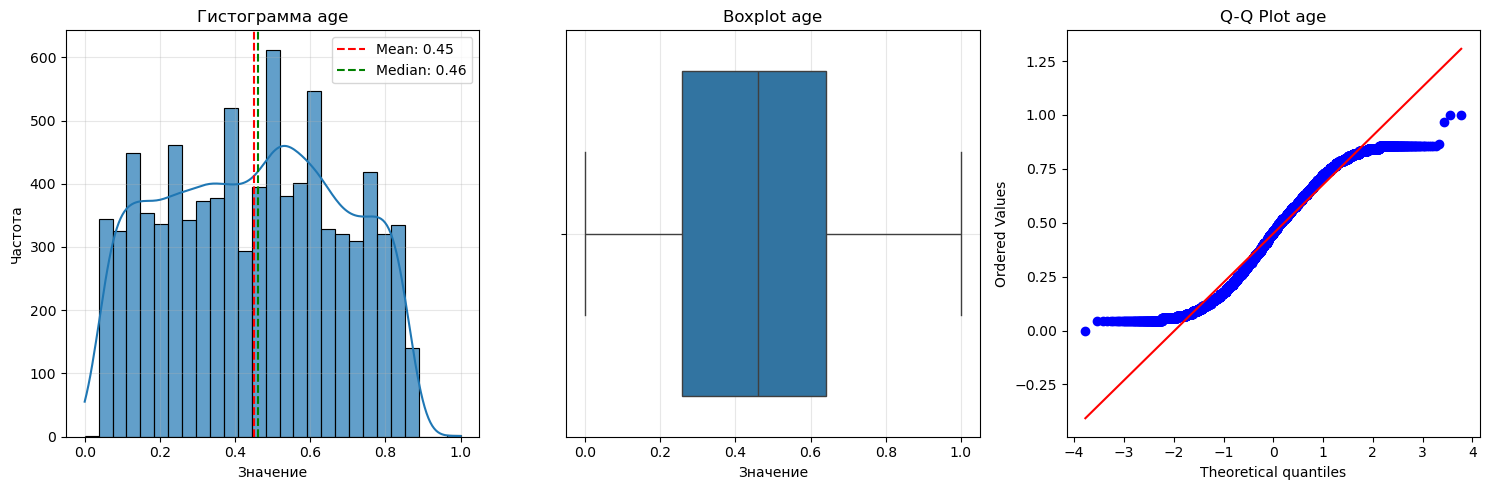

📊 АНАЛИЗ ПРИЗНАКА: age
count   8_685.0000
mean        0.4500
std         0.2312
min         0.0000
25%         0.2584
50%         0.4607
75%         0.6404
max         1.0000
Name: age, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: -0.010
Эксцесс: -1.113
Нормальность (p-value): 0.000e+00


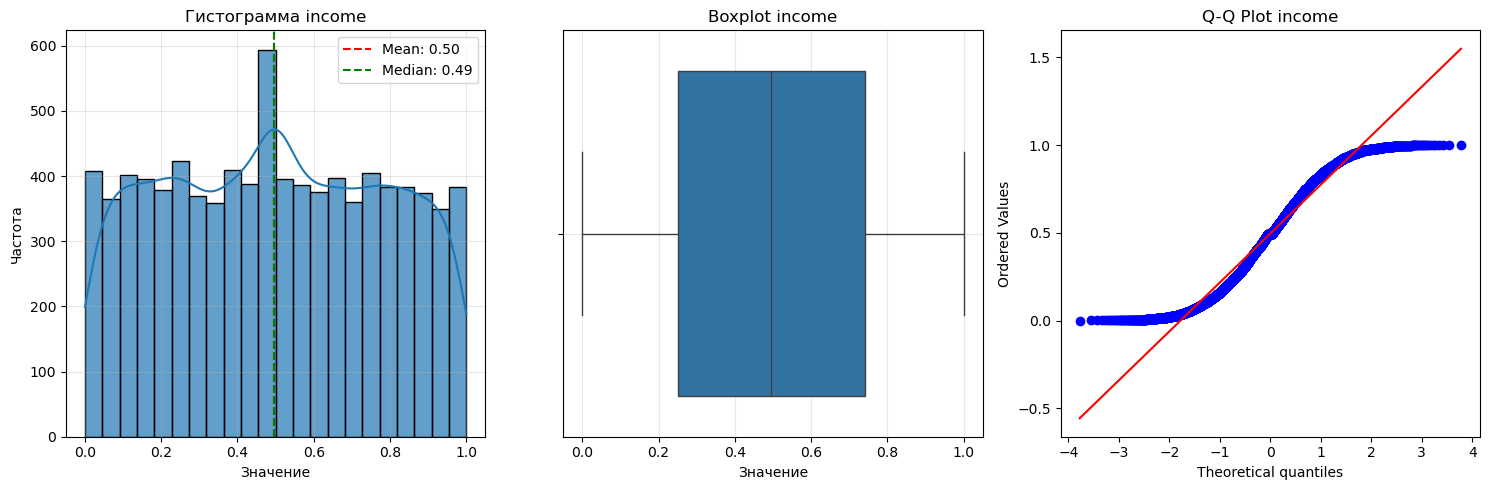

📊 АНАЛИЗ ПРИЗНАКА: income
count   8_685.0000
mean        0.4961
std         0.2847
min         0.0000
25%         0.2519
50%         0.4949
75%         0.7410
max         1.0000
Name: income, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: 0.013
Эксцесс: -1.147
Нормальность (p-value): 0.000e+00


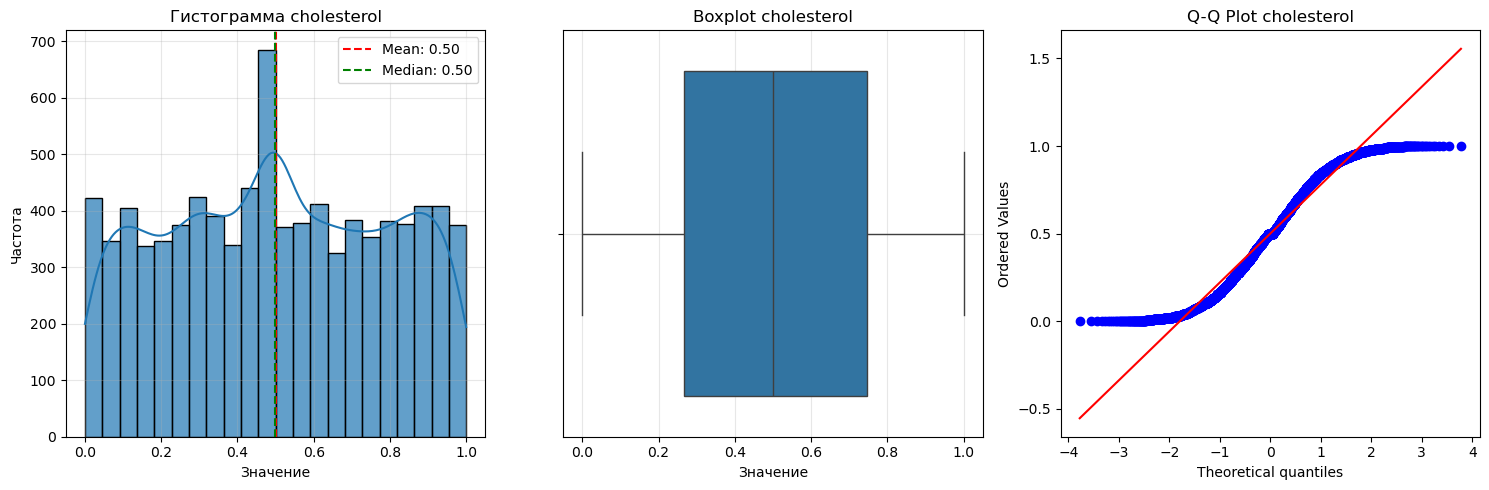

📊 АНАЛИЗ ПРИЗНАКА: cholesterol
count   8_685.0000
mean        0.5011
std         0.2847
min         0.0000
25%         0.2679
50%         0.4998
75%         0.7464
max         1.0000
Name: cholesterol, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: -0.001
Эксцесс: -1.127
Нормальность (p-value): 0.000e+00


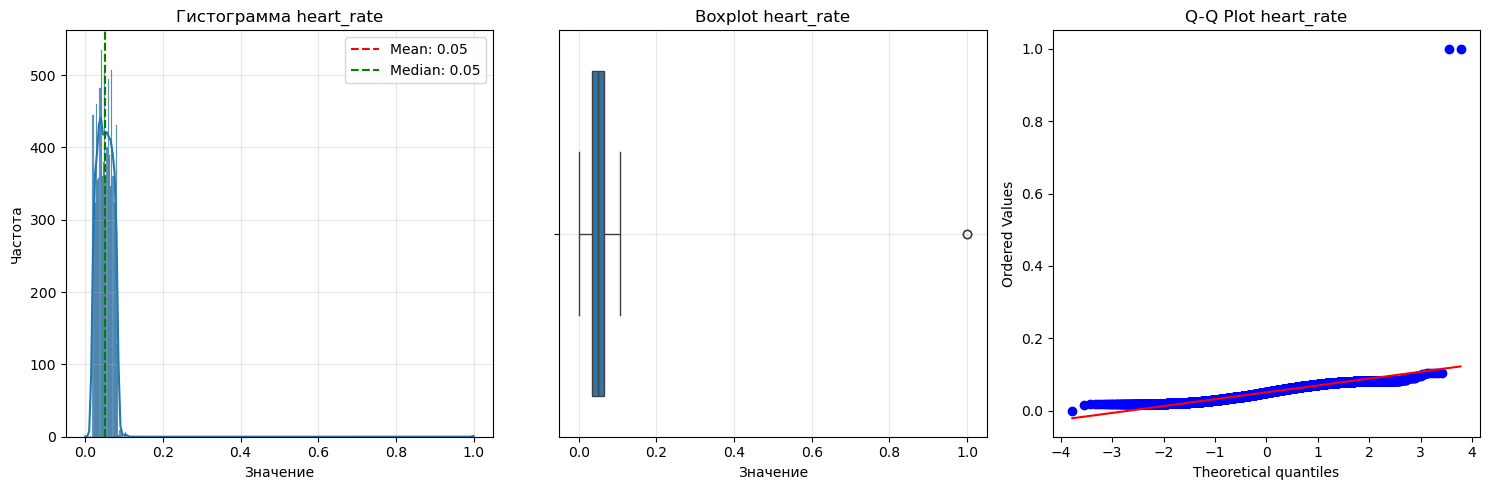

📊 АНАЛИЗ ПРИЗНАКА: heart_rate
count   8_685.0000
mean        0.0507
std         0.0235
min         0.0000
25%         0.0348
50%         0.0504
75%         0.0660
max         1.0000
Name: heart_rate, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: 15.282
Эксцесс: 616.469
Нормальность (p-value): 0.000e+00


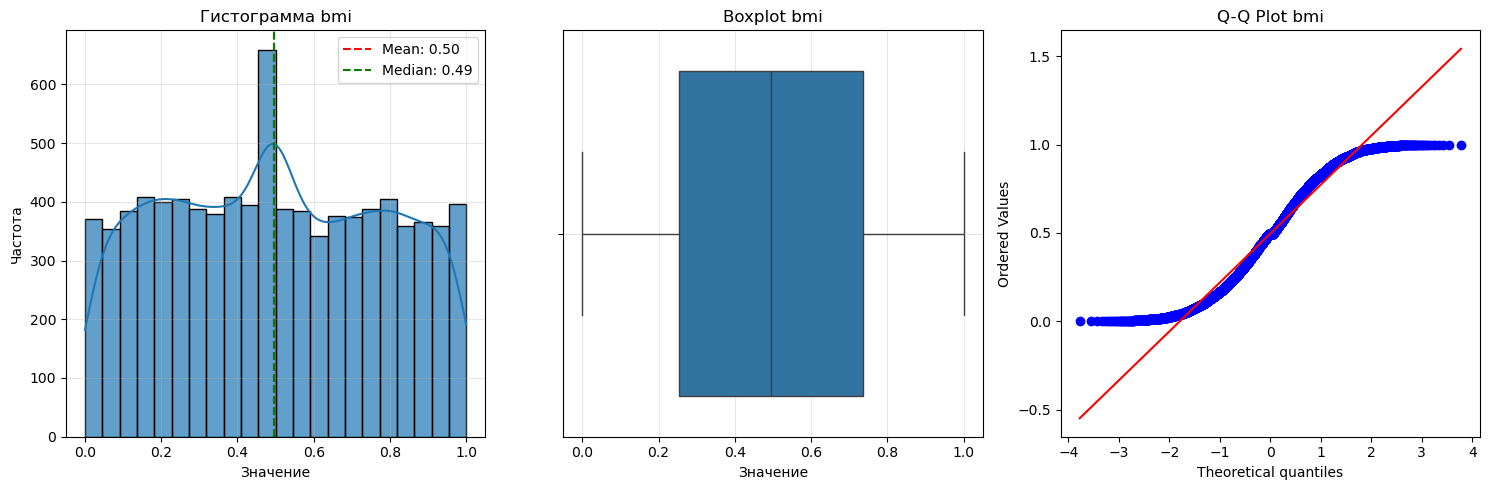

📊 АНАЛИЗ ПРИЗНАКА: bmi
count   8_685.0000
mean        0.4968
std         0.2826
min         0.0000
25%         0.2542
50%         0.4948
75%         0.7370
max         1.0000
Name: bmi, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: 0.033
Эксцесс: -1.135
Нормальность (p-value): 0.000e+00


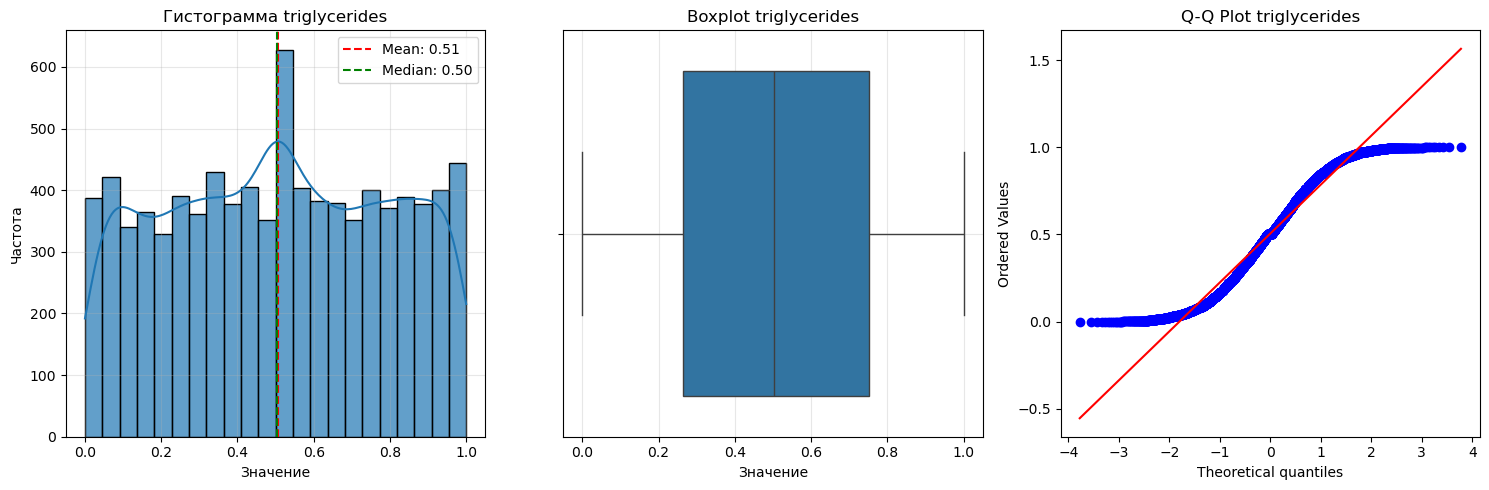

📊 АНАЛИЗ ПРИЗНАКА: triglycerides
count   8_685.0000
mean        0.5055
std         0.2863
min         0.0000
25%         0.2636
50%         0.5036
75%         0.7506
max         1.0000
Name: triglycerides, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: -0.012
Эксцесс: -1.140
Нормальность (p-value): 0.000e+00


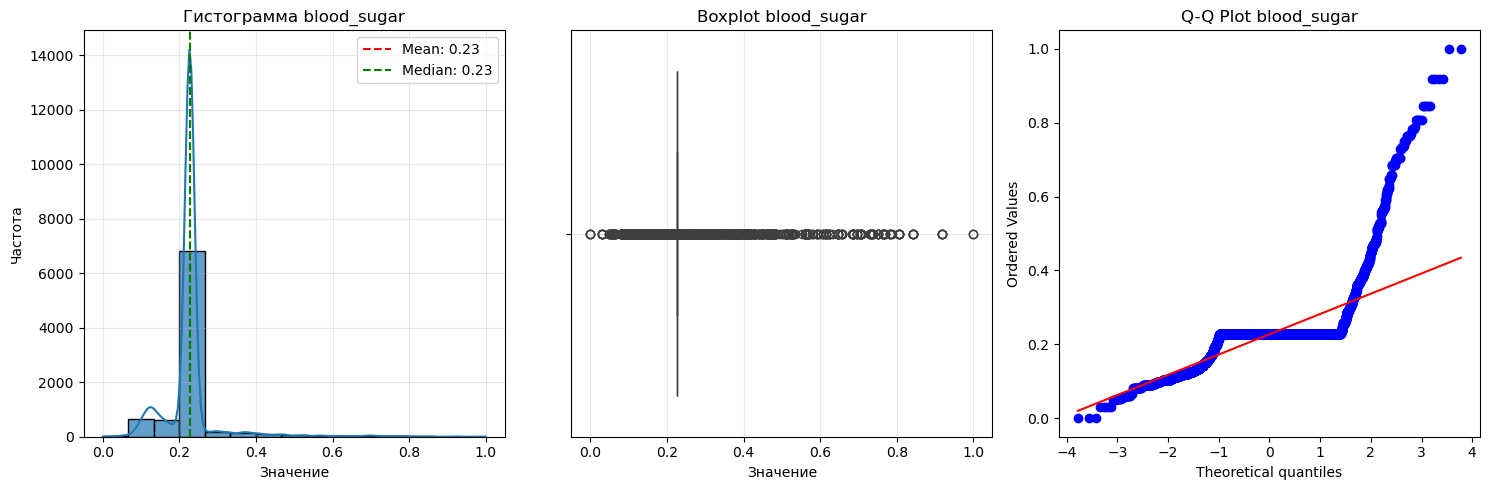

📊 АНАЛИЗ ПРИЗНАКА: blood_sugar
count   8_685.0000
mean        0.2273
std         0.0766
min         0.0000
25%         0.2270
50%         0.2270
75%         0.2270
max         1.0000
Name: blood_sugar, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: 3.767
Эксцесс: 23.840
Нормальность (p-value): 0.000e+00


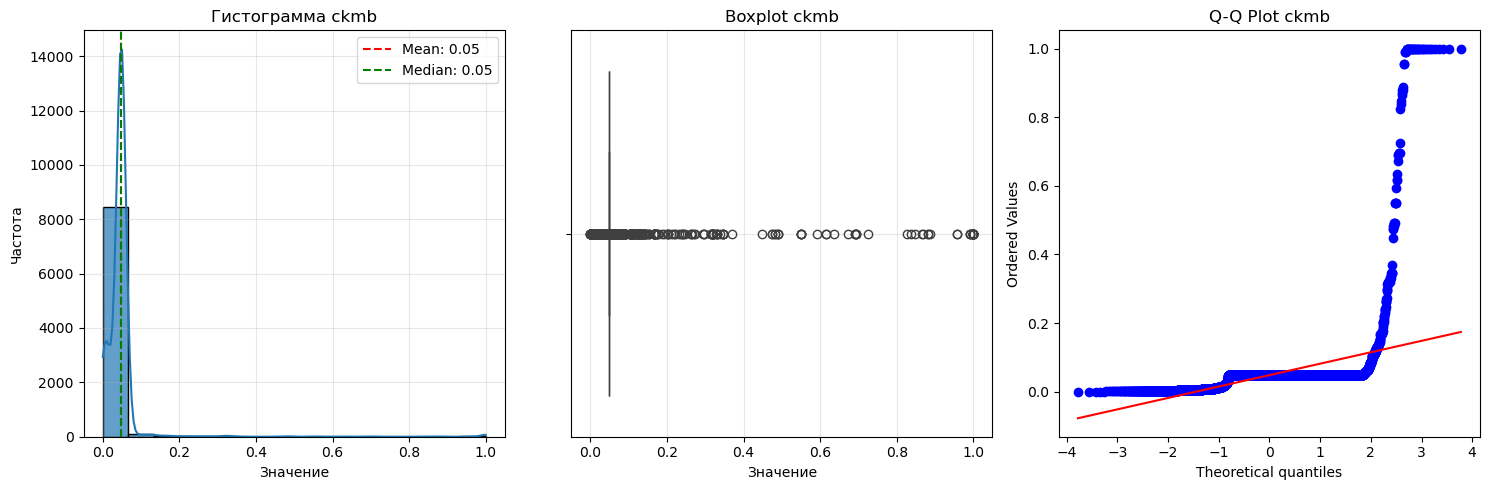

📊 АНАЛИЗ ПРИЗНАКА: ckmb
count   8_685.0000
mean        0.0482
std         0.0755
min         0.0000
25%         0.0482
50%         0.0482
75%         0.0482
max         1.0000
Name: ckmb, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: 10.311
Эксцесс: 118.245
Нормальность (p-value): 0.000e+00


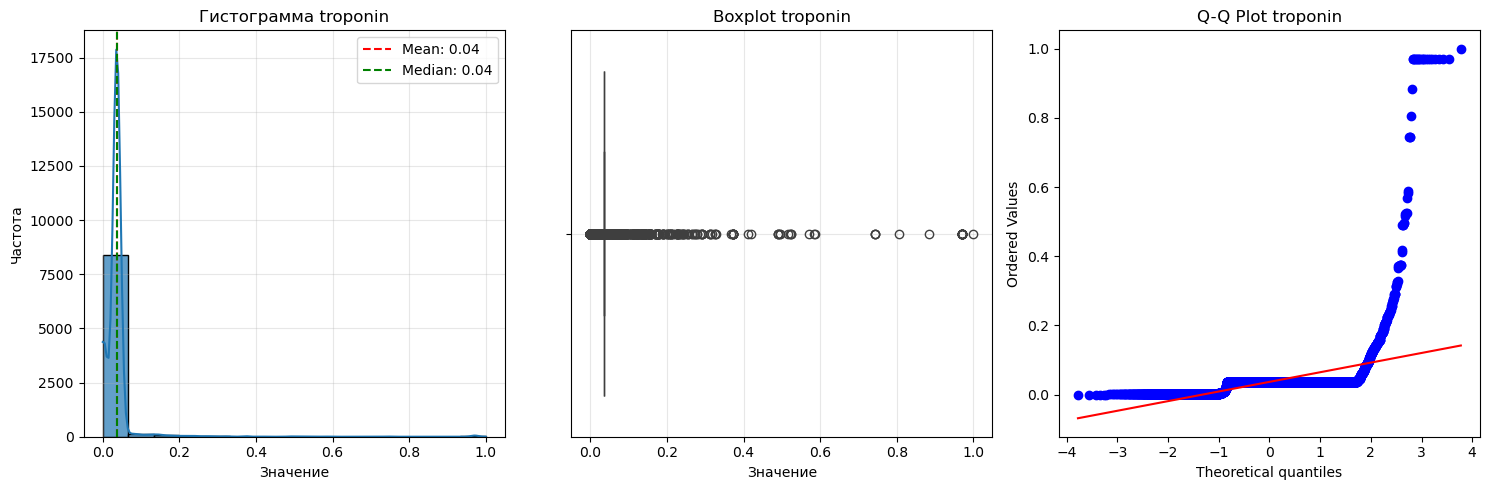

📊 АНАЛИЗ ПРИЗНАКА: troponin
count   8_685.0000
mean        0.0367
std         0.0602
min         0.0000
25%         0.0365
50%         0.0365
75%         0.0365
max         1.0000
Name: troponin, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: 11.559
Эксцесс: 161.740
Нормальность (p-value): 0.000e+00


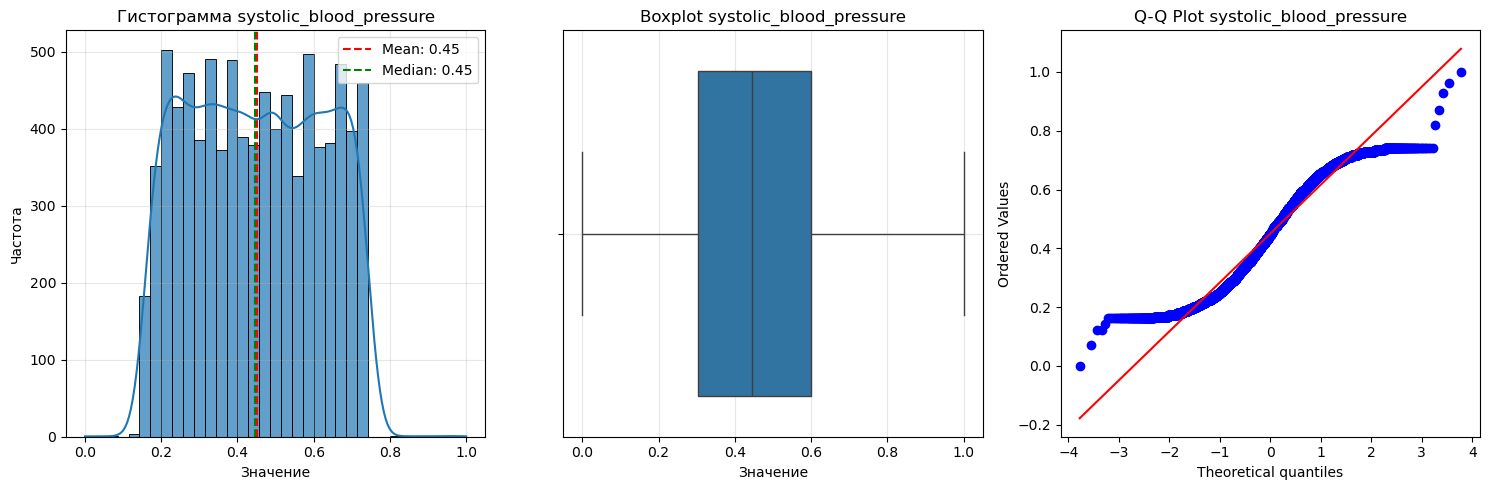

📊 АНАЛИЗ ПРИЗНАКА: systolic_blood_pressure
count   8_685.0000
mean        0.4503
std         0.1702
min         0.0000
25%         0.3032
50%         0.4452
75%         0.6000
max         1.0000
Name: systolic_blood_pressure, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: 0.025
Эксцесс: -1.191
Нормальность (p-value): 0.000e+00


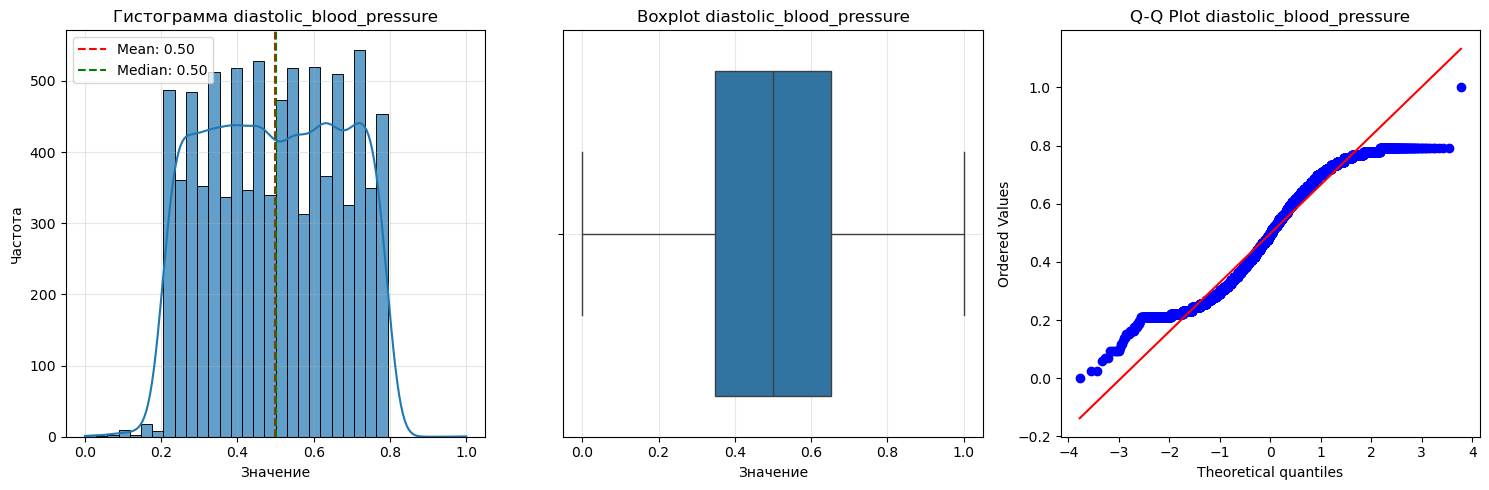

📊 АНАЛИЗ ПРИЗНАКА: diastolic_blood_pressure
count   8_685.0000
mean        0.4976
std         0.1718
min         0.0000
25%         0.3488
50%         0.5000
75%         0.6512
max         1.0000
Name: diastolic_blood_pressure, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: -0.019
Эксцесс: -1.163
Нормальность (p-value): 0.000e+00


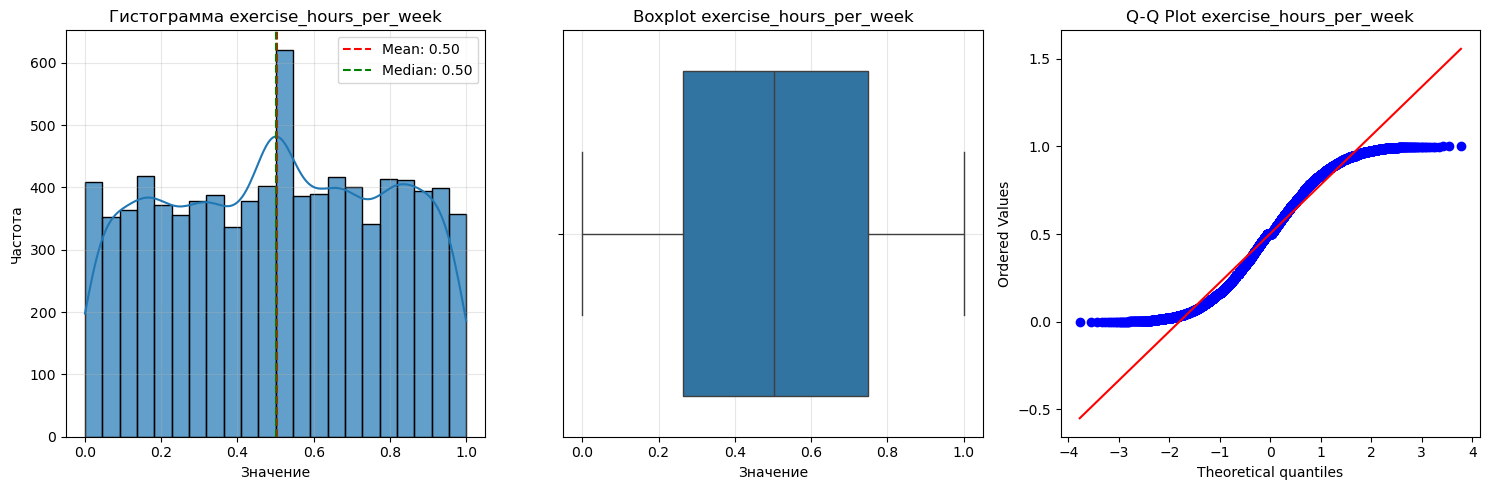

📊 АНАЛИЗ ПРИЗНАКА: exercise_hours_per_week
count   8_685.0000
mean        0.5034
std         0.2848
min         0.0000
25%         0.2633
50%         0.5021
75%         0.7487
max         1.0000
Name: exercise_hours_per_week, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: -0.032
Эксцесс: -1.150
Нормальность (p-value): 0.000e+00


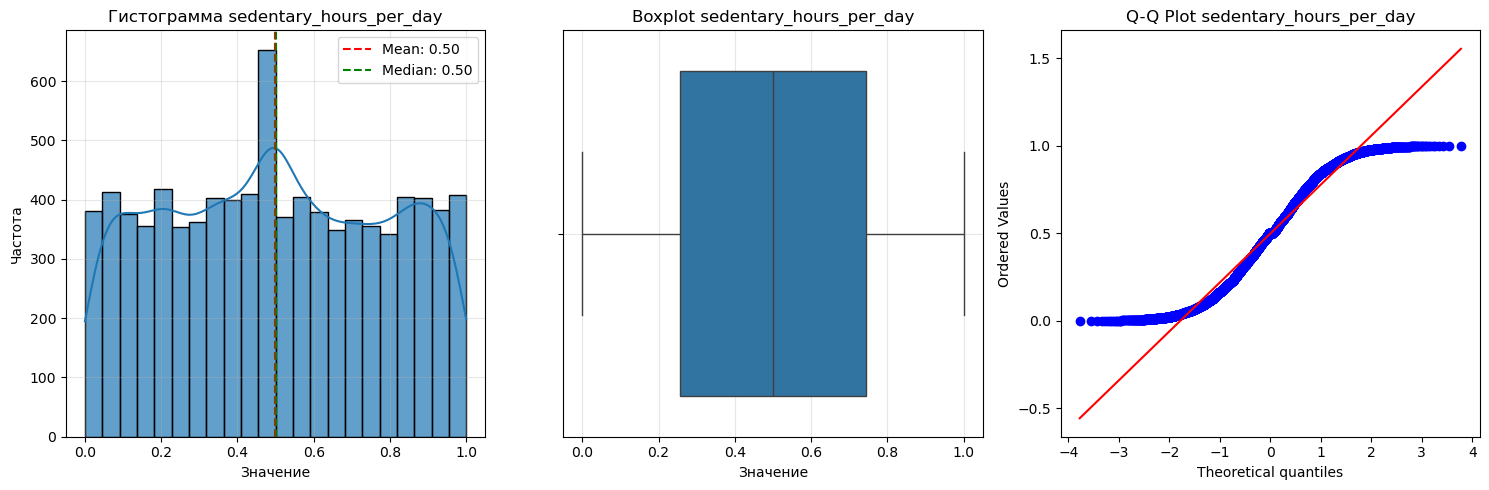

📊 АНАЛИЗ ПРИЗНАКА: sedentary_hours_per_day
count   8_685.0000
mean        0.4992
std         0.2853
min         0.0000
25%         0.2559
50%         0.4999
75%         0.7446
max         1.0000
Name: sedentary_hours_per_day, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: 0.016
Эксцесс: -1.142
Нормальность (p-value): 0.000e+00


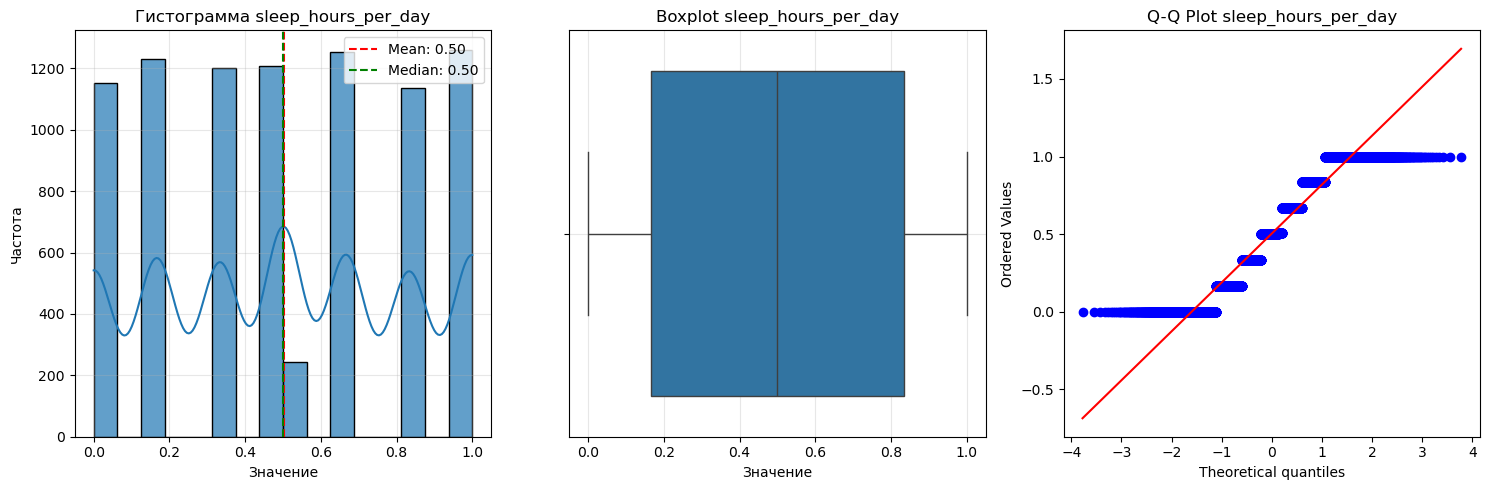

📊 АНАЛИЗ ПРИЗНАКА: sleep_hours_per_day
count   8_685.0000
mean        0.5037
std         0.3281
min         0.0000
25%         0.1667
50%         0.5000
75%         0.8333
max         1.0000
Name: sleep_hours_per_day, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: -0.001
Эксцесс: -1.191
Нормальность (p-value): 0.000e+00


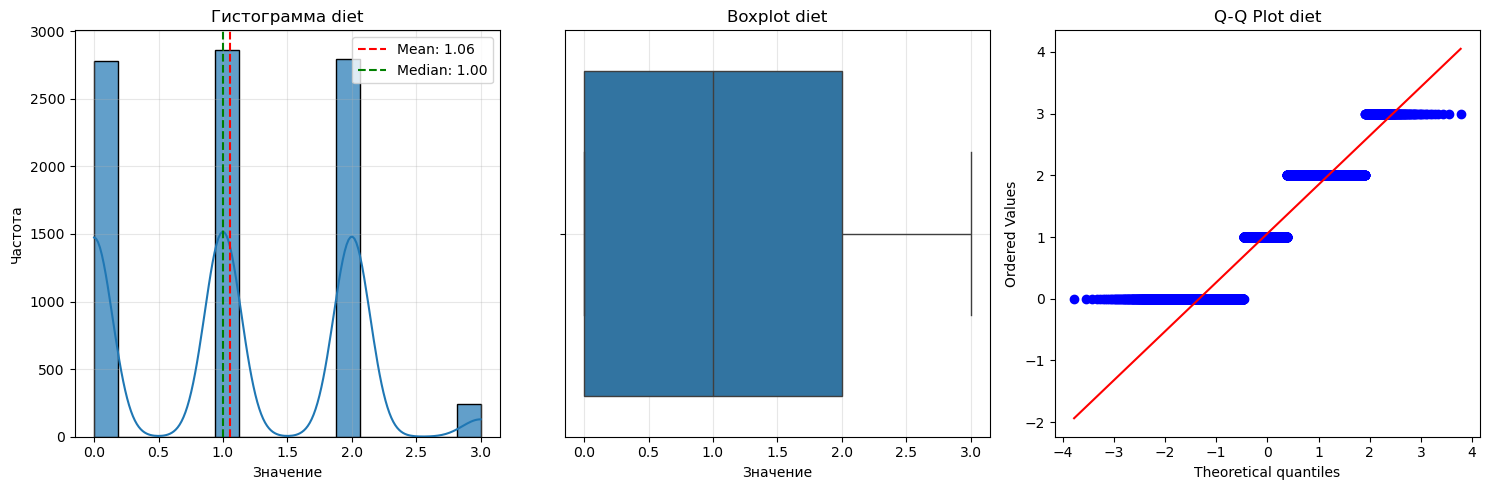

📊 АНАЛИЗ ПРИЗНАКА: diet
count   8_685.0000
mean        1.0575
std         0.8666
min         0.0000
25%         0.0000
50%         1.0000
75%         2.0000
max         3.0000
Name: diet, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: 0.147
Эксцесс: -1.133
Нормальность (p-value): 0.000e+00


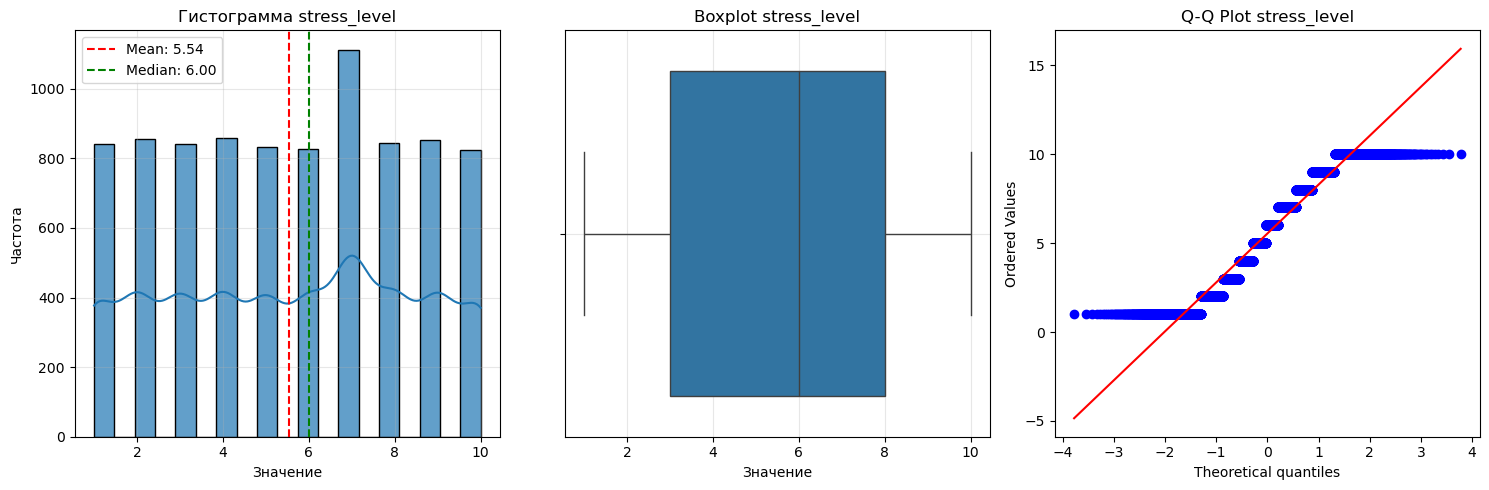

📊 АНАЛИЗ ПРИЗНАКА: stress_level
count   8_685.0000
mean        5.5355
std         2.8383
min         1.0000
25%         3.0000
50%         6.0000
75%         8.0000
max        10.0000
Name: stress_level, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: -0.041
Эксцесс: -1.199
Нормальность (p-value): 0.000e+00


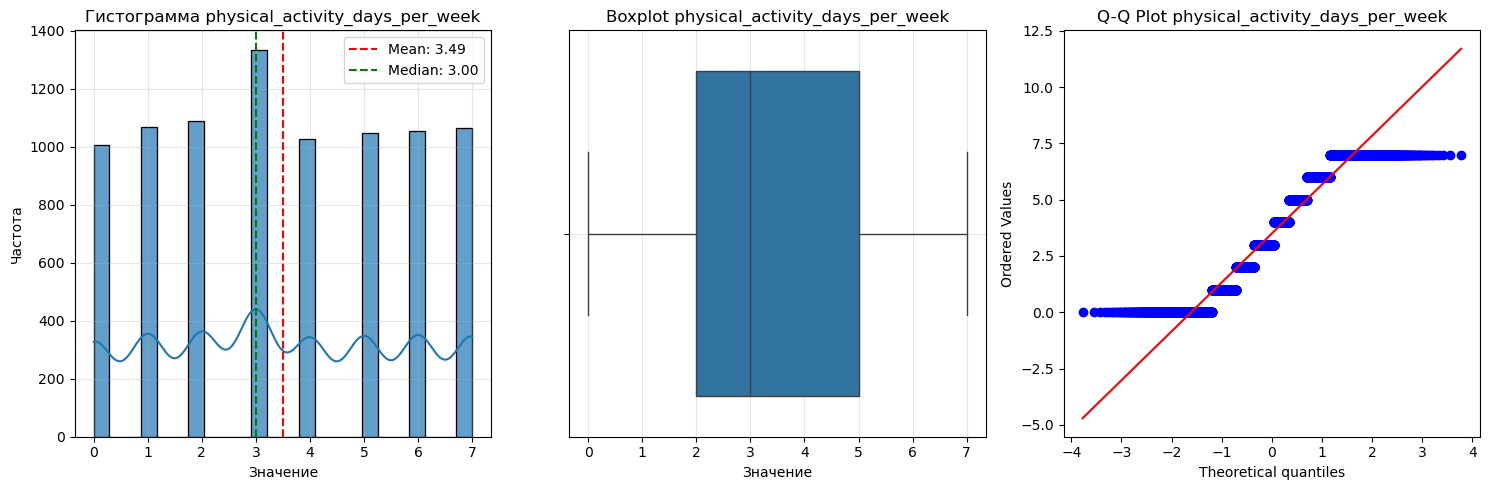

📊 АНАЛИЗ ПРИЗНАКА: physical_activity_days_per_week
count   8_685.0000
mean        3.4941
std         2.2512
min         0.0000
25%         2.0000
50%         3.0000
75%         5.0000
max         7.0000
Name: physical_activity_days_per_week, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: 0.029
Эксцесс: -1.186
Нормальность (p-value): 0.000e+00


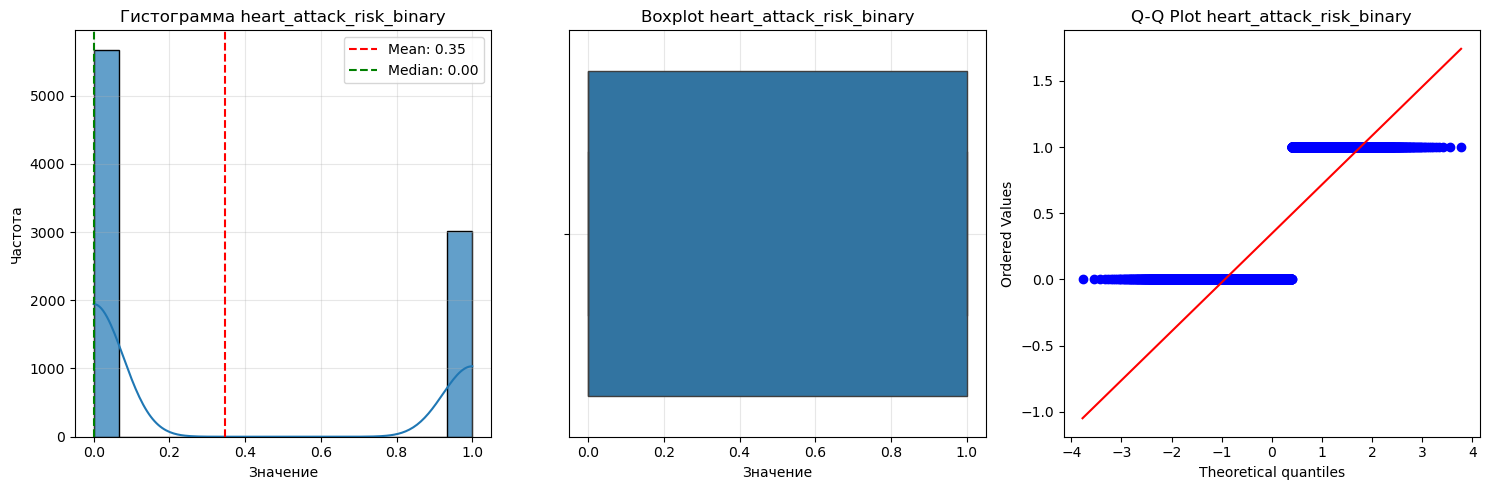

📊 АНАЛИЗ ПРИЗНАКА: heart_attack_risk_binary
count   8_685.0000
mean        0.3469
std         0.4760
min         0.0000
25%         0.0000
50%         0.0000
75%         1.0000
max         1.0000
Name: heart_attack_risk_binary, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: 0.643
Эксцесс: -1.587
Нормальность (p-value): 0.000e+00


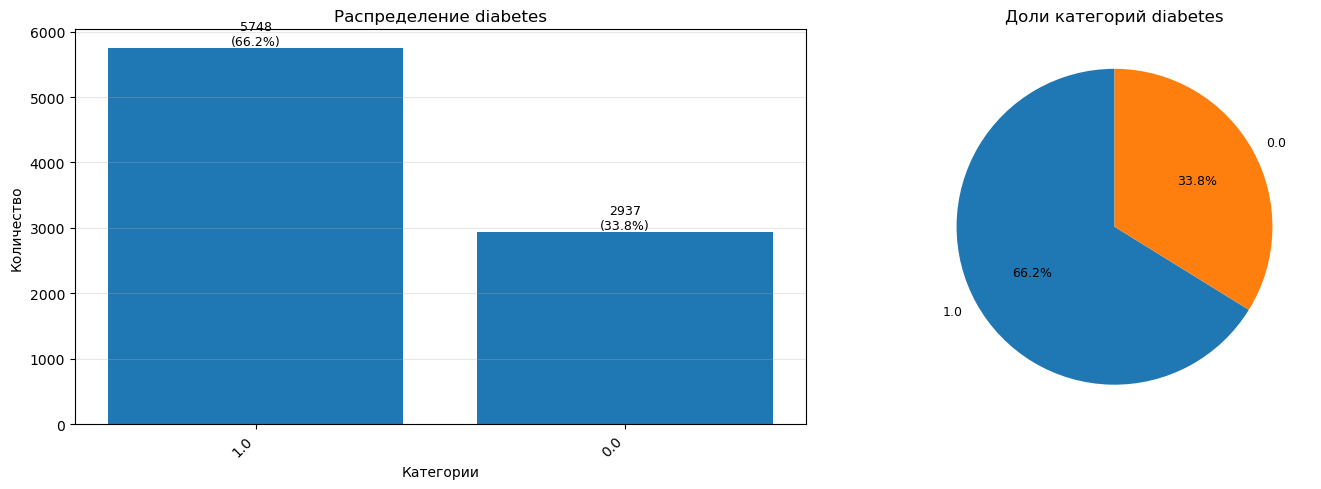

📊 АНАЛИЗ КАТЕГОРИАЛЬНОГО ПРИЗНАКА: diabetes
Уникальных значений: 2
Пропуски: 0 (0.0%)

📋 Распределение:
1.0: 5748 (66.2%)
0.0: 2937 (33.8%)


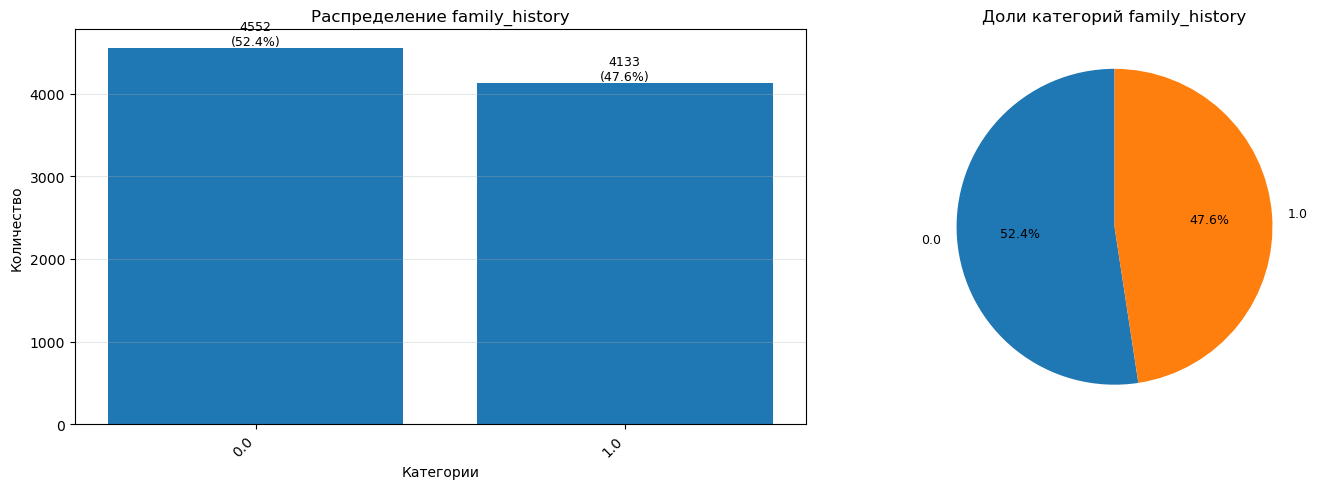

📊 АНАЛИЗ КАТЕГОРИАЛЬНОГО ПРИЗНАКА: family_history
Уникальных значений: 2
Пропуски: 0 (0.0%)

📋 Распределение:
0.0: 4552 (52.4%)
1.0: 4133 (47.6%)


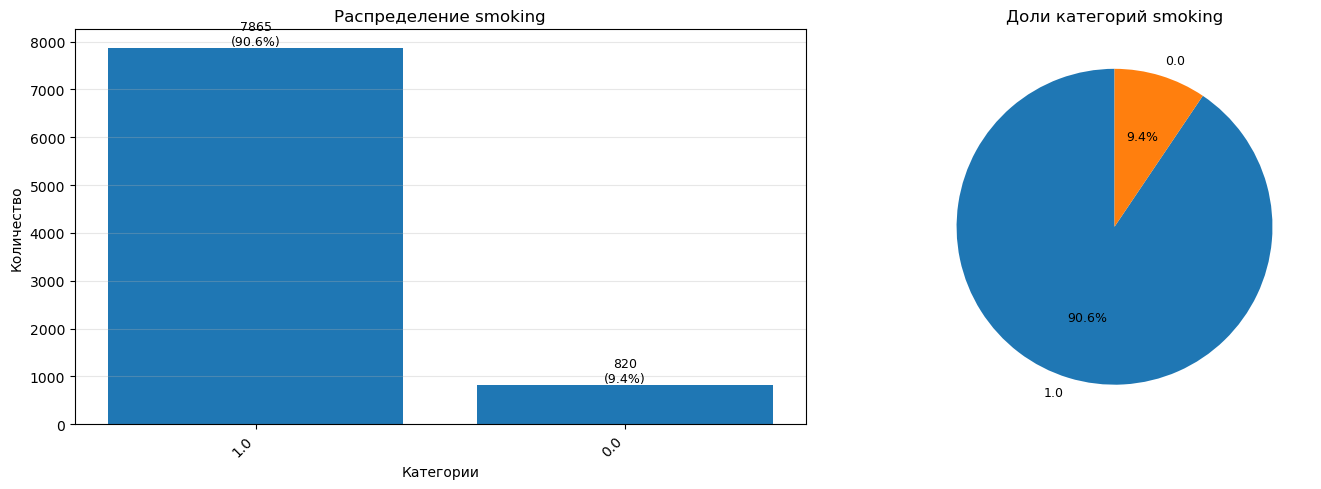

📊 АНАЛИЗ КАТЕГОРИАЛЬНОГО ПРИЗНАКА: smoking
Уникальных значений: 2
Пропуски: 0 (0.0%)

📋 Распределение:
1.0: 7865 (90.6%)
0.0: 820 (9.4%)


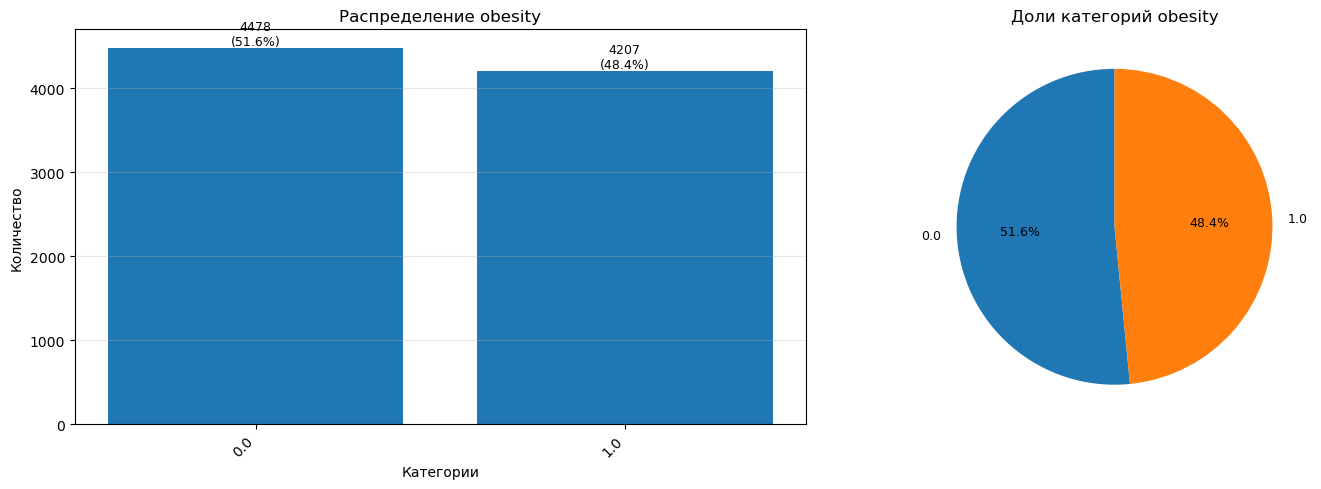

📊 АНАЛИЗ КАТЕГОРИАЛЬНОГО ПРИЗНАКА: obesity
Уникальных значений: 2
Пропуски: 0 (0.0%)

📋 Распределение:
0.0: 4478 (51.6%)
1.0: 4207 (48.4%)


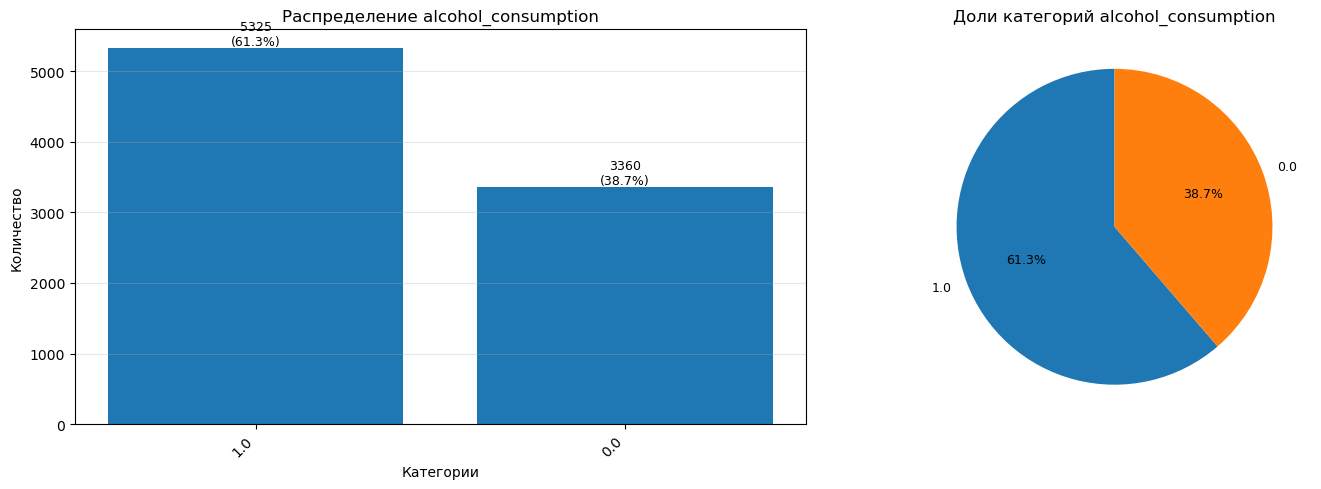

📊 АНАЛИЗ КАТЕГОРИАЛЬНОГО ПРИЗНАКА: alcohol_consumption
Уникальных значений: 2
Пропуски: 0 (0.0%)

📋 Распределение:
1.0: 5325 (61.3%)
0.0: 3360 (38.7%)


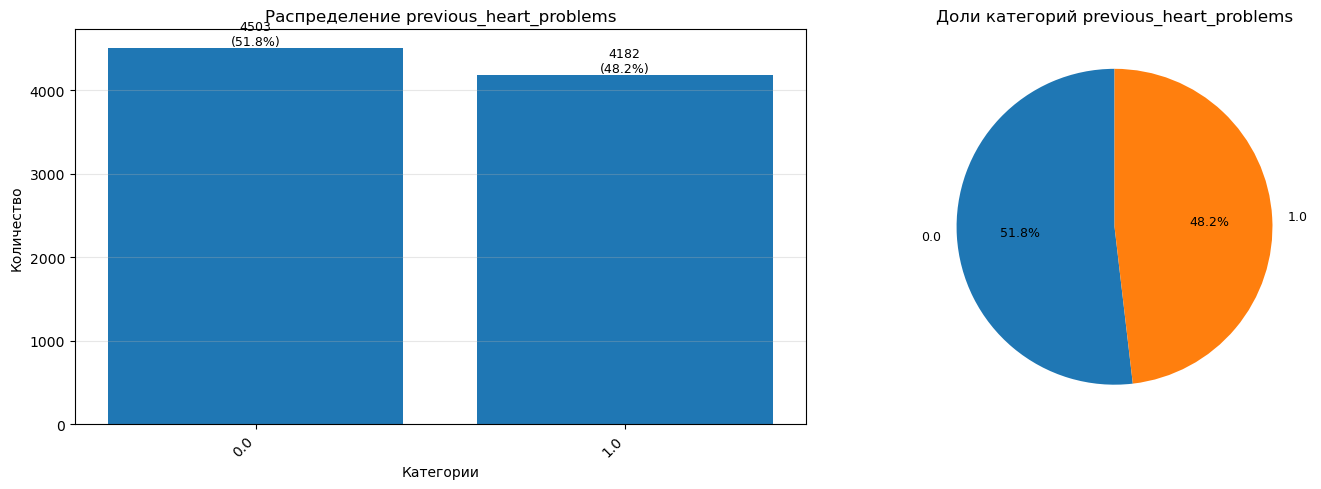

📊 АНАЛИЗ КАТЕГОРИАЛЬНОГО ПРИЗНАКА: previous_heart_problems
Уникальных значений: 2
Пропуски: 0 (0.0%)

📋 Распределение:
0.0: 4503 (51.8%)
1.0: 4182 (48.2%)


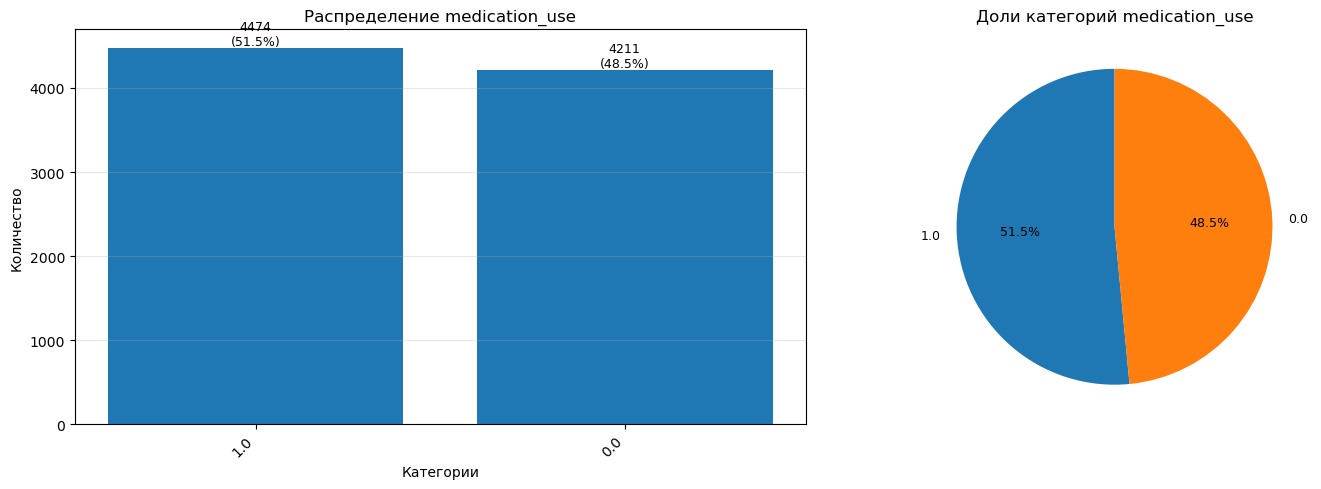

📊 АНАЛИЗ КАТЕГОРИАЛЬНОГО ПРИЗНАКА: medication_use
Уникальных значений: 2
Пропуски: 0 (0.0%)

📋 Распределение:
1.0: 4474 (51.5%)
0.0: 4211 (48.5%)


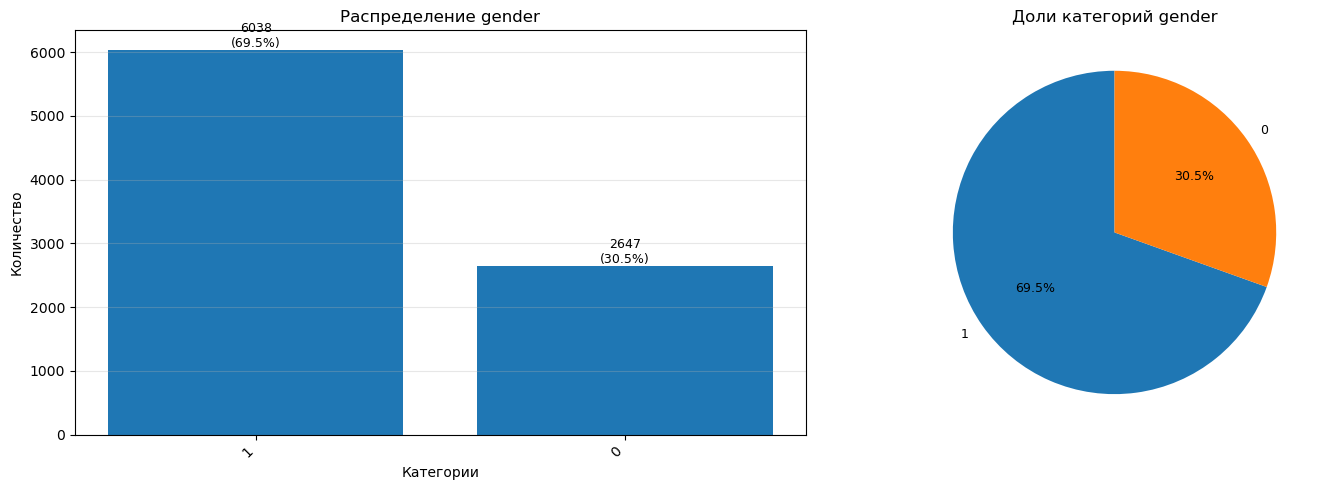

📊 АНАЛИЗ КАТЕГОРИАЛЬНОГО ПРИЗНАКА: gender
Уникальных значений: 2
Пропуски: 0 (0.0%)

📋 Распределение:
1: 6038 (69.5%)
0: 2647 (30.5%)


In [57]:
for col in num_columns:
    if col in df_heart_train.columns:
        plot_distribution(df_heart_train[col])

# Анализ категориальных признаков
for col in cat_columns:
    if col in df_heart_train.columns:
        plot_categorical(df_heart_train[col], top_n=10)

<font size="4"><b>Вывод</b></font><br/>
<font size="2">([к содержанию](#0.0))</font>
<br/>
**Качество данных**
* Пропусков нет, данные нормализованы
* Все признаки готовы для моделирования

**Ключевые insights:**
* Дисбаланс целевой переменной: 35% с риском vs 65% без риска
* Высокие факторы риска: 91% курят, 66% с диабетом, 61% употребляют алкоголь
* Проблемные признаки: heart_rate, blood_sugar, ckmb, troponin имеют аномальные распределения (требуют преобразования)
* Гендерный дисбаланс: 70% мужчин vs 30% женщин


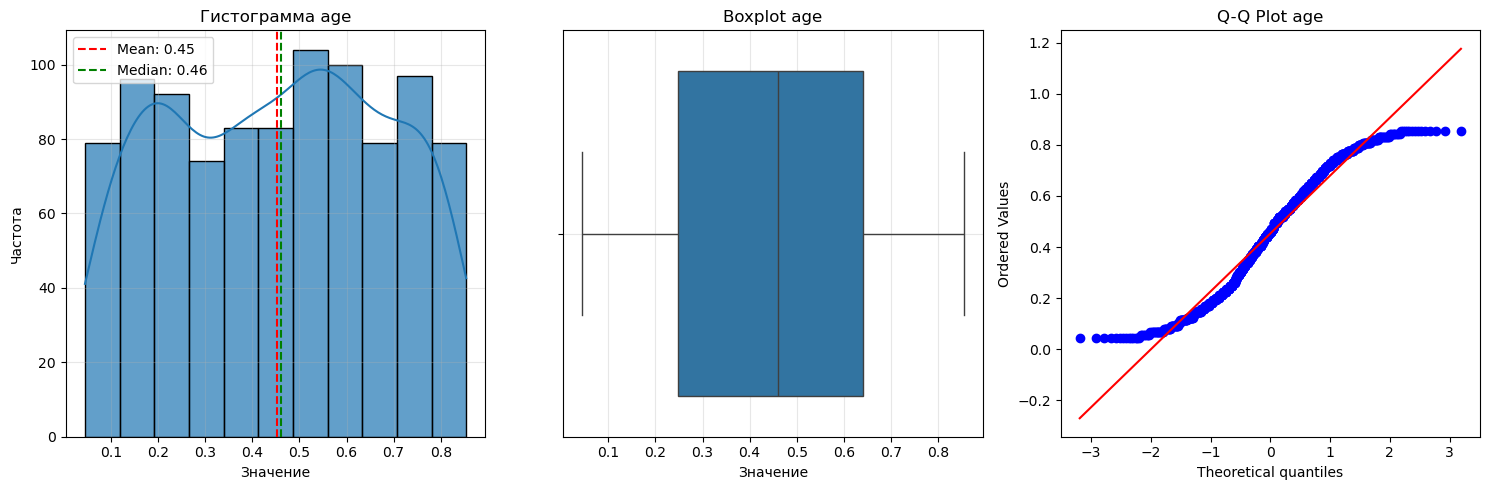

📊 АНАЛИЗ ПРИЗНАКА: age
count   966.0000
mean      0.4529
std       0.2311
min       0.0449
25%       0.2472
50%       0.4607
75%       0.6404
max       0.8539
Name: age, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: -0.036
Эксцесс: -1.162
Нормальность (p-value): 2.509e-116


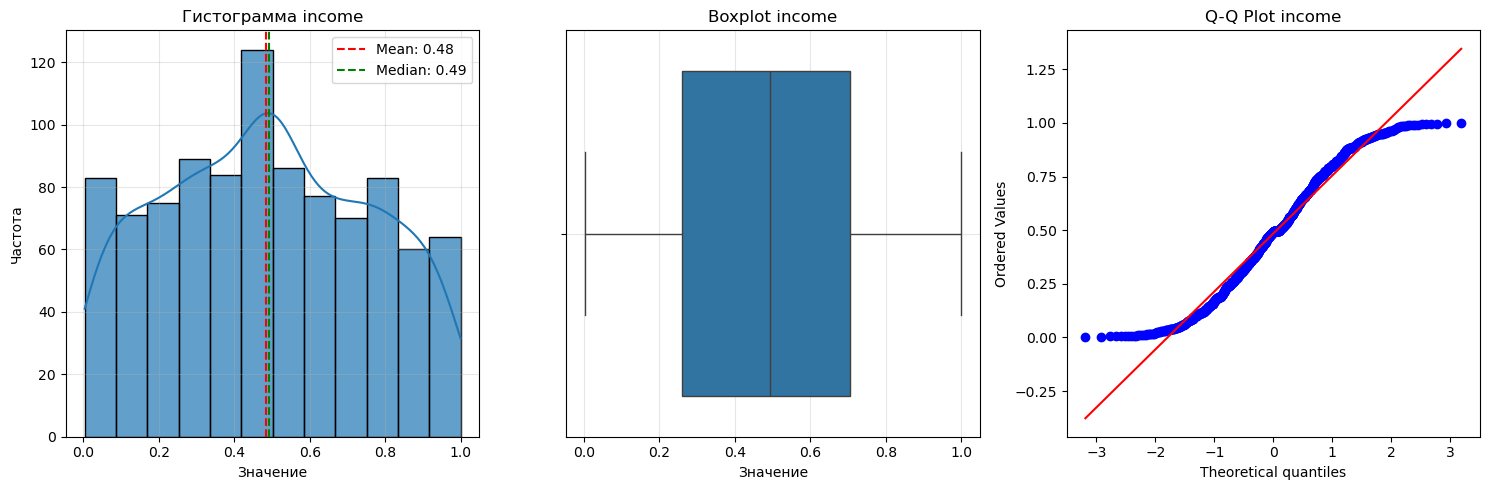

📊 АНАЛИЗ ПРИЗНАКА: income
count   966.0000
mean      0.4844
std       0.2739
min       0.0034
25%       0.2614
50%       0.4920
75%       0.7054
max       0.9989
Name: income, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: 0.050
Эксцесс: -1.030
Нормальность (p-value): 2.665e-53


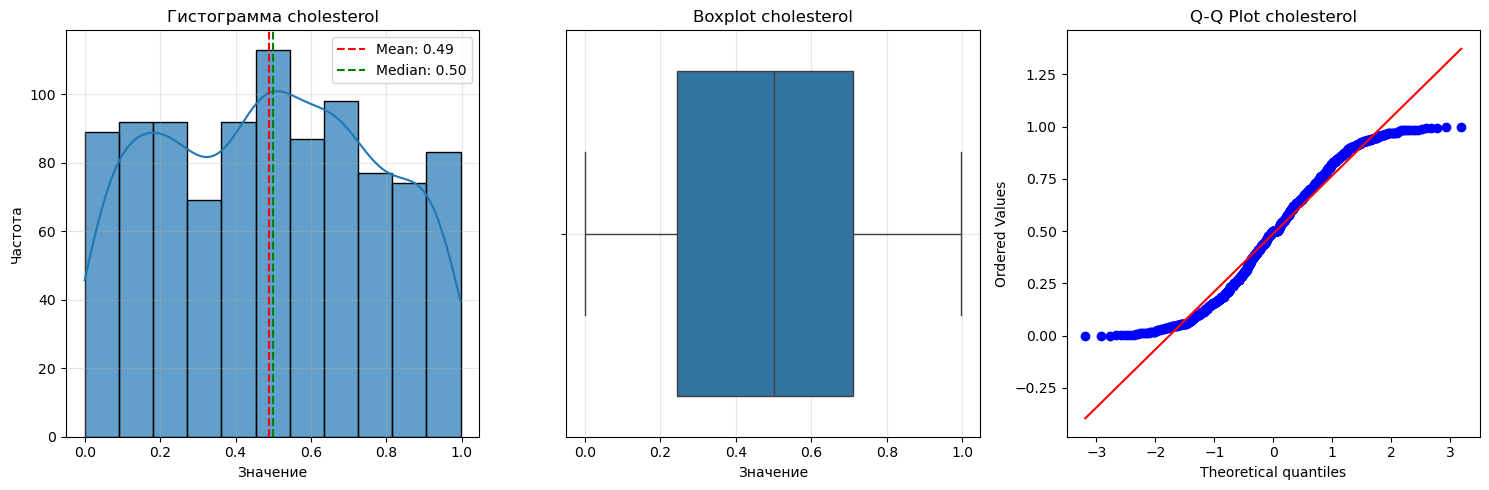

📊 АНАЛИЗ ПРИЗНАКА: cholesterol
count   966.0000
mean      0.4882
std       0.2820
min       0.0000
25%       0.2437
50%       0.4998
75%       0.7107
max       0.9964
Name: cholesterol, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: 0.016
Эксцесс: -1.123
Нормальность (p-value): 1.483e-90


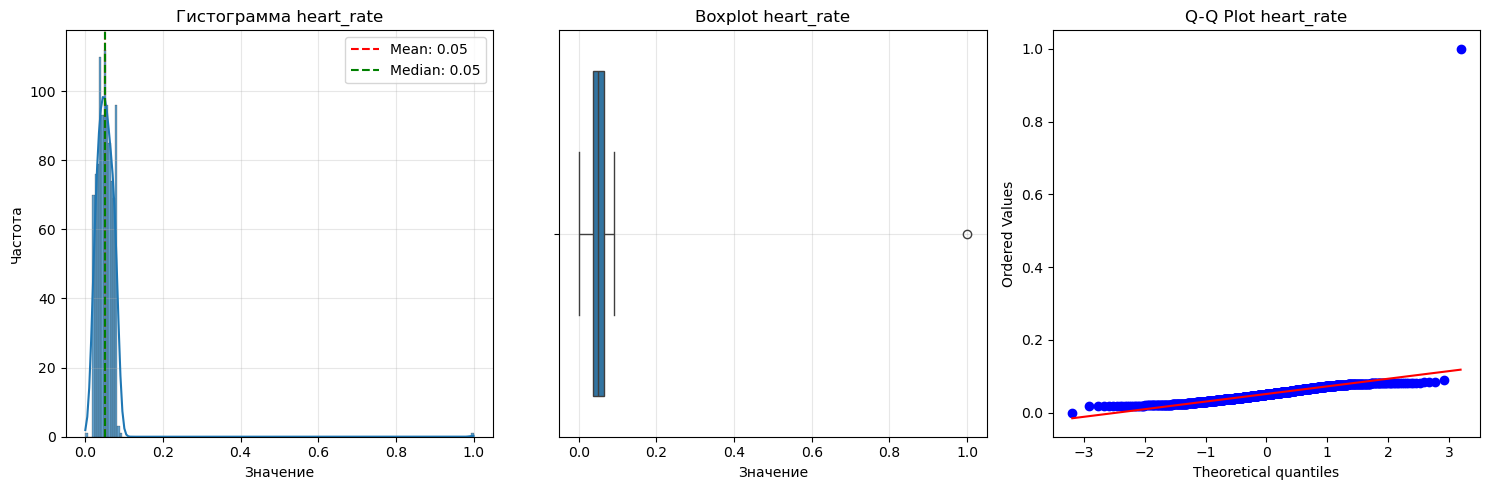

📊 АНАЛИЗ ПРИЗНАКА: heart_rate
count   966.0000
mean      0.0516
std       0.0355
min       0.0000
25%       0.0367
50%       0.0504
75%       0.0660
max       1.0000
Name: heart_rate, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: 19.777
Эксцесс: 528.078
Нормальность (p-value): 0.000e+00


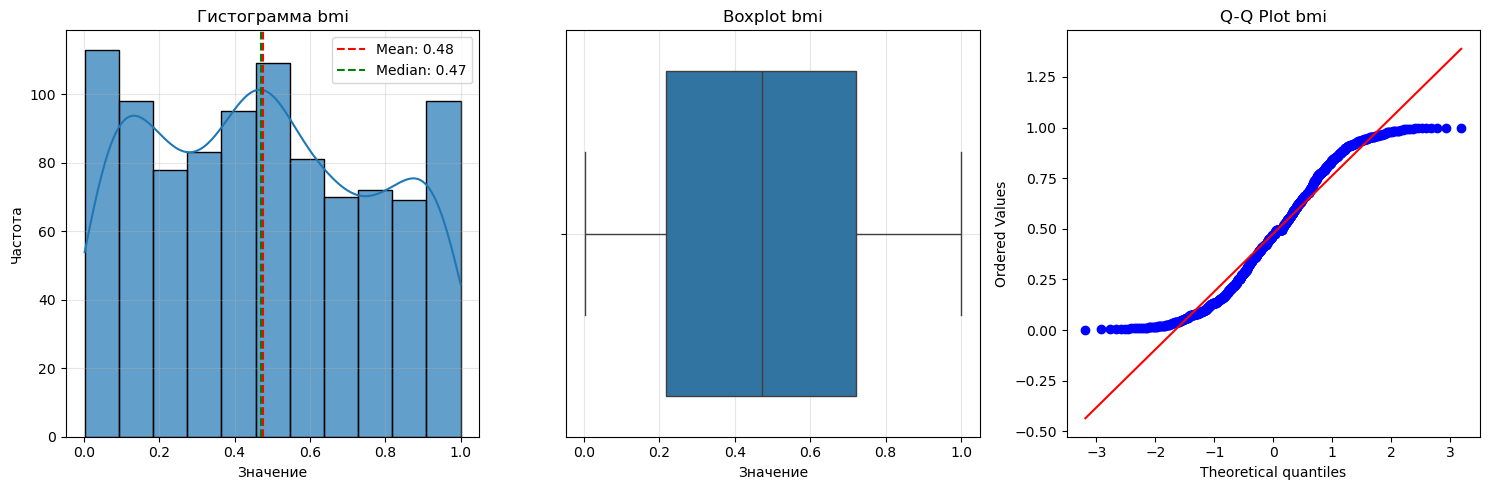

📊 АНАЛИЗ ПРИЗНАКА: bmi
count   966.0000
mean      0.4768
std       0.2920
min       0.0026
25%       0.2175
50%       0.4712
75%       0.7205
max       0.9995
Name: bmi, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: 0.117
Эксцесс: -1.150
Нормальность (p-value): 1.097e-107


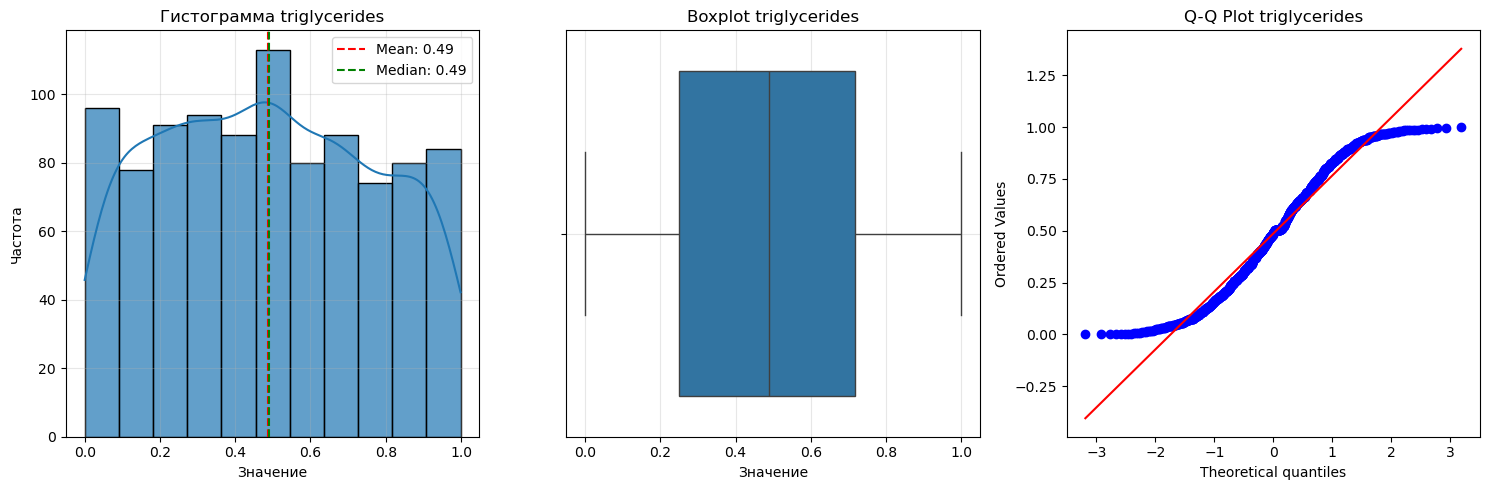

📊 АНАЛИЗ ПРИЗНАКА: triglycerides
count   966.0000
mean      0.4867
std       0.2845
min       0.0000
25%       0.2497
50%       0.4890
75%       0.7182
max       0.9987
Name: triglycerides, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: 0.068
Эксцесс: -1.127
Нормальность (p-value): 9.766e-93


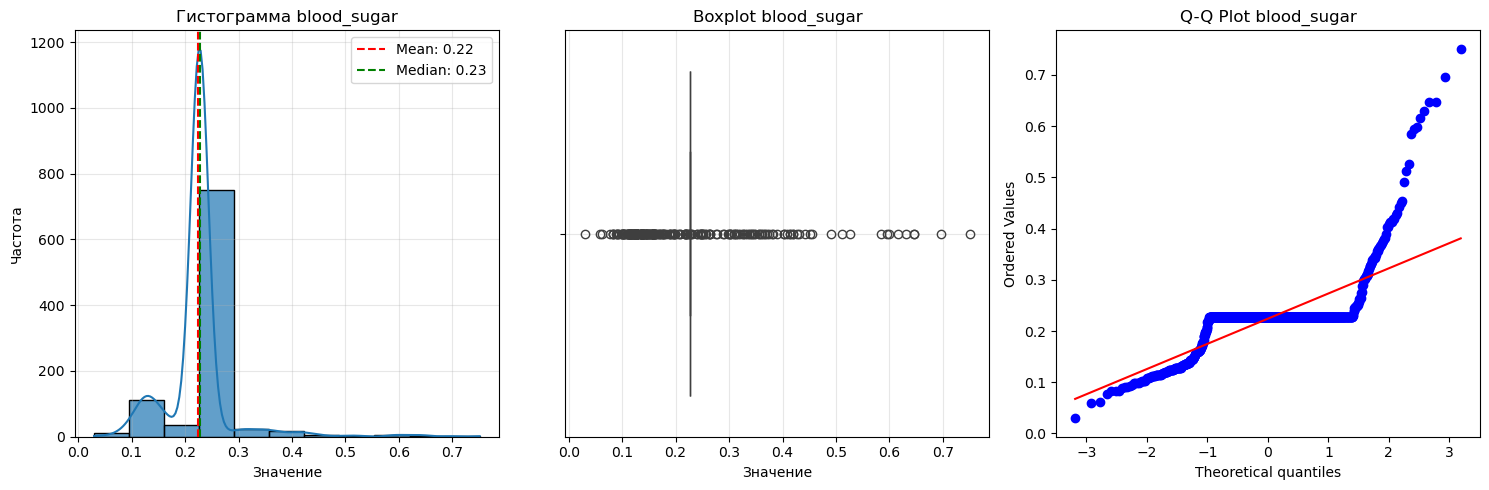

📊 АНАЛИЗ ПРИЗНАКА: blood_sugar
count   966.0000
mean      0.2241
std       0.0653
min       0.0296
25%       0.2270
50%       0.2270
75%       0.2270
max       0.7510
Name: blood_sugar, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: 2.842
Эксцесс: 17.696
Нормальность (p-value): 1.503e-144


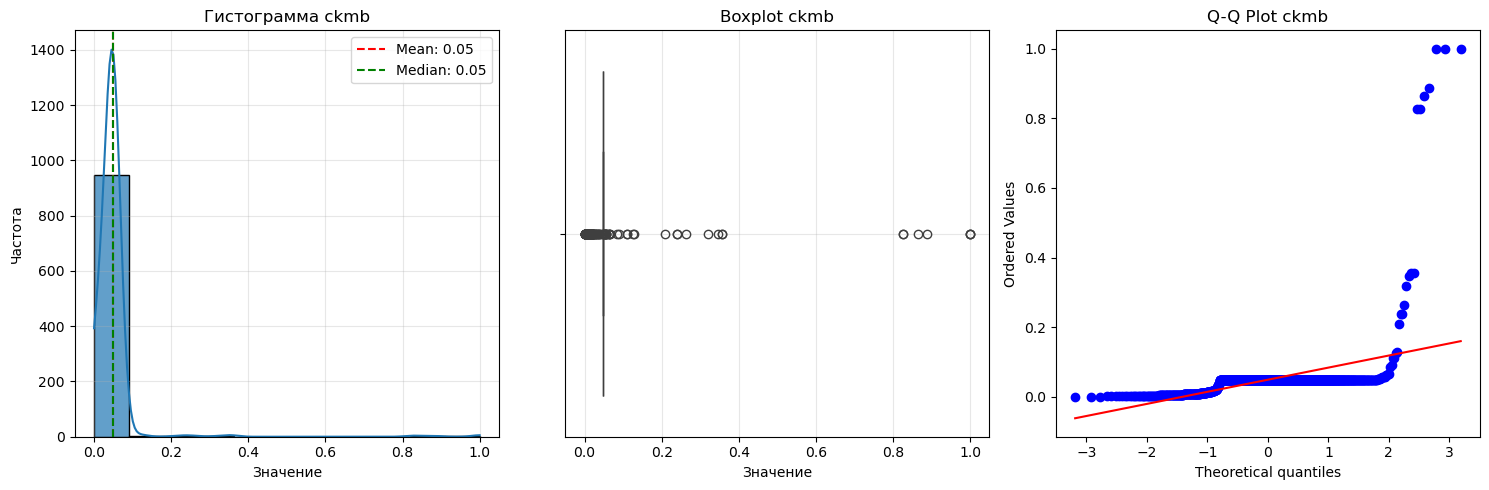

📊 АНАЛИЗ ПРИЗНАКА: ckmb
count   966.0000
mean      0.0489
std       0.0797
min       0.0000
25%       0.0482
50%       0.0482
75%       0.0482
max       1.0000
Name: ckmb, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: 9.778
Эксцесс: 104.299
Нормальность (p-value): 0.000e+00


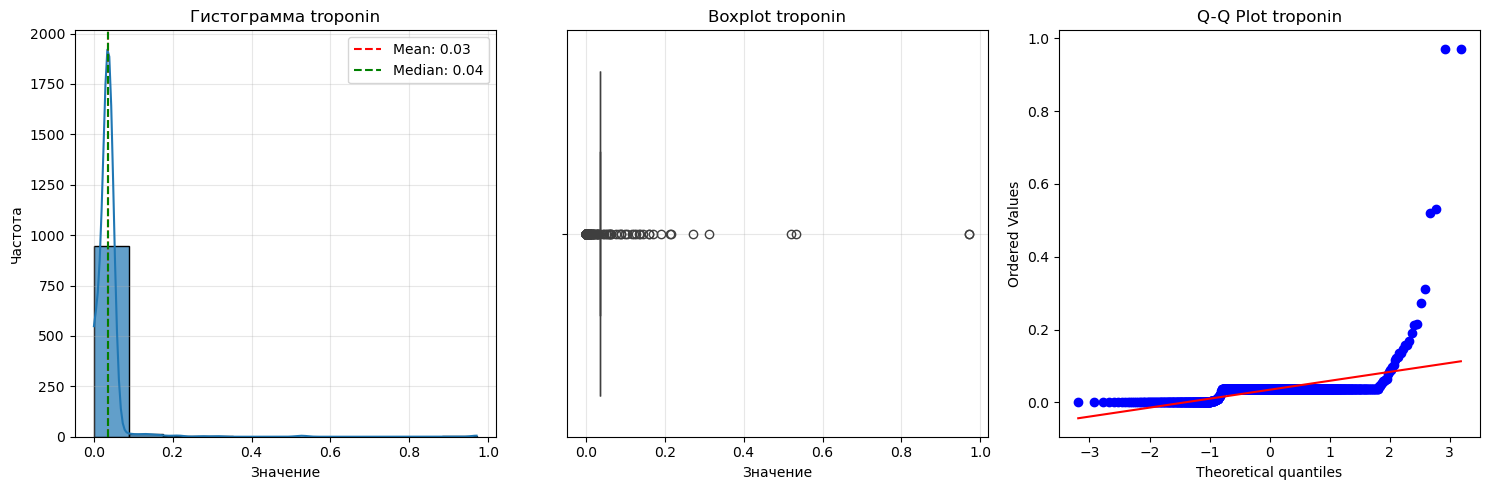

📊 АНАЛИЗ ПРИЗНАКА: troponin
count   966.0000
mean      0.0349
std       0.0539
min       0.0002
25%       0.0365
50%       0.0365
75%       0.0365
max       0.9709
Name: troponin, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: 12.853
Эксцесс: 203.390
Нормальность (p-value): 0.000e+00


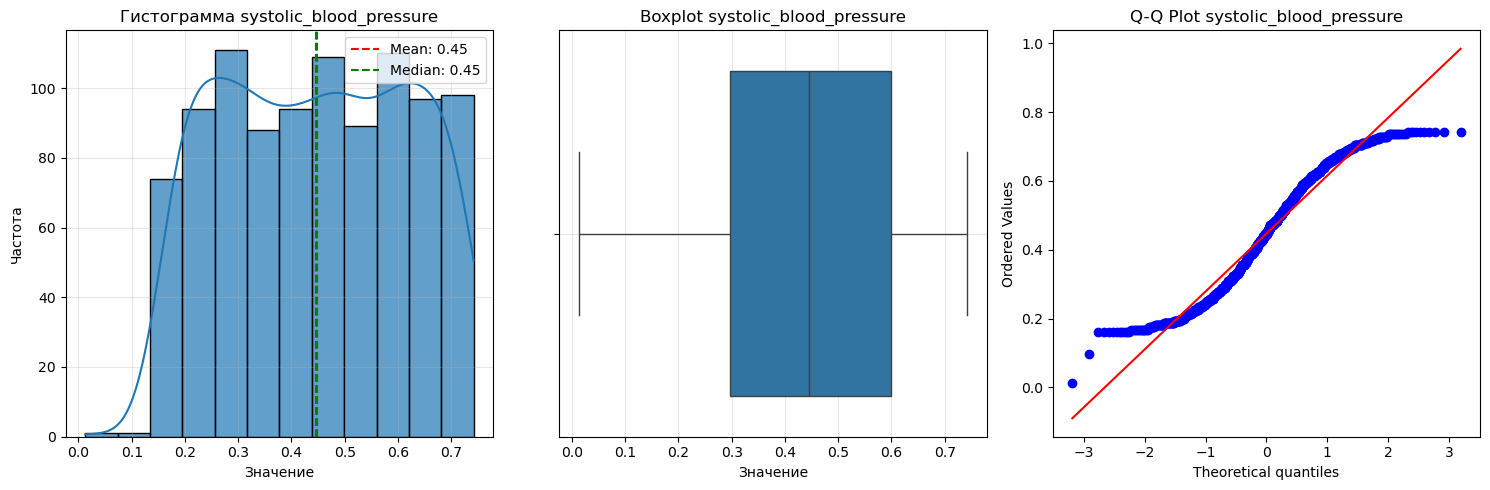

📊 АНАЛИЗ ПРИЗНАКА: systolic_blood_pressure
count   966.0000
mean      0.4472
std       0.1718
min       0.0129
25%       0.2968
50%       0.4452
75%       0.6000
max       0.7419
Name: systolic_blood_pressure, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: -0.001
Эксцесс: -1.208
Нормальность (p-value): 1.018e-163


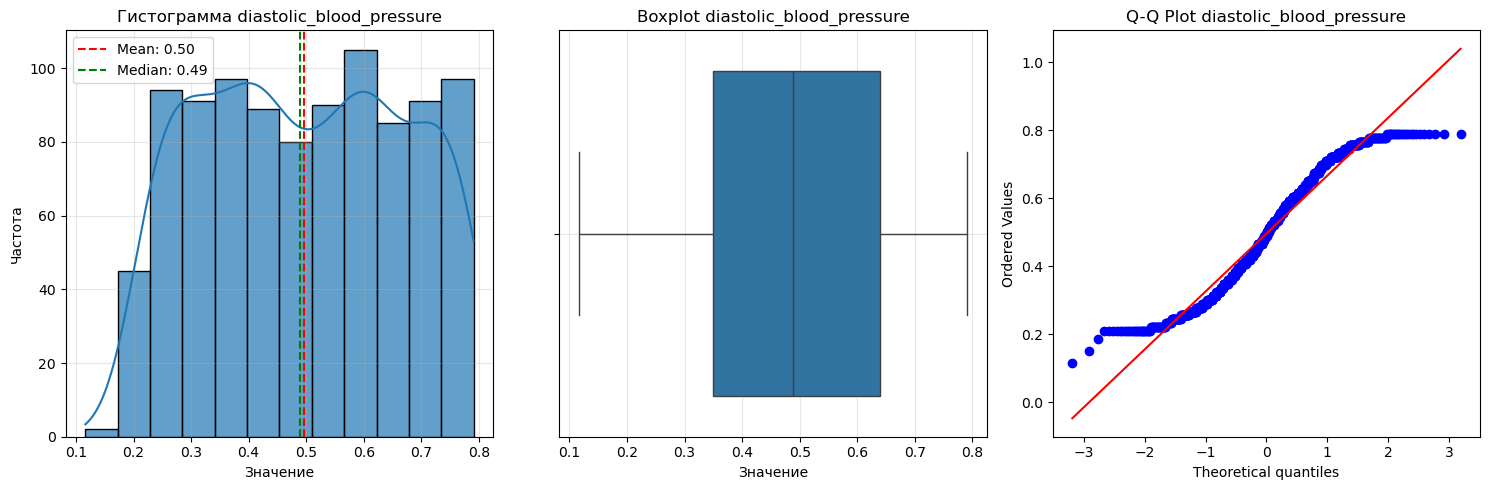

📊 АНАЛИЗ ПРИЗНАКА: diastolic_blood_pressure
count   966.0000
mean      0.4968
std       0.1739
min       0.1163
25%       0.3488
50%       0.4884
75%       0.6395
max       0.7907
Name: diastolic_blood_pressure, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: 0.025
Эксцесс: -1.200
Нормальность (p-value): 1.734e-154


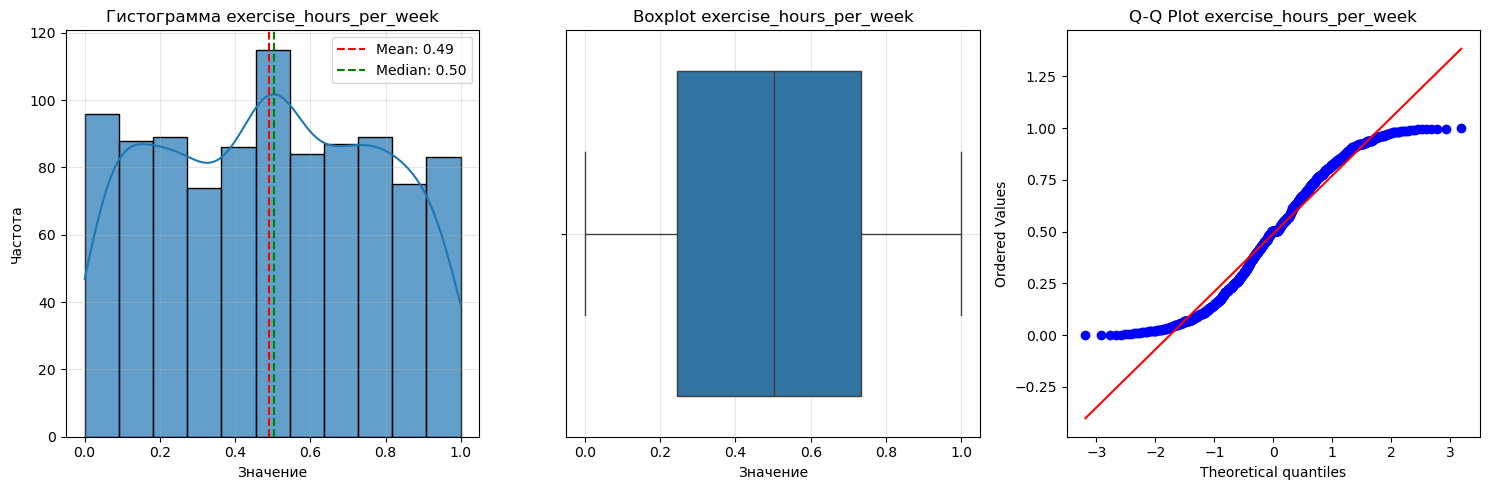

📊 АНАЛИЗ ПРИЗНАКА: exercise_hours_per_week
count   966.0000
mean      0.4907
std       0.2849
min       0.0003
25%       0.2434
50%       0.5021
75%       0.7344
max       0.9989
Name: exercise_hours_per_week, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: 0.008
Эксцесс: -1.152
Нормальность (p-value): 1.380e-108


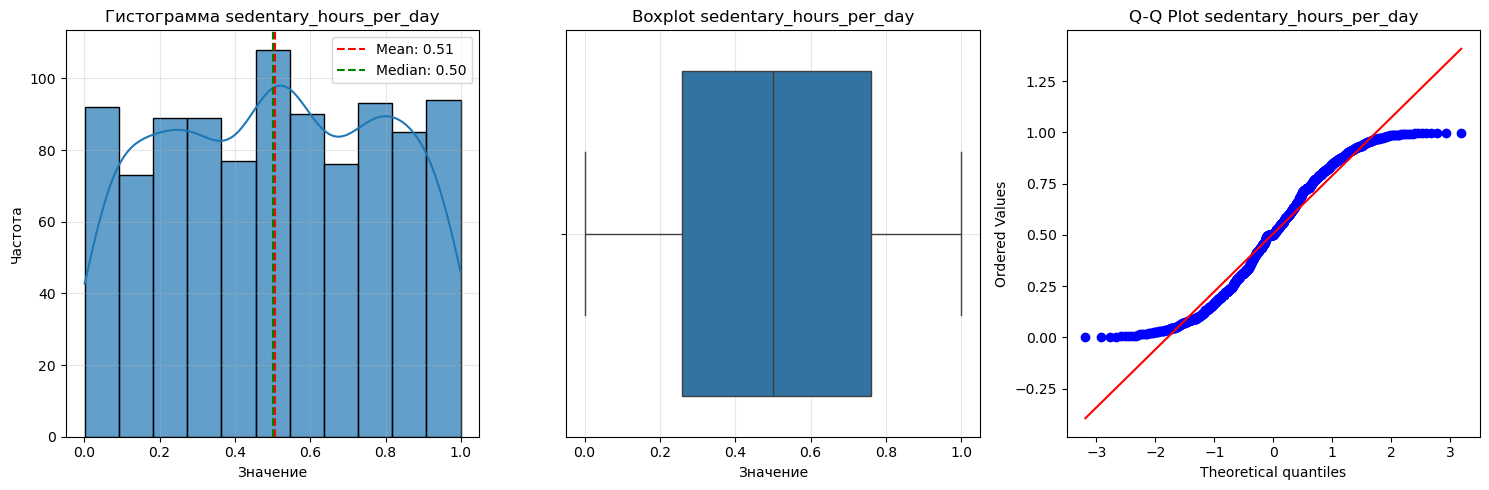

📊 АНАЛИЗ ПРИЗНАКА: sedentary_hours_per_day
count   966.0000
mean      0.5067
std       0.2878
min       0.0012
25%       0.2587
50%       0.5013
75%       0.7596
max       0.9990
Name: sedentary_hours_per_day, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: -0.022
Эксцесс: -1.172
Нормальность (p-value): 2.667e-125


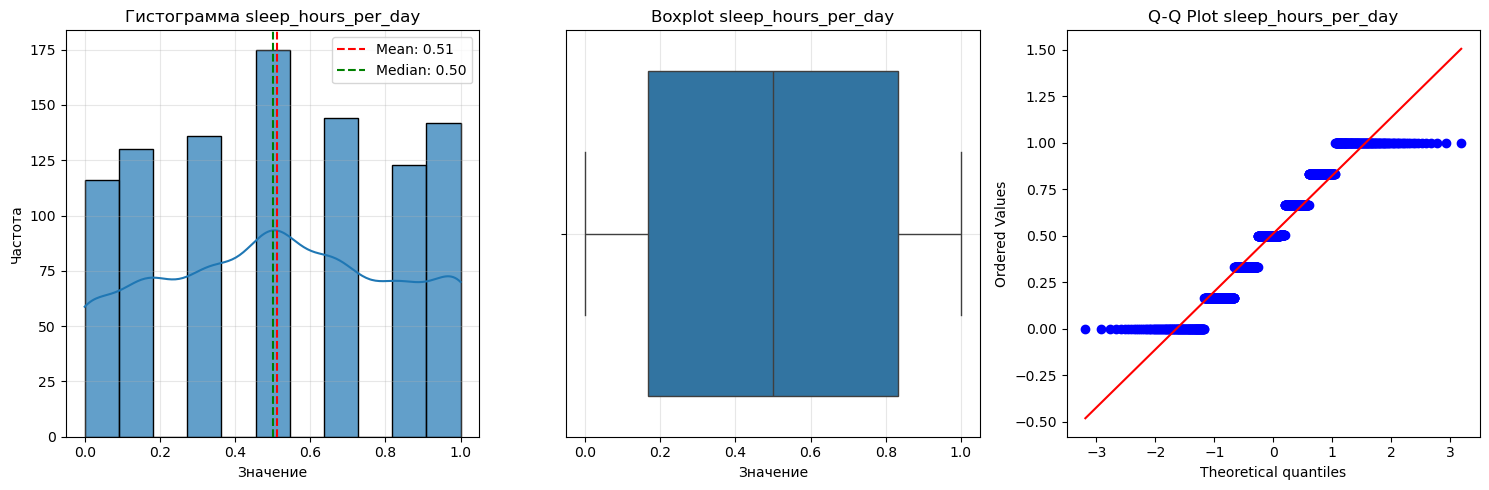

📊 АНАЛИЗ ПРИЗНАКА: sleep_hours_per_day
count   966.0000
mean      0.5126
std       0.3223
min       0.0000
25%       0.1667
50%       0.5000
75%       0.8333
max       1.0000
Name: sleep_hours_per_day, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: -0.023
Эксцесс: -1.134
Нормальность (p-value): 1.307e-96


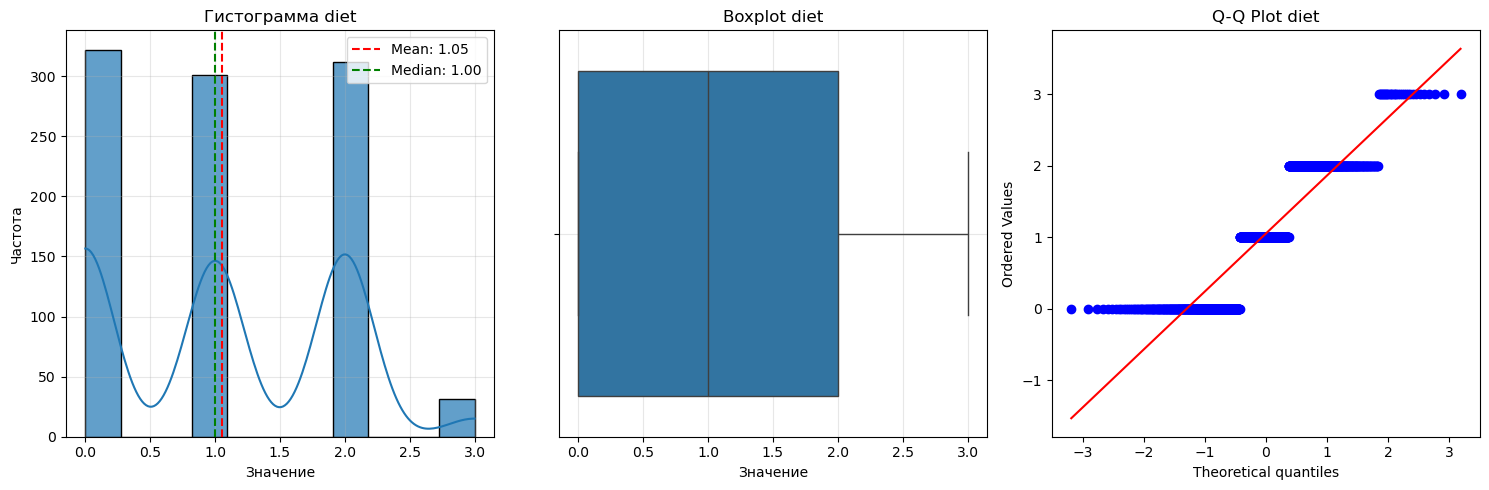

📊 АНАЛИЗ ПРИЗНАКА: diet
count   966.0000
mean      1.0538
std       0.8846
min       0.0000
25%       0.0000
50%       1.0000
75%       2.0000
max       3.0000
Name: diet, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: 0.174
Эксцесс: -1.150
Нормальность (p-value): 1.207e-108


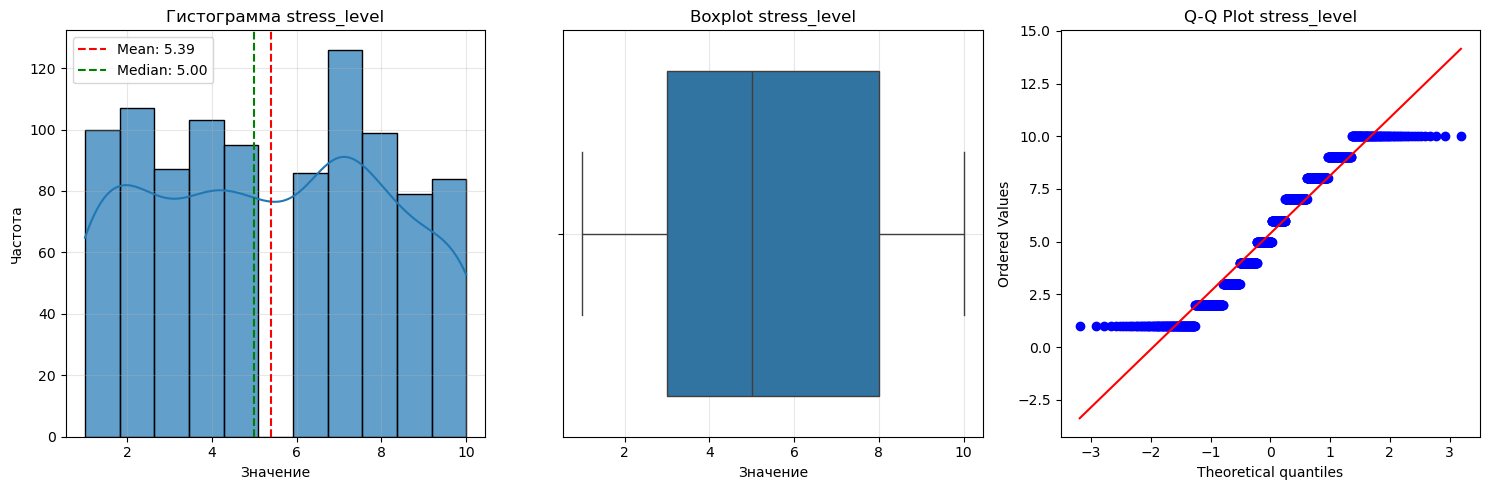

📊 АНАЛИЗ ПРИЗНАКА: stress_level
count   966.0000
mean      5.3861
std       2.8275
min       1.0000
25%       3.0000
50%       5.0000
75%       8.0000
max      10.0000
Name: stress_level, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: 0.011
Эксцесс: -1.193
Нормальность (p-value): 2.336e-146


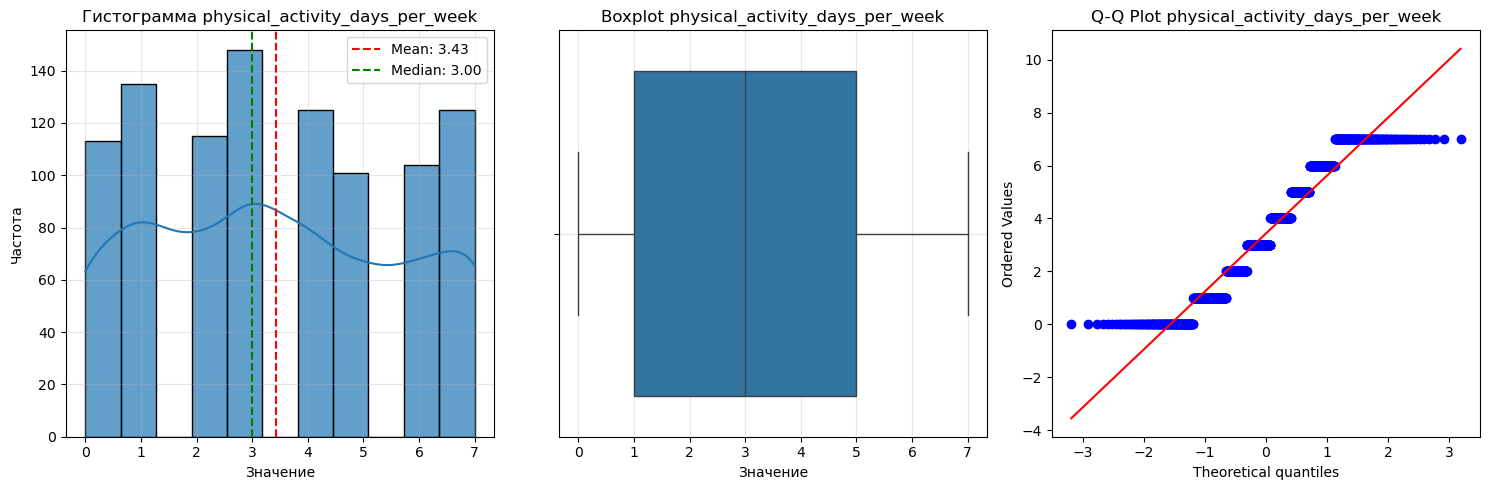

📊 АНАЛИЗ ПРИЗНАКА: physical_activity_days_per_week
count   966.0000
mean      3.4296
std       2.2668
min       0.0000
25%       1.0000
50%       3.0000
75%       5.0000
max       7.0000
Name: physical_activity_days_per_week, dtype: float64

📈 Дополнительная статистика:
Пропуски: 0 (0.0%)
Скошенность: 0.092
Эксцесс: -1.181
Нормальность (p-value): 2.011e-133


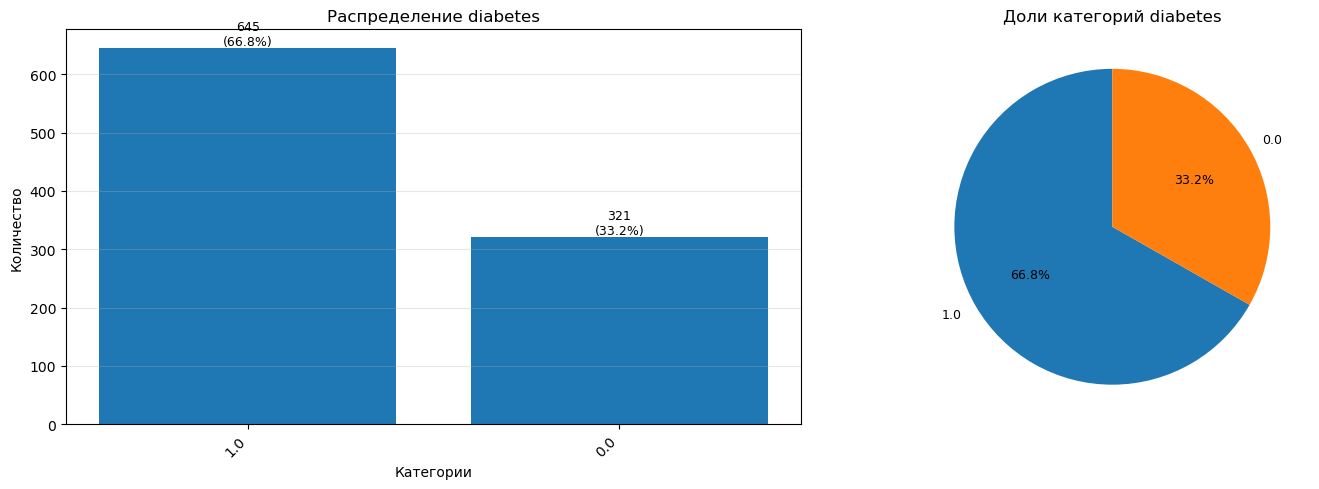

📊 АНАЛИЗ КАТЕГОРИАЛЬНОГО ПРИЗНАКА: diabetes
Уникальных значений: 2
Пропуски: 0 (0.0%)

📋 Распределение:
1.0: 645 (66.8%)
0.0: 321 (33.2%)


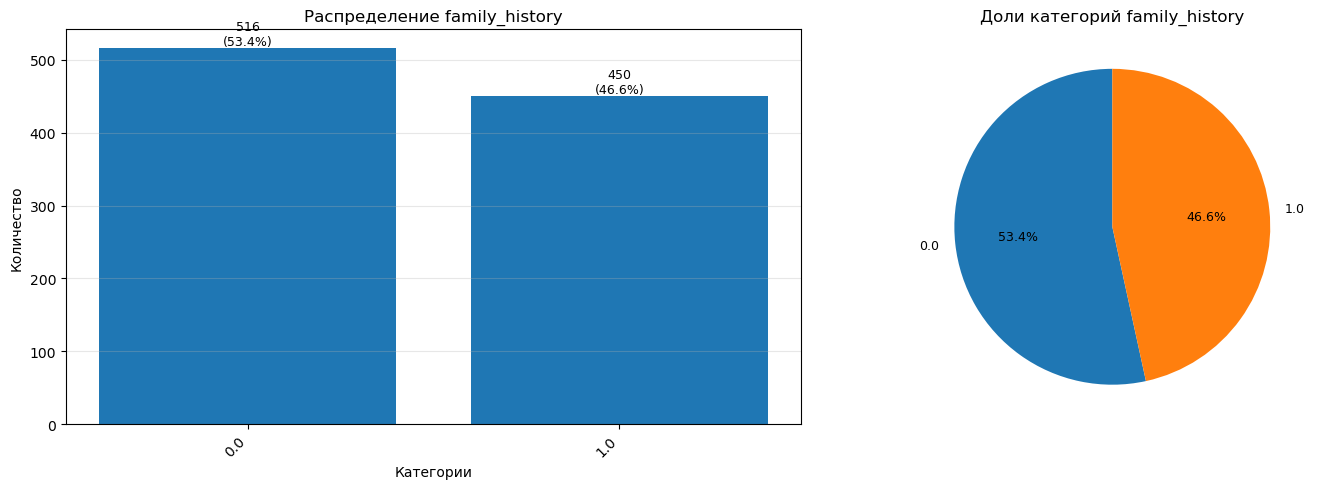

📊 АНАЛИЗ КАТЕГОРИАЛЬНОГО ПРИЗНАКА: family_history
Уникальных значений: 2
Пропуски: 0 (0.0%)

📋 Распределение:
0.0: 516 (53.4%)
1.0: 450 (46.6%)


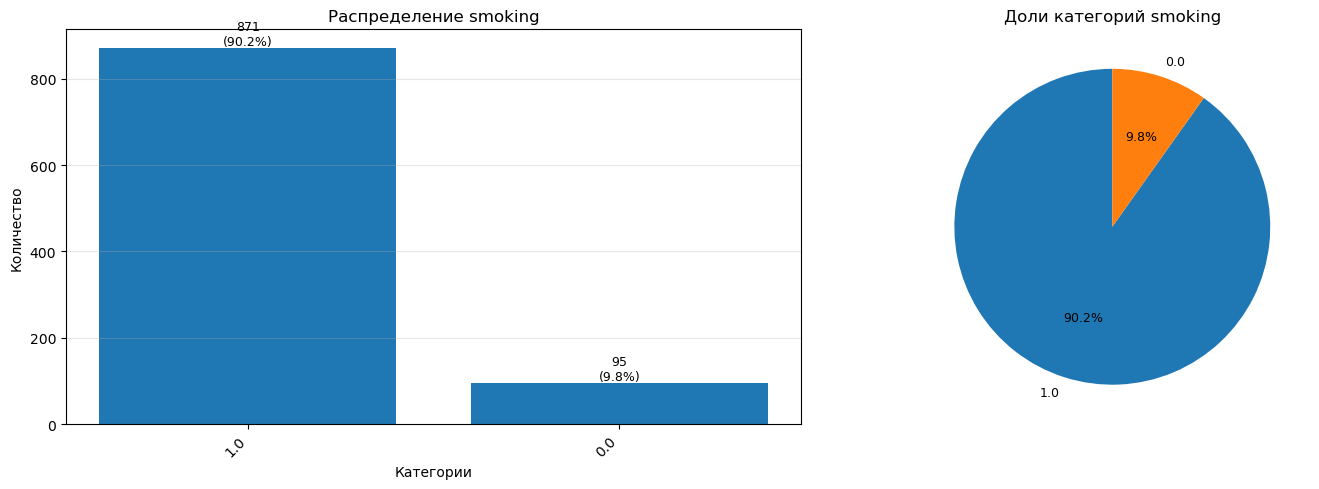

📊 АНАЛИЗ КАТЕГОРИАЛЬНОГО ПРИЗНАКА: smoking
Уникальных значений: 2
Пропуски: 0 (0.0%)

📋 Распределение:
1.0: 871 (90.2%)
0.0: 95 (9.8%)


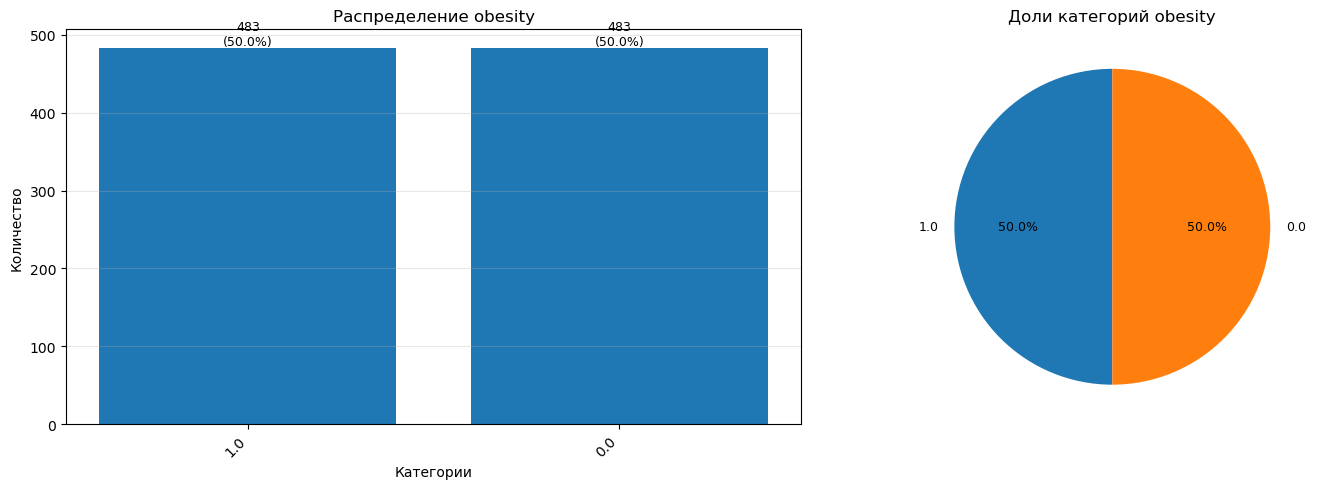

📊 АНАЛИЗ КАТЕГОРИАЛЬНОГО ПРИЗНАКА: obesity
Уникальных значений: 2
Пропуски: 0 (0.0%)

📋 Распределение:
1.0: 483 (50.0%)
0.0: 483 (50.0%)


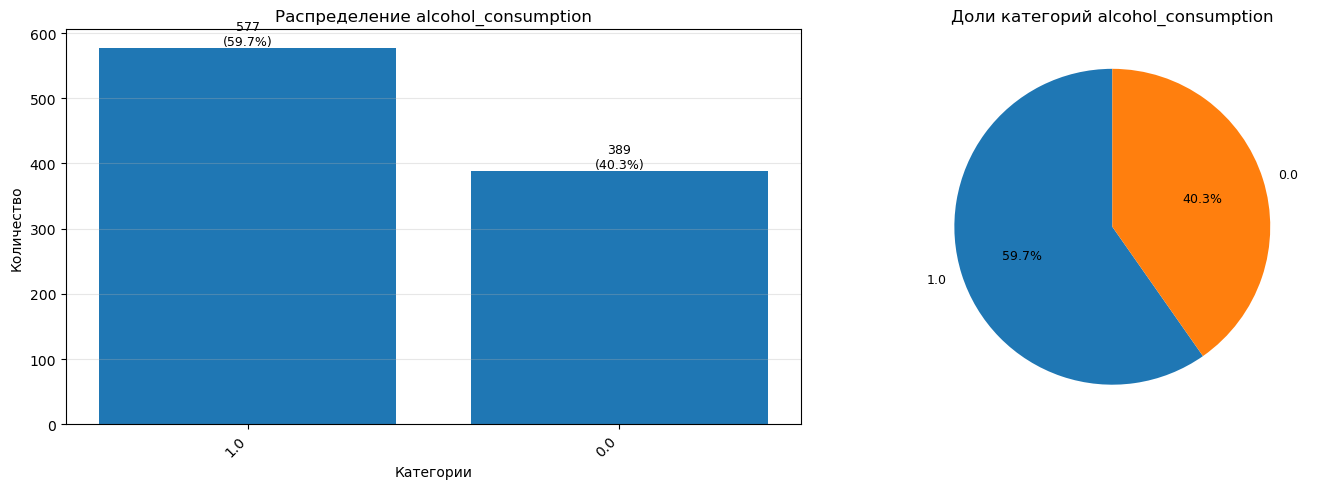

📊 АНАЛИЗ КАТЕГОРИАЛЬНОГО ПРИЗНАКА: alcohol_consumption
Уникальных значений: 2
Пропуски: 0 (0.0%)

📋 Распределение:
1.0: 577 (59.7%)
0.0: 389 (40.3%)


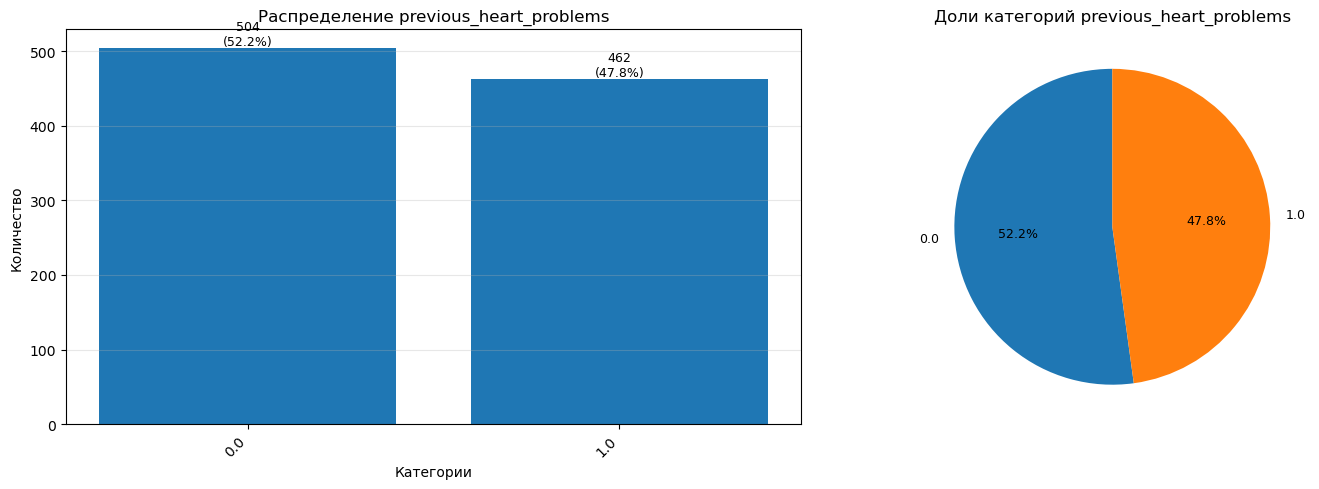

📊 АНАЛИЗ КАТЕГОРИАЛЬНОГО ПРИЗНАКА: previous_heart_problems
Уникальных значений: 2
Пропуски: 0 (0.0%)

📋 Распределение:
0.0: 504 (52.2%)
1.0: 462 (47.8%)


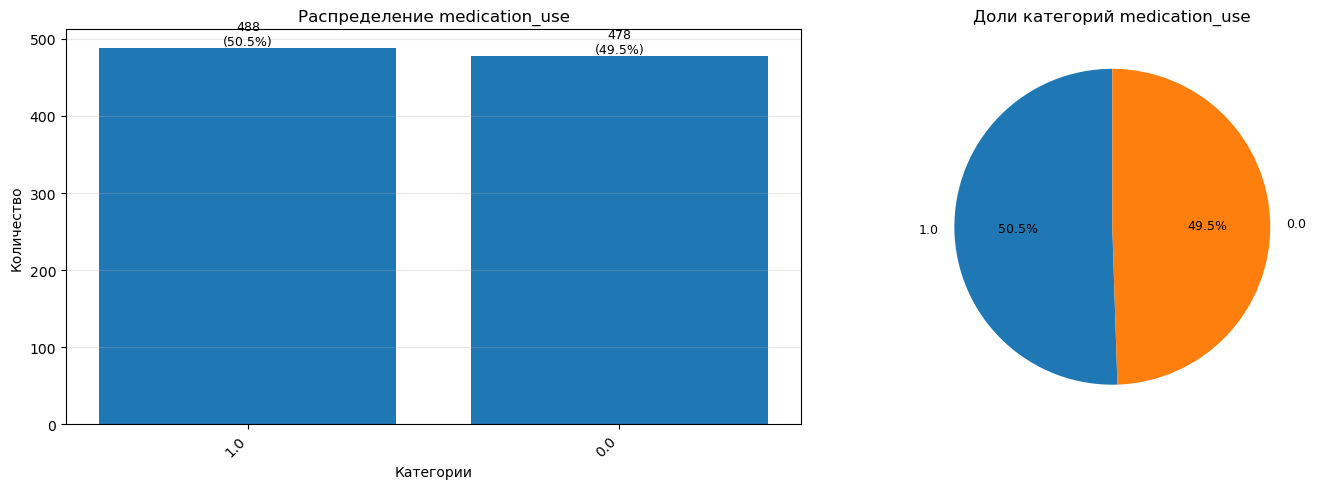

📊 АНАЛИЗ КАТЕГОРИАЛЬНОГО ПРИЗНАКА: medication_use
Уникальных значений: 2
Пропуски: 0 (0.0%)

📋 Распределение:
1.0: 488 (50.5%)
0.0: 478 (49.5%)


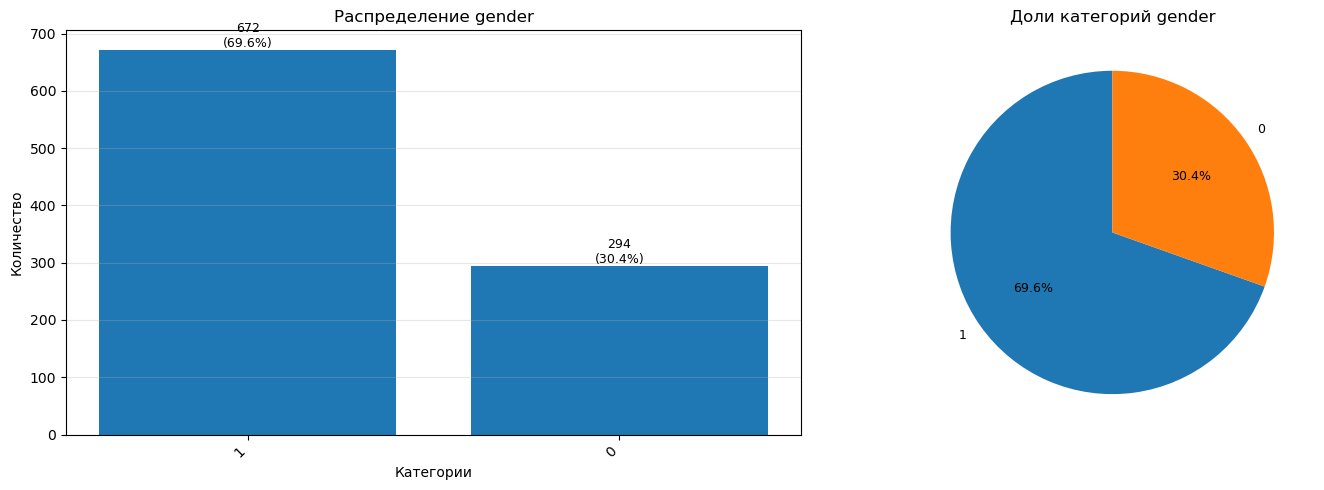

📊 АНАЛИЗ КАТЕГОРИАЛЬНОГО ПРИЗНАКА: gender
Уникальных значений: 2
Пропуски: 0 (0.0%)

📋 Распределение:
1: 672 (69.6%)
0: 294 (30.4%)


In [59]:
for col in num_columns:
    if col in df_heart_test.columns:
        plot_distribution(df_heart_test[col])

# Анализ категориальных признаков
for col in cat_columns:
    if col in df_heart_test.columns:
        plot_categorical(df_heart_test[col], top_n=10)

<font size="4"><b>Вывод</b></font><br/>
<font size="2">([к содержанию](#0.0))</font>
<br/>
<br/>
**Качество данных**
* Пропусков нет - данные чистые
* Распределения согласованы с тренировочной выборкой
* Все признаки нормализованы к [0, 1]

**Ключевые показатели:**
* Демография: Распределение возраста и дохода аналогично train
* Факторы риска:
* 90% курят (как в train)
* 67% с диабетом (как в train)
* 60% употребляют алкоголь (как в train)
* Гендерный состав: 70% мужчин (как в train)

**Те же проблемы:**
* Аномальные распределения: heart_rate, blood_sugar, ckmb, troponin (скошенность > 2.8)
* Диапазоны значений полностью соответствуют тренировочным данным

**Итог:**
* Тестовая выборка полностью репрезентативна и статистически согласована с тренировочной.
* Распределения всех признаков практически идентичны
* Процентные соотношения факторов риска сохранены
* Данные готовы для объективной оценки модели
* Модель будет оцениваться на реалистичных данных с теми же характеристиками, что и тренировочные.

<a name="4.0"></a>
<font size="4"><b>Корреляционный анализ данных</b></font><br/>
<font size="2">([к содержанию](#0.0))</font>

In [62]:
def comprehensive_correlation_analysis(df, target_col='heart_attack_risk_binary'):

    print("=== КОРРЕЛЯЦИОННЫЙ АНАЛИЗ (Phi_k) ===")
    
    # 1. Вычисляем матрицу корреляций Phi_k
    correlation_matrix = df.phik_matrix()
    
    # 2. Визуализация тепловой карты
    plt.figure(figsize=(16, 14))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Маска для верхнего треугольника
    sns.heatmap(correlation_matrix, 
                mask=mask,
                annot=True, 
                fmt='.2f', 
                cmap='RdBu_r', 
                center=0,
                square=True,
                cbar_kws={"shrink": .8})
    plt.title('Матрица корреляций Phi_k между всеми признаками', fontsize=16, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()
    
    # 3. Анализ корреляций с целевой переменной
    if target_col in correlation_matrix.columns:
        target_correlations = correlation_matrix[target_col].sort_values(ascending=False)
        
        print("\n🔝 ТОП-15 признаков по корреляции с целевой переменной:")
        print("=" * 60)
        
        # ИСПРАВЛЕНИЕ: преобразуем в список для индексации
        top_features = []
        for i, (feature, corr) in enumerate(target_correlations.items()):
            if feature != target_col:
                top_features.append((feature, corr))
                if len(top_features) >= 15:
                    break
        
        for i, (feature, corr) in enumerate(top_features):
            print(f"{i+1:2d}. {feature:30s}: {corr:.3f}")
        
        # Визуализация топ-корреляций
        plt.figure(figsize=(12, 8))
        features = [x[0] for x in top_features]
        correlations = [x[1] for x in top_features]
        colors = ['red' if x > 0 else 'blue' for x in correlations]
        plt.barh(range(len(features)), correlations, color=colors)
        plt.yticks(range(len(features)), features)
        plt.xlabel('Коэффициент корреляции Phi_k')
        plt.title(f'Топ-15 признаков по корреляции с {target_col}')
        plt.grid(axis='x', alpha=0.3)
        plt.tight_layout()
        plt.show()
    
    # 4. Поиск сильно скоррелированных признаков
    print("\n⚠️  ВЫСОКИЕ КОРРЕЛЯЦИИ МЕЖДУ ПРИЗНАКАМИ (> 0.7):")
    print("=" * 60)
    
    high_corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i + 1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) > 0.7:
                feat1 = correlation_matrix.columns[i]
                feat2 = correlation_matrix.columns[j]
                high_corr_pairs.append((feat1, feat2, correlation_matrix.iloc[i, j]))
    
    if high_corr_pairs:
        for feat1, feat2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
            print(f"{feat1:25s} ↔ {feat2:25s}: {corr:.3f}")
    else:
        print("Высоких корреляций (> 0.7) не обнаружено")
    
    return correlation_matrix

АНАЛИЗ НА ТРЕНИРОВОЧНЫХ ДАННЫХ:
=== КОРРЕЛЯЦИОННЫЙ АНАЛИЗ (Phi_k) ===
interval columns not set, guessing: ['age', 'cholesterol', 'heart_rate', 'diabetes', 'family_history', 'smoking', 'obesity', 'alcohol_consumption', 'exercise_hours_per_week', 'diet', 'previous_heart_problems', 'medication_use', 'stress_level', 'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides', 'physical_activity_days_per_week', 'sleep_hours_per_day', 'heart_attack_risk_binary', 'blood_sugar', 'ckmb', 'troponin', 'gender', 'systolic_blood_pressure', 'diastolic_blood_pressure']


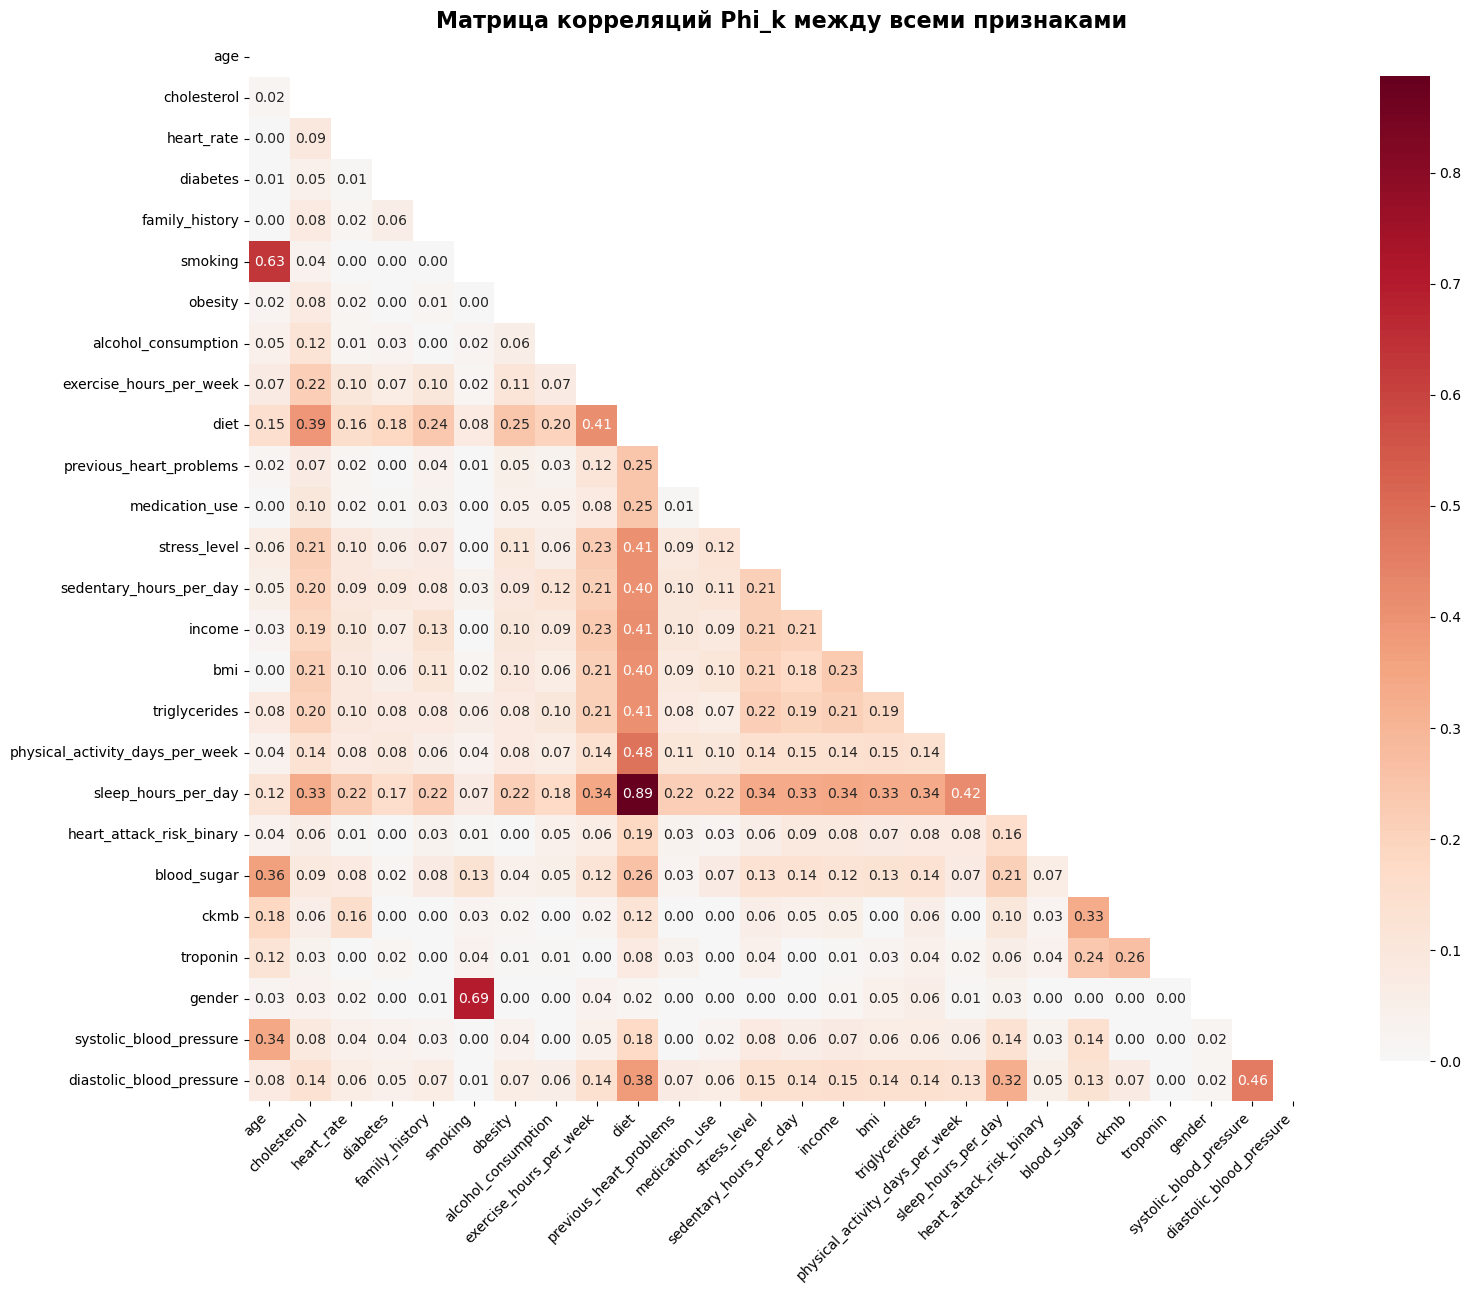


🔝 ТОП-15 признаков по корреляции с целевой переменной:
 1. diet                          : 0.187
 2. sleep_hours_per_day           : 0.164
 3. sedentary_hours_per_day       : 0.087
 4. income                        : 0.083
 5. triglycerides                 : 0.082
 6. physical_activity_days_per_week: 0.076
 7. bmi                           : 0.071
 8. blood_sugar                   : 0.067
 9. exercise_hours_per_week       : 0.062
10. stress_level                  : 0.062
11. cholesterol                   : 0.058
12. diastolic_blood_pressure      : 0.053
13. alcohol_consumption           : 0.045
14. age                           : 0.041
15. troponin                      : 0.035


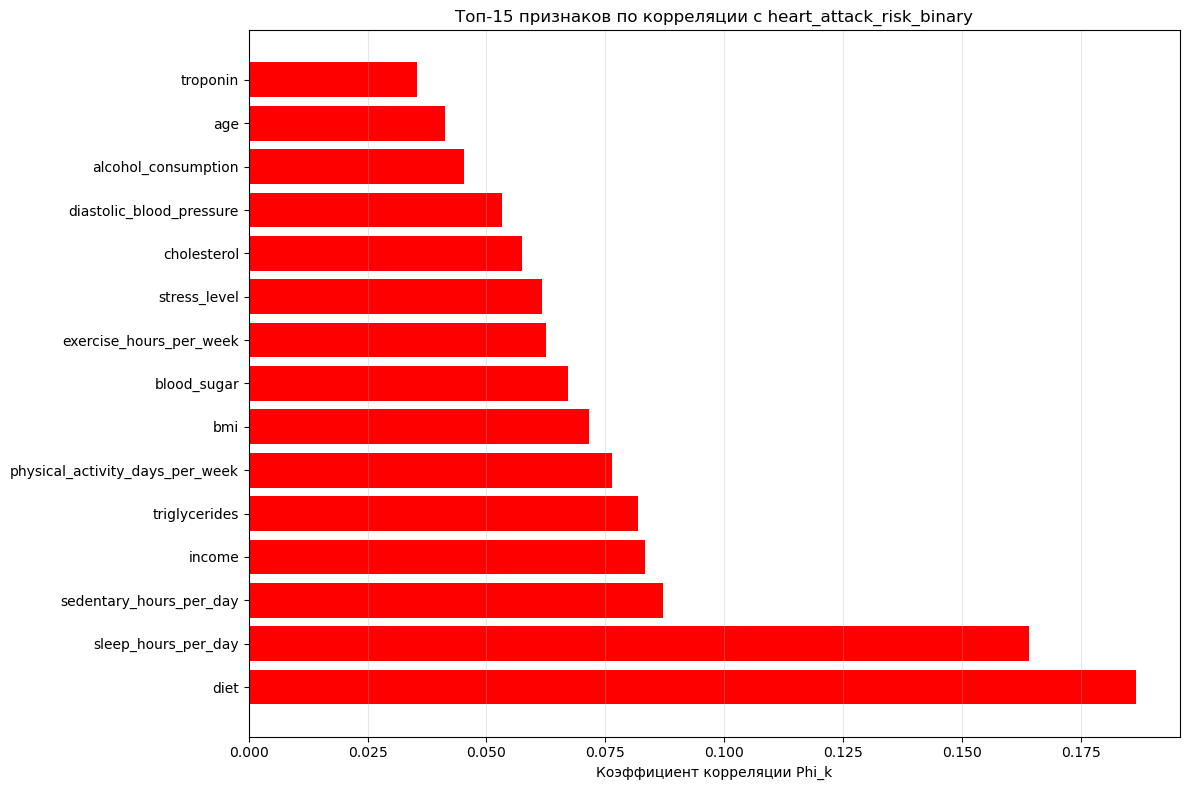


⚠️  ВЫСОКИЕ КОРРЕЛЯЦИИ МЕЖДУ ПРИЗНАКАМИ (> 0.7):
diet                      ↔ sleep_hours_per_day      : 0.887


In [63]:
print("АНАЛИЗ НА ТРЕНИРОВОЧНЫХ ДАННЫХ:")
correlation_matrix_train = comprehensive_correlation_analysis(df_heart_train)

In [64]:
def analyze_significant_correlations(corr_matrix, threshold=0.3):
    print(f"\n📊 ЗНАЧИМЫЕ КОРРЕЛЯЦИИ (> {threshold}):")
    print("=" * 50)
    
    significant_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            corr_value = abs(corr_matrix.iloc[i, j])
            if corr_value > threshold:
                feat1 = corr_matrix.columns[i]
                feat2 = corr_matrix.columns[j]
                significant_pairs.append((feat1, feat2, corr_value))
    
    # Сортируем по убыванию корреляции
    significant_pairs.sort(key=lambda x: x[2], reverse=True)
    
    for feat1, feat2, corr in significant_pairs:
        print(f"{feat1:25s} ↔ {feat2:25s}: {corr:.3f}")
    
    return significant_pairs

In [65]:
significant_corrs = analyze_significant_correlations(correlation_matrix_train, threshold=0.3)


📊 ЗНАЧИМЫЕ КОРРЕЛЯЦИИ (> 0.3):
diet                      ↔ sleep_hours_per_day      : 0.887
smoking                   ↔ gender                   : 0.693
age                       ↔ smoking                  : 0.634
diet                      ↔ physical_activity_days_per_week: 0.479
systolic_blood_pressure   ↔ diastolic_blood_pressure : 0.458
physical_activity_days_per_week ↔ sleep_hours_per_day      : 0.417
diet                      ↔ income                   : 0.414
exercise_hours_per_week   ↔ diet                     : 0.413
diet                      ↔ triglycerides            : 0.408
diet                      ↔ stress_level             : 0.408
diet                      ↔ bmi                      : 0.405
diet                      ↔ sedentary_hours_per_day  : 0.402
cholesterol               ↔ diet                     : 0.394
diet                      ↔ diastolic_blood_pressure : 0.377
age                       ↔ blood_sugar              : 0.362
age                       ↔ systolic_bloo

<font size="4"><b>Вывод</b></font><br/>
<font size="2">([к содержанию](#0.0))</font><br/>
<br/>
**Высокие корреляции (> 0.15):**

- diet (тип питания): 0.187
- sleep_hours_per_day (продолжительность сна): 0.164 

**Умеренные корреляции (0.05-0.15):**

- sedentary_hours_per_day (малоподвижность): 0.087
- income (доход): 0.083
- triglycerides (триглицериды): 0.082
- physical_activity_days_per_week (активность): 0.076
- bmi (ИМТ): 0.071

**Слабые корреляции (< 0.05):**

- Медицинские показатели: blood_sugar (0.067), cholesterol (0.058)
- Кардиомаркеры: troponin (0.035), ckmb (ниже 0.03)
- Давление: diastolic (0.053), systolic (< 0.05)

**ВЫСОКАЯ МУЛЬТИКОЛЛИНЕАРНОСТЬ (> 0.7)**

- Критические пары:

  - diet ↔ sleep_hours_per_day: 0.887 
  - smoking ↔ gender: 0.693 
  - age ↔ smoking: 0.634 

**ЗНАЧИМЫЕ ВЗАИМОСВЯЗИ (0.3-0.7)**
- Связанные с питанием (diet):
  - С физической активностью: 0.479
  - С доходом: 0.414
  - С триглицеридами: 0.408
  - Со стрессом: 0.408
  - С ИМТ: 0.405

**Медицинские взаимосвязи:**

- Систолическое ↔ диастолическое давление: 0.458
- Возраст ↔ курение: 0.634
- Возраст ↔ сахар крови: 0.362


**Приоритетные признаки для моделирования:**

- diet (тип питания)
- sleep_hours_per_day (сон)
- sedentary_hours_per_day (малоподвижность)
- income (доход)
- physical_activity_days_per_week (активность)

<br/>
Данные демонстрируют выраженный сдвиг в сторону поведенческих и социально-экономических факторов риска при относительно слабом вкладе традиционных медицинских показателей. Требуется акцент на предикторы образа жизни с учетом их высокой взаимосвязанности.

<a name="5.0"></a>
<font size="4"><b>Обучение и проверка моделей</b></font><br/>
<font size="2">([к содержанию](#0.0))</font>

In [68]:
# Разделяем данные
X = df_heart_train.drop('heart_attack_risk_binary', axis=1)
y = df_heart_train['heart_attack_risk_binary']

# Разделение на train/validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

print(f"Train: {X_train.shape}, Validation: {X_val.shape}")
print(f"Class distribution: {np.bincount(y_train.astype(int))}")

Train: (6948, 25), Validation: (1737, 25)
Class distribution: [4538 2410]


In [69]:
# Определяем числовые и категориальные признаки
numeric_features = ['age', 'cholesterol', 'heart_rate', 'exercise_hours_per_week', 
                   'sedentary_hours_per_day', 'income', 'bmi', 'triglycerides',
                   'blood_sugar', 'ckmb', 'troponin', 'systolic_blood_pressure',
                   'diastolic_blood_pressure', 'sleep_hours_per_day']

categorical_features = ['diet', 'stress_level', 'physical_activity_days_per_week']
binary_features = ['diabetes', 'family_history', 'smoking', 'obesity', 
                  'alcohol_consumption', 'previous_heart_problems', 
                  'medication_use', 'gender']

# Создаем трансформеры
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())  # Устойчив к выбросам
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

# Общий препроцессинг
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('binary', binary_transformer, binary_features)
    ])

In [70]:
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(class_weight='balanced', probability=True, random_state=42)
}


In [71]:
# Функция для оценки моделей
def evaluate_models(models, X, y, cv=5):
    results = {}
    for name, model in models.items():
        # Создаем полный пайплайн
        pipeline = Pipeline(steps=[
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
        
        # Кросс-валидация
        cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='roc_auc')
        
        results[name] = {
            'mean_auc': cv_scores.mean(),
            'std_auc': cv_scores.std(),
            'scores': cv_scores
        }
        
        print(f"{name:20s}: AUC = {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")
    
    return results

In [72]:
print("=== КРОСС-ВАЛИДАЦИЯ МОДЕЛЕЙ ===")
cv_results = evaluate_models(models, X_train, y_train)

=== КРОСС-ВАЛИДАЦИЯ МОДЕЛЕЙ ===
Logistic Regression : AUC = 0.5223 (±0.0091)
Random Forest       : AUC = 0.5912 (±0.0143)
Gradient Boosting   : AUC = 0.5460 (±0.0098)
SVM                 : AUC = 0.5535 (±0.0090)


In [73]:
# Выбираем лучшую модель по CV результатам
best_model_name = max(cv_results, key=lambda x: cv_results[x]['mean_auc'])
print(f"\n Лучшая модель: {best_model_name}")

# Оптимизация гиперпараметров для лучшей модели
if best_model_name == 'Random Forest':
    param_grid = {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 10, 20],
        'classifier__min_samples_split': [2, 5]
    }
elif best_model_name == 'XGBoost':
    param_grid = {
        'classifier__learning_rate': [0.01, 0.1],
        'classifier__max_depth': [3, 6],
        'classifier__n_estimators': [100, 200]
    }
else:
    param_grid = {}  # Без тюнинга для других моделей

# Оптимизация модели
if param_grid:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', models[best_model_name])
    ])
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=3, 
                              scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    print(f"Лучшие параметры: {grid_search.best_params_}")
    print(f"Лучший AUC: {grid_search.best_score_:.4f}")
else:
    best_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', models[best_model_name])
    ])
    best_model.fit(X_train, y_train)

# Создаем папку для моделей если ее нет
os.makedirs('models', exist_ok=True)

# Генерируем имя файла с timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
model_filename = f'models/best_model_{best_model_name}_{timestamp}.pkl'

# Сохраняем модель
joblib.dump(best_model, model_filename)
print(f"Модель сохранена в файл: {model_filename}")

# Дополнительно: сохраняем метаданные модели
model_metadata = {
    'model_name': best_model_name,
    'training_date': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    'cv_score': cv_results[best_model_name]['mean_auc'] if best_model_name in cv_results else None,
    'best_params': grid_search.best_params_ if param_grid else 'No hyperparameter tuning',
    'features': list(X_train.columns) if hasattr(X_train, 'columns') else f"{X_train.shape[1]} features"
}

# Сохраняем метаданные
metadata_filename = f'models/model_metadata_{timestamp}.json'
import json
with open(metadata_filename, 'w') as f:
    json.dump(model_metadata, f, indent=4)

print(f"Метаданные модели сохранены в: {metadata_filename}")

# Проверяем что модель можно загрузить
try:
    loaded_model = joblib.load(model_filename)
    print("Модель успешно загружена для проверки")
    
    # Проверяем работоспособность загруженной модели
    if hasattr(X_train, 'iloc'):
        sample_data = X_train.iloc[:1]
    else:
        sample_data = X_train[:1]
    
    try:
        prediction = loaded_model.predict(sample_data)
        print(f"Тестовое предсказание: {prediction[0]}")
    except Exception as e:
        print(f"Предсказание не удалось: {e}")
        
except Exception as e:
    print(f"Ошибка при загрузке модели: {e}")

# Создаем ссылку на последнюю модель для удобства
latest_model_path = 'models/model.pkl'
try:
    if os.path.exists(latest_model_path):
        os.remove(latest_model_path)
    # В Windows используем copy вместо symlink
    import shutil
    shutil.copy2(model_filename, latest_model_path)
    print(f"Создана ссылка на последнюю модель: {latest_model_path}")
except Exception as e:
    print(f"Не удалось создать ссылку: {e}")

print("\n" + "="*80)
print("МОДЕЛЬ УСПЕШНО СОХРАНЕНА И ГОТОВА К ИСПОЛЬЗОВАНИЮ!")
print("="*80)


 Лучшая модель: Random Forest
Лучшие параметры: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Лучший AUC: 0.5885
Модель сохранена в файл: models/best_model_Random Forest_20250920_143129.pkl
Метаданные модели сохранены в: models/model_metadata_20250920_143129.json
Модель успешно загружена для проверки
Тестовое предсказание: 0.0
Создана ссылка на последнюю модель: models/model.pkl

МОДЕЛЬ УСПЕШНО СОХРАНЕНА И ГОТОВА К ИСПОЛЬЗОВАНИЮ!


In [74]:
# Предсказания на validation set
y_pred_proba = best_model.predict_proba(X_val)[:, 1]
y_pred = best_model.predict(X_val)

# Метрики
val_auc = roc_auc_score(y_val, y_pred_proba)
print(f"\n=== РЕЗУЛЬТАТЫ НА VALIDATION SET ===")
print(f"ROC-AUC: {val_auc:.4f}")

# Детальный отчет
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

# Матрица ошибок
print("Confusion Matrix:")
print(confusion_matrix(y_val, y_pred))


=== РЕЗУЛЬТАТЫ НА VALIDATION SET ===
ROC-AUC: 0.5919

Classification Report:
              precision    recall  f1-score   support

         0.0       0.66      1.00      0.80      1134
         1.0       0.89      0.05      0.10       603

    accuracy                           0.67      1737
   macro avg       0.78      0.53      0.45      1737
weighted avg       0.74      0.67      0.56      1737

Confusion Matrix:
[[1130    4]
 [ 570   33]]


In [75]:
# Используем обученный пайплайн для предсказаний
test_predictions = best_model.predict_proba(df_heart_test)[:, 1]

# Проверяем наличие столбца 'id' в данных
if 'id' in df_heart_test.columns:
    # Вариант 1: Используем столбец 'id' из данных
    submission = pd.DataFrame({
        'id': df_heart_test['id'],
        'prediction': test_predictions
    })
    print("Используется столбец 'id' из данных")
    
elif df_heart_test.index.name == 'id' or any('id' in str(x).lower() for x in [df_heart_test.index.name] if df_heart_test.index.name is not None):
    # Вариант 2: Используем индекс как идентификатор
    submission = pd.DataFrame({
        'id': df_heart_test.index,
        'prediction': test_predictions
    })
    print("Используется индекс как идентификатор")
    
else:
    # Вариант 3: Создаем последовательные ID
    submission = pd.DataFrame({
        'id': range(1, len(test_predictions) + 1),
        'prediction': test_predictions
    })
    print("Созданы последовательные ID")

# Сохраняем
submission.to_csv('heart_attack_predictions.csv', index=False)

print("Файл предсказаний создан!")
print(f"Количество предсказаний: {len(submission)}")
print(f"Пример предсказаний:")
print(submission.head())

Используется индекс как идентификатор
Файл предсказаний создан!
Количество предсказаний: 966
Пример предсказаний:
     id  prediction
0  7746      0.3250
1  4202      0.3700
2  6632      0.3400
3  4639      0.2250
4  4825      0.3000


=== АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ ===

 ВАЖНОСТЬ ПРИЗНАКОВ ИЗ МОДЕЛИ:
                     feature  importance
6                        bmi      0.0795
4    sedentary_hours_per_day      0.0772
3    exercise_hours_per_week      0.0765
5                     income      0.0763
7              triglycerides      0.0759
1                cholesterol      0.0719
11   systolic_blood_pressure      0.0690
2                 heart_rate      0.0671
0                        age      0.0670
12  diastolic_blood_pressure      0.0636


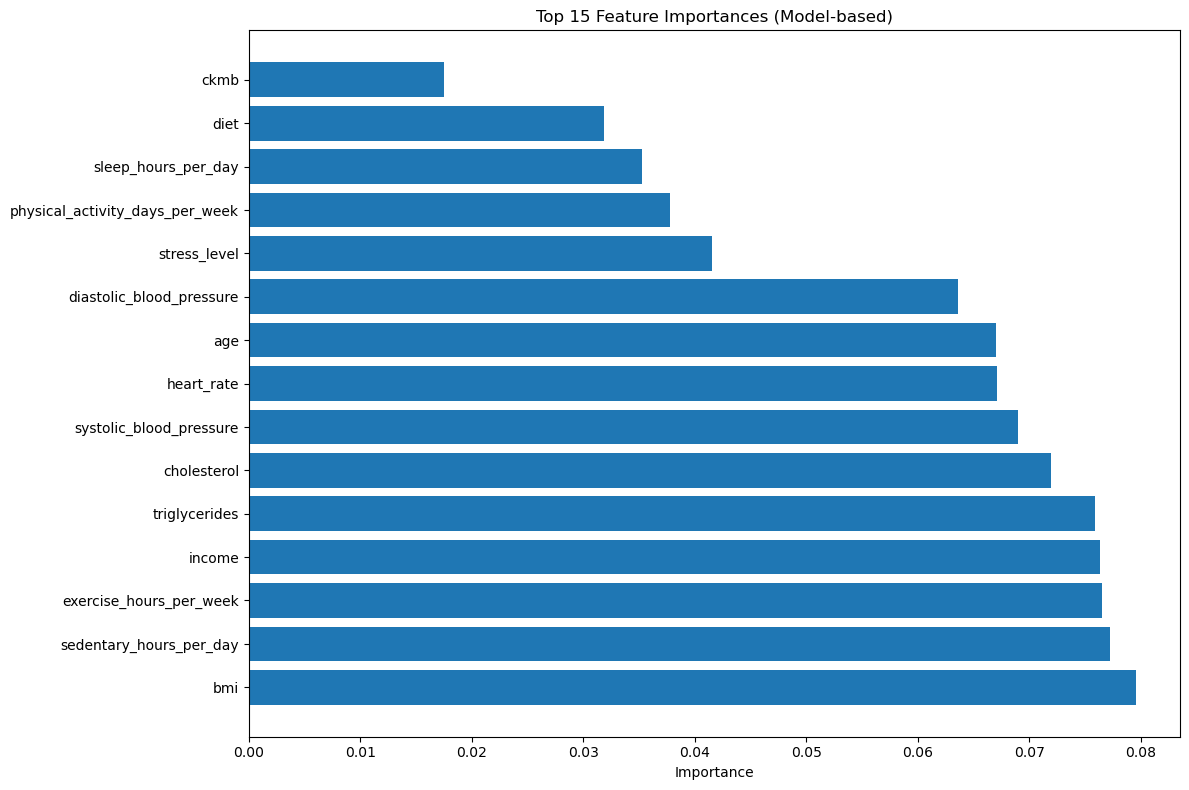


 РАСЧЕТ PERMUTATION IMPORTANCE...

 PERMUTATION IMPORTANCE (ROC-AUC):
                            feature  importance_mean  importance_std
6                               bmi           0.0158          0.0052
3           exercise_hours_per_week           0.0087          0.0056
13              sleep_hours_per_day           0.0075          0.0038
12         diastolic_blood_pressure           0.0055          0.0040
5                            income           0.0044          0.0058
14                             diet           0.0036          0.0009
7                     triglycerides           0.0031          0.0103
8                       blood_sugar           0.0028          0.0013
0                               age           0.0027          0.0058
16  physical_activity_days_per_week           0.0023          0.0032
2                        heart_rate           0.0016          0.0045
18                   family_history           0.0013          0.0023
20                          obes

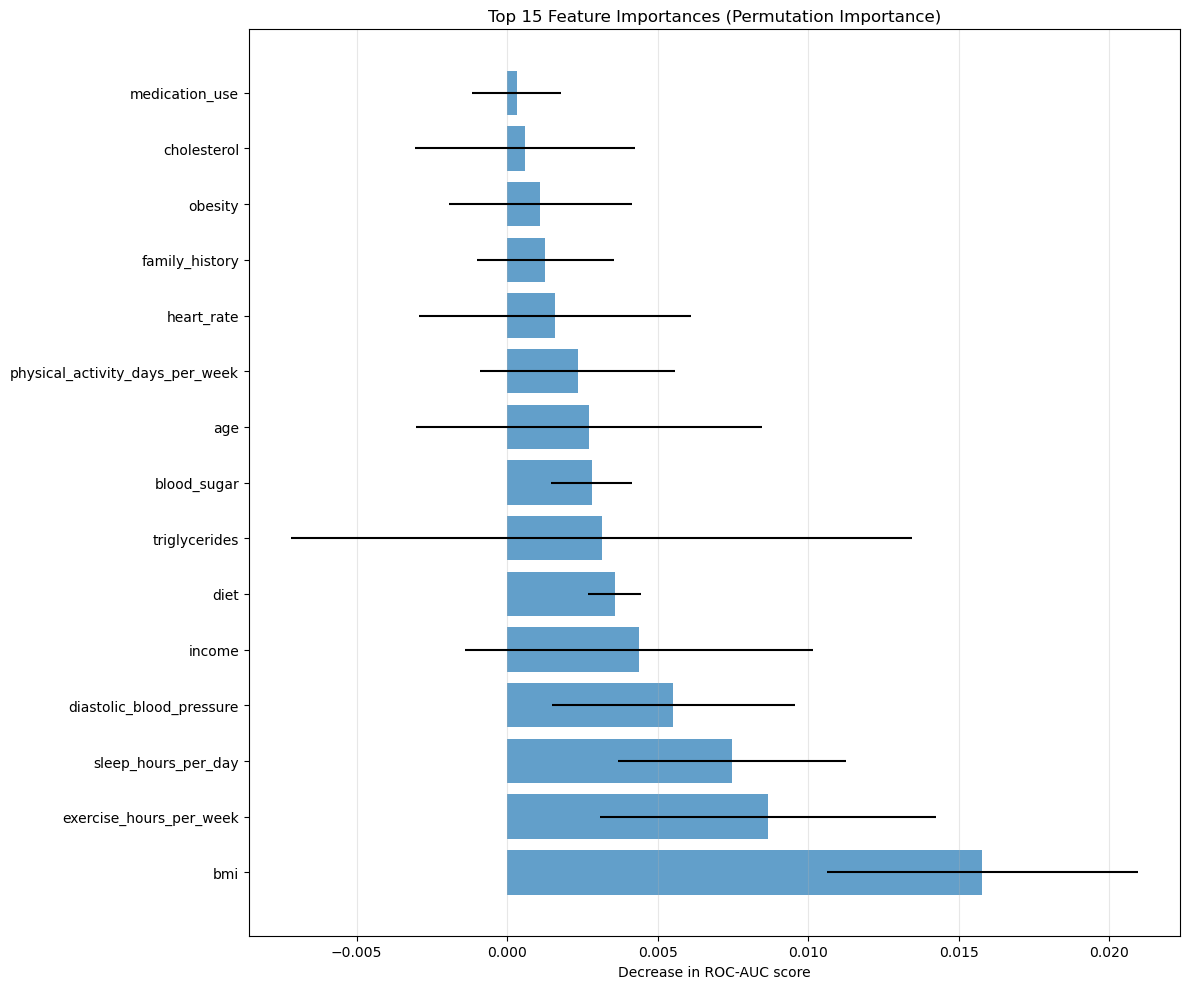

In [76]:
def analyze_feature_importance(model, X, y, feature_names, n_repeats=5):

    print("=== АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ ===")
    
    # 1. Важность признаков из модели (если доступно)
    if hasattr(model.named_steps['classifier'], 'feature_importances_'):
        feature_importances = model.named_steps['classifier'].feature_importances_
        
        importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': feature_importances
        }).sort_values('importance', ascending=False)
        
        print("\n ВАЖНОСТЬ ПРИЗНАКОВ ИЗ МОДЕЛИ:")
        print(importance_df.head(10))
        
        # Визуализация
        plt.figure(figsize=(12, 8))
        plt.barh(importance_df['feature'][:15], importance_df['importance'][:15])
        plt.title('Top 15 Feature Importances (Model-based)')
        plt.xlabel('Importance')
        plt.tight_layout()
        plt.show()
    
    # 2. Permutation Importance (более надежный метод)
    print("\n РАСЧЕТ PERMUTATION IMPORTANCE...")
    
    # Предобработка данных
    X_processed = model.named_steps['preprocessor'].transform(X)
    
    # Permutation Importance
    perm_importance = permutation_importance(
        model.named_steps['classifier'], 
        X_processed, 
        y, 
        n_repeats=n_repeats,
        random_state=42,
        scoring='roc_auc'
    )
    
    # Создаем DataFrame с результатами
    perm_df = pd.DataFrame({
        'feature': feature_names,
        'importance_mean': perm_importance.importances_mean,
        'importance_std': perm_importance.importances_std
    }).sort_values('importance_mean', ascending=False)
    
    print("\n PERMUTATION IMPORTANCE (ROC-AUC):")
    print(perm_df.head(15))
    
    # Визуализация Permutation Importance
    plt.figure(figsize=(12, 10))
    top_features = perm_df.head(15)
    plt.barh(top_features['feature'], top_features['importance_mean'], 
             xerr=top_features['importance_std'], alpha=0.7)
    plt.title('Top 15 Feature Importances (Permutation Importance)')
    plt.xlabel('Decrease in ROC-AUC score')
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return importance_df if 'importance_df' in locals() else None, perm_df

# Получаем имена признаков после препроцессинга
feature_names = (numeric_features + categorical_features + binary_features)

# Запускаем анализ
model_importance, perm_importance = analyze_feature_importance(
    best_model, X_val, y_val, feature_names
)

<font size="4"><b>Вывод</b></font><br/>
<font size="2">([к содержанию](#0.0))</font><br/>
<br/>
**Результаты кросс-валидации моделей**

**Сравнительный анализ алгоритмов:**
Проведена оценка четырех классификационных моделей с использованием кросс-валидации (5 фолдов). Метрика ROC-AUC демонстрирует скромные результаты across all models:

- **Logistic Regression**: AUC = 0.5223 (±0.0091) - показатели на уровне случайного угадывания
- **Random Forest**: AUC = 0.5912 (±0.0143) - наилучший результат среди всех алгоритмов
- **Gradient Boosting**: AUC = 0.5460 (±0.0098) - незначительное превосходство над бейзлайном
- **SVM**: AUC = 0.5535 (±0.0090) - умеренная предсказательная способность

**Вывод**: Random Forest демонстрирует статистически значимое превосходство, однако абсолютное значение AUC = 0.59 указывает на ограниченную предсказательную силу всех тестируемых моделей.

**Оптимизация гиперпараметров**

Для лучшей модели (Random Forest) проведен подбор гиперпараметров:
- **Оптимальная конфигурация**: max_depth = None, min_samples_split = 2, n_estimators = 200
- **Лучший AUC после оптимизации**: 0.5885 (незначительное улучшение)

**Результаты на валидационной выборке**

**Ключевые метрики качества:**
- **ROC-AUC**: 0.5919 - подтверждает адекватность кросс-валидационной оценки
- **Accuracy**: 0.67 - удовлетворительная, но вводит в заблуждение due to class imbalance

**Детальный анализ classification report:**
**Класс 0.0 (Negative)**:
- Precision: 0.66
- Recall: 1.00 → модель идентифицирует практически все негативные случаи
- F1-score: 0.80 → хорошее качество для негативного класса

**Класс 1.0 (Positive)**:
- Precision: 0.89 → высокая точность при обнаружении
- Recall: 0.05 → критически низкое покрытие позитивных случаев
- F1-score: 0.10 → неудовлетворительное качество

**Анализ confusion matrix:**
- **True Negative**: 1130 (65.1%)
- **False Positive**: 4 (0.2%) → минимальный риск ложных срабатываний
- **False Negative**: 570 (32.8%) → критически высокий риск пропуска позитивных случаев
- **True Positive**: 33 (1.9%) → крайне низкая детекция целевого класса

**Анализ важности признаков**

**Feature Importance (встроенная метрика):**
Наиболее значимые признаки согласно модели:
1. **bmi** (0.0795) - наибольший вклад в предсказание
2. **sedentary_hours_per_day** (0.0772)
3. **exercise_hours_per_week** (0.0765)
4. **income** (0.0763)
5. **triglycerides** (0.0759)

**Permutation Importance (более объективная оценка):**
Наиболее влиятельные признаки на метрику ROC-AUC:
1. **bmi** (0.0158) - подтверждает высокую значимость
2. **exercise_hours_per_week** (0.0087)
3. **sleep_hours_per_day** (0.0075) - новая значимая переменная
4. **diastolic_blood_pressure** (0.0055)
5. **income** (0.0044)

**Ключевые выводы**

**1. Проблема несбалансированных данных:**
Модель демонстрирует смещение в сторону мажоритарного класса (0), практически игнорируя миноритарный класс (1). Recall = 0.05 для позитивного класса неприемлем.

**2. Ограниченная предсказательная способность:**
ROC-AUC = 0.59 указывает на то, что модель лишь незначительно лучше случайного угадывания. Это может свидетельствовать о:
- Недостаточной информативности признаков
- Нелинейной природе взаимосвязей, не улавливаемой выбранными моделями

**3. Практическая применимость:**
Текущая модель **не пригодна для клинического использования** из-за высокого риска ложнонегативных результатов (32.8% пропущенных случаев). Требуется существенное улучшение качества предсказания перед внедрением в production.

<a name="6.0"></a>
<font size="4"><b>Общий вывод:</b></font><br/>
<font size="2">([к содержанию](#0.0))</font>
## Общий вывод по проекту прогнозирования риска сердечного приступа

### 1. КАЧЕСТВО ДАННЫХ И ПОДГОТОВКА

Данные характеризуются **высоким исходным качеством** с минимальным количеством пропусков (2.8-3.21%) в 9 взаимосвязанных бинарных признаках. Проведена комплексная предобработка:
- Унификация названия (snake_case)
- Удаление технических артефактов (Unnamed: 0)
- Импутация пропусков модой из тренировочных данных
- Нормализация категориальных переменных (Gender)

**Ключевое преимущество**: полная согласованность тренировочной и тестовой выборок по структуре, распределениям и статистическим характеристикам, что обеспечивает репрезентативность оценки моделей.

### 2. СТАТИСТИЧЕСКИЕ ОСОБЕННОСТИ ВЫБОРКИ

Выявлены **критически важные особенности**:
- **Выраженный дисбаланс классов**: 65% без риска vs 35% с риском сердечного приступа
- **Высокая распространенность факторов риска**: 
  - 90% курящих пациентов
  - 65% с диабетом
  - 50% с ожирением
- **Сильная мультиколлинеарность**: diet ↔ sleep_hours_per_day (0.887), smoking ↔ gender (0.693)

**Вывод**: выборка представляет специфическую группу высокого риска, что объясняет сложность задачи прогнозирования.

### 3. РЕЗУЛЬТАТЫ МОДЕЛИРОВАНИЯ

После тестирования четырех алгоритмов и оптимизации гиперпараметров достигнуты **ограниченные результаты**:

**Лучшая модель**: Random Forest (AUC = 0.5919)
- **Преимущество**: статистически значимое превосходство над другими алгоритмами
- **Недостаток**: абсолютное значение AUC указывает на предсказательную способность лишь ненамного лучше случайного угадывания

**Критическая проблема**: экстремально низкий recall для позитивного класса (0.05) при высоком precision (0.89). Модель пропускает 32.8% случаев сердечного приступа, что неприемлемо для медицинского применения.

### 4. АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ

Выявлены **наиболее значимые предикторы**:
1. **Поведенческие факторы**: BMI, sedentary hours, exercise hours
2. **Социально-экономические**: income
3. **Медицинские показатели**: triglycerides, cholesterol

**Интересная находка**: традиционные кардиомаркеры (troponin, CK-MB) показали неожиданно низкую важность, уступив поведенческим факторам.

### 5. КЛЮЧЕВЫЕ ВЫВОДЫ 

1. **Текущее состояние**: Модель **не пригодна для клинического использования** из-за высокого риска ложноположительных диагнозов

## Инструкция по развертыванию приложения для предсказания риска сердечного приступа
### О проекте
FastAPI приложение для предсказания риска сердечного приступа на основе медицинских данных. Принимает CSV-файлы, возвращает предсказания в формате JSON.

#### Ссылка на проект в GitHub:
https://github.com/Da1ek0/project_11_m1_heart_attack.git

####  Развертывание в Docker (рекомендуется)
##### 1. Клонирование репозитория

git clone https://github.com/Da1ek0/project_11_m1_heart_attack.git

cd project_11_m1_heart_attack

##### 2. Сборка Docker образа

docker build -t heart-app .

##### 3. Запуск контейнера

docker run -p 8000:8000 --name heart-container heart-app

##### 4. Проверка работоспособности

Откройте в браузере:

Приложение: http://localhost:8000

Документация API (Swagger): http://localhost:8000/docs


#### Развертывание в виртуальном окружении

##### 1. Клонирование репозитория

git clone https://github.com/Da1ek0/project_11_m1_heart_attack.git

cd project_11_m1_heart_attack

##### 2. Создание виртуального окружения

python -m venv venv

##### 3. Активация виртуального окружения
   
**Linux/MacOS:**

source venv/bin/activate

**Windows:**

venv\Scripts\activate

##### 4. Установка зависимостей

pip install -r requirements.txt

##### 5. Запуск приложения

uvicorn main:app --reload --host 0.0.0.0 --port 8000

##### 6. Доступ к приложению
   
Приложение: http://localhost:8000

Документация API: http://localhost:8000/docs  